# Introduction

RQ: How does the built environment influence access to healthcare and lifestyle-related health outcomes across Amsterdam neighbourhoods, specifically in Amsterdam Zuid vs Amsterdam Zuidoost?

Given the research question, we are using a linear regression model to see if proximity to amenities is a predictor of how well people in either Zuid or Zuidoost rate their health (perceived health).


# Data import & cleaning

In [60]:
import pandas as pd

amenities = pd.read_csv("amenities.csv")
reported_health = pd.read_csv("reported_health.csv")

In [61]:
# explore the amenities data -- understand data types/dimensions/structure
print("Original amenities shape:", amenities.shape)
amenities.columns


Original amenities shape: (628, 62)


Index(['Wijken en buurten', 'Regioaanduiding/Gemeentenaam (naam)',
       'Regioaanduiding/Soort regio (omschrijving)',
       'Gezondheid en welzijn/Huisartsenpraktijk/Afstand tot huisartsenpraktijk (km)',
       'Gezondheid en welzijn/Huisartsenpraktijk/Aantal huisartsenpraktijken/Binnen 1 km (aantal)',
       'Gezondheid en welzijn/Huisartsenpraktijk/Aantal huisartsenpraktijken/Binnen 3 km (aantal)',
       'Gezondheid en welzijn/Huisartsenpraktijk/Aantal huisartsenpraktijken/Binnen 5 km (aantal)',
       'Gezondheid en welzijn/Huisartsenpraktijk/Afstand tot huisartsenpost (km)',
       'Gezondheid en welzijn/Afstand tot apotheek (km)',
       'Gezondheid en welzijn/Ziekenhuis (incl. buitenpolikliniek)/Afstand tot ziekenhuis (km)',
       'Gezondheid en welzijn/Ziekenhuis (incl. buitenpolikliniek)/Aantal ziekenhuizen/Binnen 5 km (aantal)',
       'Gezondheid en welzijn/Ziekenhuis (incl. buitenpolikliniek)/Aantal ziekenhuizen/Binnen 10 km (aantal)',
       'Gezondheid en welzijn/Ziek

## Translating variables

In [62]:
# Remove BOM (Byte Order Mark) if present
amenities.columns = amenities.columns.str.replace("ï»¿", "")

# Translate Dutch column names to English
# Rename the first column (area/neighborhood name)
amenities.rename(columns={'Wijken en buurten': 'area_name'}, inplace=True)

# Create a comprehensive translation mapping for full column name patterns
translation_map = {
    'Regioaanduiding/Gemeentenaam (naam)': 'municipality_name',
    'Regioaanduiding/Soort regio (omschrijving)': 'region_type',
}

# Translate hierarchical column names by replacing full patterns
# Health and wellbeing
translation_map.update({
    'Gezondheid en welzijn/Huisartsenpraktijk/Afstand tot huisartsenpraktijk (km)': 'Health_GP_Distance_km',
    'Gezondheid en welzijn/Huisartsenpraktijk/Aantal huisartsenpraktijken/Binnen 1 km (aantal)': 'Health_GP_Count_Within_1km',
    'Gezondheid en welzijn/Huisartsenpraktijk/Aantal huisartsenpraktijken/Binnen 3 km (aantal)': 'Health_GP_Count_Within_3km',
    'Gezondheid en welzijn/Huisartsenpraktijk/Aantal huisartsenpraktijken/Binnen 5 km (aantal)': 'Health_GP_Count_Within_5km',
    'Gezondheid en welzijn/Huisartsenpraktijk/Afstand tot huisartsenpost (km)': 'Health_GP_after_hours_Distance_km',
    'Gezondheid en welzijn/Afstand tot apotheek (km)': 'Health_Pharmacy_Distance_km',
    'Gezondheid en welzijn/Ziekenhuis (incl. buitenpolikliniek)/Afstand tot ziekenhuis (km)': 'Health_Hospital_incl_Distance_km',
    'Gezondheid en welzijn/Ziekenhuis (incl. buitenpolikliniek)/Aantal ziekenhuizen/Binnen 5 km (aantal)': 'Health_Hospital_incl_Count_Within_5km',
    'Gezondheid en welzijn/Ziekenhuis (incl. buitenpolikliniek)/Aantal ziekenhuizen/Binnen 10 km (aantal)': 'Health_Hospital_incl_Count_Within_10km',
    'Gezondheid en welzijn/Ziekenhuis (incl. buitenpolikliniek)/Aantal ziekenhuizen/Binnen 20 km (aantal)': 'Health_Hospital_incl_Count_Within_20km',
    'Gezondheid en welzijn/Ziekenhuis (excl. buitenpolikliniek)/Afstand tot ziekenhuis (km)': 'Health_Hospital_excl_Distance_km',
    'Gezondheid en welzijn/Ziekenhuis (excl. buitenpolikliniek)/Aantal ziekenhuizen/Binnen 5 km (aantal)': 'Health_Hospital_excl_Count_Within_5km',
    'Gezondheid en welzijn/Ziekenhuis (excl. buitenpolikliniek)/Aantal ziekenhuizen/Binnen 10 km (aantal)': 'Health_Hospital_excl_Count_Within_10km',
    'Gezondheid en welzijn/Ziekenhuis (excl. buitenpolikliniek)/Aantal ziekenhuizen/Binnen 20 km (aantal)': 'Health_Hospital_excl_Count_Within_20km',
})

# Apply translations for columns that exist
for old_name, new_name in translation_map.items():
    if old_name in amenities.columns:
        amenities.rename(columns={old_name: new_name}, inplace=True)

# For remaining columns, do pattern-based replacements
amenities.columns = amenities.columns.str.replace('Gezondheid en welzijn', 'Health')
amenities.columns = amenities.columns.str.replace('Huisartsenpraktijk', 'GP')
amenities.columns = amenities.columns.str.replace('Huisartsenpost', 'GP_after_hours')
amenities.columns = amenities.columns.str.replace('Afstand tot', 'Distance_to')
amenities.columns = amenities.columns.str.replace('Aantal', 'Count')
amenities.columns = amenities.columns.str.replace('Binnen', 'Within')
amenities.columns = amenities.columns.str.replace('Detailhandel', 'Retail')
amenities.columns = amenities.columns.str.replace('Winkels dagelijkse boodschappen', 'Daily_grocery')
amenities.columns = amenities.columns.str.replace('grote supermarkt', 'large_supermarket')
amenities.columns = amenities.columns.str.replace('ov. dagel. levensmiddelen', 'other_daily_goods')
amenities.columns = amenities.columns.str.replace('Horeca', 'Hospitality')
amenities.columns = amenities.columns.str.replace('Cafés en dergelijke', 'Cafes')
amenities.columns = amenities.columns.str.replace("Cafetaria's en dergelijke", 'Cafeterias')
amenities.columns = amenities.columns.str.replace('Verkeer en vervoer', 'Traffic_transport')
amenities.columns = amenities.columns.str.replace('Treinstations', 'Train_stations')
amenities.columns = amenities.columns.str.replace('oprit hoofdverkeersweg', 'highway_ramp')
amenities.columns = amenities.columns.str.replace('Vrije tijd en cultuur', 'Leisure_culture')
amenities.columns = amenities.columns.str.replace('Bibliotheek', 'Library')
amenities.columns = amenities.columns.str.replace('binnenzwembad', 'indoor_pool')
amenities.columns = amenities.columns.str.replace('kunstijsbaan', 'ice_rink')
amenities.columns = amenities.columns.str.replace('Podiumkunsten', 'Performing_arts')
amenities.columns = amenities.columns.str.replace('poppodium', 'music_venue')
amenities.columns = amenities.columns.str.replace('Bioscoop', 'Cinema')
amenities.columns = amenities.columns.str.replace('Recreatie', 'Recreation')
amenities.columns = amenities.columns.str.replace('zonnebank', 'tanning_bed')
amenities.columns = amenities.columns.str.replace('attractie', 'attraction')
amenities.columns = amenities.columns.str.replace('Ziekenhuis', 'Hospital')
amenities.columns = amenities.columns.str.replace('apotheek', 'pharmacy')
amenities.columns = amenities.columns.str.replace('(incl. buitenpolikliniek)', 'incl_outpatient')
amenities.columns = amenities.columns.str.replace('(excl. buitenpolikliniek)', 'excl_outpatient')
amenities.columns = amenities.columns.str.replace('(km)', 'km')
amenities.columns = amenities.columns.str.replace('(aantal)', 'count')
amenities.columns = amenities.columns.str.replace('/', '_')
amenities.columns = amenities.columns.str.replace(' ', '_')
amenities.columns = amenities.columns.str.replace('__', '_')  # Clean up double underscores


In [63]:
# Translated data
print("After translation:")
print(f"\nAmenities shape: {amenities.shape}")
amenities.columns


After translation:

Amenities shape: (628, 62)


Index(['area_name', 'municipality_name', 'region_type',
       'Health_GP_Distance_km', 'Health_GP_Count_Within_1km',
       'Health_GP_Count_Within_3km', 'Health_GP_Count_Within_5km',
       'Health_GP_after_hours_Distance_km', 'Health_Pharmacy_Distance_km',
       'Health_Hospital_incl_Distance_km',
       'Health_Hospital_incl_Count_Within_5km',
       'Health_Hospital_incl_Count_Within_10km',
       'Health_Hospital_incl_Count_Within_20km',
       'Health_Hospital_excl_Distance_km',
       'Health_Hospital_excl_Count_Within_5km',
       'Health_Hospital_excl_Count_Within_10km',
       'Health_Hospital_excl_Count_Within_20km',
       'Retail_Daily_grocery_Distance_to_large_supermarket_km',
       'Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count',
       'Retail_Daily_grocery_Count_large_supermarketen_Within_3_km_count',
       'Retail_Daily_grocery_Count_large_supermarketen_Within_5_km_count',
       'Retail_Daily_grocery_Distance_to_other_daily_goods_km',
       'R

In [64]:
# Display
amenities

,area_name,municipality_name,region_type,Health_GP_Distance_km,Health_GP_Count_Within_1km,Health_GP_Count_Within_3km,Health_GP_Count_Within_5km,Health_GP_after_hours_Distance_km,Health_Pharmacy_Distance_km,Health_Hospital_incl_Distance_km,...,Leisure_culture_Cinema_Distance_to_bioscoop_km,Leisure_culture_Cinema_Count_bioscopen_Within_5_km_count,Leisure_culture_Cinema_Count_bioscopen_Within_10_km_count,Leisure_culture_Cinema_Count_bioscopen_Within_20_km_count,Leisure_culture_Recreation_Distance_to_sauna_km,Leisure_culture_Recreation_Distance_to_tanning_bed_km,Leisure_culture_Recreation_Distance_to_attraction_km,Leisure_culture_Recreation_Count_attractions_Within_10_km_count,Leisure_culture_Recreation_Count_attractions_Within_20_km_count,Leisure_culture_Recreation_Count_attractions_Within_50_km_count
0,Amsterdam,Amsterdam,Gemeente,0.60,3.00,28.00,66.80,3.30,0.70,2.60,...,2.80,5.70,12.50,19.10,2.50,2.00,3.20,5.20,13.80,60.50
1,Haarlemmerbuurt,Amsterdam,Wijk,0.50,3.50,30.30,89.00,4.60,0.90,2.00,...,0.90,10.90,15.30,20.70,1.50,0.80,3.60,6.10,13.90,61.80
2,Planciusbuurt-Noord,Amsterdam,Buurt,0.80,3.80,28.00,77.80,4.50,0.60,2.40,...,0.50,12.00,16.00,20.00,1.90,0.40,4.00,5.20,15.00,61.00
3,Westelijke eilanden,Amsterdam,Buurt,0.90,1.50,26.90,75.60,4.80,0.90,2.40,...,0.80,10.60,15.60,19.40,1.90,0.70,4.00,5.20,14.90,61.00
4,Westerdokseiland,Amsterdam,Buurt,0.20,2.00,28.60,93.00,4.50,1.40,2.00,...,1.40,10.70,15.30,21.00,1.50,1.30,3.20,6.50,11.00,62.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,Gein,Amsterdam,Wijk,0.80,0.70,4.30,22.90,3.60,0.90,3.60,...,5.40,0.20,1.20,16.00,6.70,7.00,1.30,3.10,9.50,55.80
624,Gein 1,Amsterdam,Buurt,0.80,0.60,7.20,24.50,3.20,0.80,3.20,...,5.00,0.70,1.70,16.00,6.10,6.40,1.20,3.30,10.40,56.00
625,Gein 2,Amsterdam,Buurt,0.80,1.00,3.50,21.80,3.60,0.80,3.60,...,5.50,0.00,1.00,16.00,7.10,7.40,1.70,3.00,9.50,56.00
626,Gein 3,Amsterdam,Buurt,1.00,0.50,3.10,22.80,3.80,1.00,3.80,...,5.60,0.00,1.00,16.00,6.70,7.00,0.80,3.00,9.00,55.40


In [65]:
amenities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 62 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   area_name                                                                                        628 non-null    object 
 1   municipality_name                                                                                628 non-null    object 
 2   region_type                                                                                      628 non-null    object 
 3   Health_GP_Distance_km                                                                            587 non-null    float64
 4   Health_GP_Count_Within_1km                                                                       587 non-null    float64
 5   Health_G

There are some null rows that needs to be dropped

## Data cleaning

In [66]:
# Store original shape
original_shape = amenities.shape
print(f"\nOriginal shape: {original_shape}")



Original shape: (628, 62)


In [67]:
# Rid of missing values
print(f"   Missing values per column:")
missing_counts = amenities.isnull().sum()
missing_cols = missing_counts[missing_counts > 0]
if len(missing_cols) > 0:
    print(missing_cols.head(10))
    print(f"\n   Total rows with missing values: {amenities.isnull().any(axis=1).sum()}")
    
    #Drop rows with missing values in key columns (area_name is critical)
    amenities_cleaned = amenities.dropna(subset=['area_name']).copy()
    print(f"   After dropping rows with missing area_name: {amenities_cleaned.shape[0]} rows")
    
    # For numeric columns, we could fill with median/mean, but let's drop rows with too many missing values
    # Drop rows where more than 50% of numeric columns are missing
    numeric_cols = amenities_cleaned.select_dtypes(include=['float64', 'int64']).columns
    threshold = len(numeric_cols) * 0.5
    amenities_cleaned = amenities_cleaned[amenities_cleaned[numeric_cols].isnull().sum(axis=1) <= threshold].copy()
    print(f"   After dropping rows with >50% missing numeric data: {amenities_cleaned.shape[0]} rows")
else:
    amenities_cleaned = amenities.copy()
    print("   No missing values found!")


   Missing values per column:
Health_GP_Distance_km                     41
Health_GP_Count_Within_1km                41
Health_GP_Count_Within_3km                41
Health_GP_Count_Within_5km                41
Health_GP_after_hours_Distance_km         41
Health_Pharmacy_Distance_km               41
Health_Hospital_incl_Distance_km          41
Health_Hospital_incl_Count_Within_5km     41
Health_Hospital_incl_Count_Within_10km    41
Health_Hospital_incl_Count_Within_20km    41
dtype: int64

   Total rows with missing values: 41
   After dropping rows with missing area_name: 628 rows
   After dropping rows with >50% missing numeric data: 587 rows


In [68]:
# # Rid of duplicates
# duplicate_count = amenities_cleaned.duplicated().sum()
# print(f"   Number of duplicate rows: {duplicate_count}")
# if duplicate_count > 0:
#     amenities_cleaned = amenities_cleaned.drop_duplicates().copy()
#     print(f"   After removing duplicates: {amenities_cleaned.shape[0]} rows")

# # Check for duplicate area names (should be unique identifiers)
# duplicate_areas = amenities_cleaned['area_name'].duplicated().sum()
# print(f"   Duplicate area names: {duplicate_areas}")
# if duplicate_areas > 0:
#     print("   Warning: Some area names appear multiple times. Keeping first occurrence.")
#     amenities_cleaned = amenities_cleaned.drop_duplicates(subset=['area_name'], keep='first').copy()
#     print(f"   After removing duplicate area names: {amenities_cleaned.shape[0]} rows")


In [69]:

# 4. Standardize the data
# Standardize area_name: strip whitespace, handle case if needed
amenities_cleaned['area_name'] = amenities_cleaned['area_name'].astype(str).str.strip()

# # For numeric columns: handle any remaining missing values with median imputation
# numeric_cols_remaining = amenities_cleaned.select_dtypes(include=['float64', 'int64']).columns
# for col in numeric_cols_remaining:
#     if amenities_cleaned[col].isnull().sum() > 0:
#         median_val = amenities_cleaned[col].median()
#         amenities_cleaned[col].fillna(median_val, inplace=True)
#         print(f"   Filled missing values in '{col}' with median: {median_val:.2f}")

# Reset index after cleaning
amenities_cleaned = amenities_cleaned.reset_index(drop=True)


In [70]:
amenities_cleaned

,area_name,municipality_name,region_type,Health_GP_Distance_km,Health_GP_Count_Within_1km,Health_GP_Count_Within_3km,Health_GP_Count_Within_5km,Health_GP_after_hours_Distance_km,Health_Pharmacy_Distance_km,Health_Hospital_incl_Distance_km,...,Leisure_culture_Cinema_Distance_to_bioscoop_km,Leisure_culture_Cinema_Count_bioscopen_Within_5_km_count,Leisure_culture_Cinema_Count_bioscopen_Within_10_km_count,Leisure_culture_Cinema_Count_bioscopen_Within_20_km_count,Leisure_culture_Recreation_Distance_to_sauna_km,Leisure_culture_Recreation_Distance_to_tanning_bed_km,Leisure_culture_Recreation_Distance_to_attraction_km,Leisure_culture_Recreation_Count_attractions_Within_10_km_count,Leisure_culture_Recreation_Count_attractions_Within_20_km_count,Leisure_culture_Recreation_Count_attractions_Within_50_km_count
0,Amsterdam,Amsterdam,Gemeente,0.60,3.00,28.00,66.80,3.30,0.70,2.60,...,2.80,5.70,12.50,19.10,2.50,2.00,3.20,5.20,13.80,60.50
1,Haarlemmerbuurt,Amsterdam,Wijk,0.50,3.50,30.30,89.00,4.60,0.90,2.00,...,0.90,10.90,15.30,20.70,1.50,0.80,3.60,6.10,13.90,61.80
2,Planciusbuurt-Noord,Amsterdam,Buurt,0.80,3.80,28.00,77.80,4.50,0.60,2.40,...,0.50,12.00,16.00,20.00,1.90,0.40,4.00,5.20,15.00,61.00
3,Westelijke eilanden,Amsterdam,Buurt,0.90,1.50,26.90,75.60,4.80,0.90,2.40,...,0.80,10.60,15.60,19.40,1.90,0.70,4.00,5.20,14.90,61.00
4,Westerdokseiland,Amsterdam,Buurt,0.20,2.00,28.60,93.00,4.50,1.40,2.00,...,1.40,10.70,15.30,21.00,1.50,1.30,3.20,6.50,11.00,62.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,Gein,Amsterdam,Wijk,0.80,0.70,4.30,22.90,3.60,0.90,3.60,...,5.40,0.20,1.20,16.00,6.70,7.00,1.30,3.10,9.50,55.80
583,Gein 1,Amsterdam,Buurt,0.80,0.60,7.20,24.50,3.20,0.80,3.20,...,5.00,0.70,1.70,16.00,6.10,6.40,1.20,3.30,10.40,56.00
584,Gein 2,Amsterdam,Buurt,0.80,1.00,3.50,21.80,3.60,0.80,3.60,...,5.50,0.00,1.00,16.00,7.10,7.40,1.70,3.00,9.50,56.00
585,Gein 3,Amsterdam,Buurt,1.00,0.50,3.10,22.80,3.80,1.00,3.80,...,5.60,0.00,1.00,16.00,6.70,7.00,0.80,3.00,9.00,55.40


In [71]:
print("SUMMARY OF DATA CLEANING")
print(f"Original shape: {original_shape}")
print(f"Cleaned shape: {amenities_cleaned.shape}")
print(f"Rows removed: {original_shape[0] - amenities_cleaned.shape[0]}")
print(f"Columns removed: {original_shape[1] - amenities_cleaned.shape[1]}")
print(f"\nRemaining missing values: {amenities_cleaned.isnull().sum().sum()}")

# Update amenities dataframe
amenities = amenities_cleaned.copy()


SUMMARY OF DATA CLEANING
Original shape: (628, 62)
Cleaned shape: (587, 62)
Rows removed: 41
Columns removed: 0

Remaining missing values: 0


In [72]:
amenities

,area_name,municipality_name,region_type,Health_GP_Distance_km,Health_GP_Count_Within_1km,Health_GP_Count_Within_3km,Health_GP_Count_Within_5km,Health_GP_after_hours_Distance_km,Health_Pharmacy_Distance_km,Health_Hospital_incl_Distance_km,...,Leisure_culture_Cinema_Distance_to_bioscoop_km,Leisure_culture_Cinema_Count_bioscopen_Within_5_km_count,Leisure_culture_Cinema_Count_bioscopen_Within_10_km_count,Leisure_culture_Cinema_Count_bioscopen_Within_20_km_count,Leisure_culture_Recreation_Distance_to_sauna_km,Leisure_culture_Recreation_Distance_to_tanning_bed_km,Leisure_culture_Recreation_Distance_to_attraction_km,Leisure_culture_Recreation_Count_attractions_Within_10_km_count,Leisure_culture_Recreation_Count_attractions_Within_20_km_count,Leisure_culture_Recreation_Count_attractions_Within_50_km_count
0,Amsterdam,Amsterdam,Gemeente,0.60,3.00,28.00,66.80,3.30,0.70,2.60,...,2.80,5.70,12.50,19.10,2.50,2.00,3.20,5.20,13.80,60.50
1,Haarlemmerbuurt,Amsterdam,Wijk,0.50,3.50,30.30,89.00,4.60,0.90,2.00,...,0.90,10.90,15.30,20.70,1.50,0.80,3.60,6.10,13.90,61.80
2,Planciusbuurt-Noord,Amsterdam,Buurt,0.80,3.80,28.00,77.80,4.50,0.60,2.40,...,0.50,12.00,16.00,20.00,1.90,0.40,4.00,5.20,15.00,61.00
3,Westelijke eilanden,Amsterdam,Buurt,0.90,1.50,26.90,75.60,4.80,0.90,2.40,...,0.80,10.60,15.60,19.40,1.90,0.70,4.00,5.20,14.90,61.00
4,Westerdokseiland,Amsterdam,Buurt,0.20,2.00,28.60,93.00,4.50,1.40,2.00,...,1.40,10.70,15.30,21.00,1.50,1.30,3.20,6.50,11.00,62.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,Gein,Amsterdam,Wijk,0.80,0.70,4.30,22.90,3.60,0.90,3.60,...,5.40,0.20,1.20,16.00,6.70,7.00,1.30,3.10,9.50,55.80
583,Gein 1,Amsterdam,Buurt,0.80,0.60,7.20,24.50,3.20,0.80,3.20,...,5.00,0.70,1.70,16.00,6.10,6.40,1.20,3.30,10.40,56.00
584,Gein 2,Amsterdam,Buurt,0.80,1.00,3.50,21.80,3.60,0.80,3.60,...,5.50,0.00,1.00,16.00,7.10,7.40,1.70,3.00,9.50,56.00
585,Gein 3,Amsterdam,Buurt,1.00,0.50,3.10,22.80,3.80,1.00,3.80,...,5.60,0.00,1.00,16.00,6.70,7.00,0.80,3.00,9.00,55.40


# Data Exploration

## Amenities CSV

In [73]:
amenities.describe()

,Health_GP_Distance_km,Health_GP_Count_Within_1km,Health_GP_Count_Within_3km,Health_GP_Count_Within_5km,Health_GP_after_hours_Distance_km,Health_Pharmacy_Distance_km,Health_Hospital_incl_Distance_km,Health_Hospital_incl_Count_Within_5km,Health_Hospital_incl_Count_Within_10km,Health_Hospital_incl_Count_Within_20km,...,Leisure_culture_Cinema_Distance_to_bioscoop_km,Leisure_culture_Cinema_Count_bioscopen_Within_5_km_count,Leisure_culture_Cinema_Count_bioscopen_Within_10_km_count,Leisure_culture_Cinema_Count_bioscopen_Within_20_km_count,Leisure_culture_Recreation_Distance_to_sauna_km,Leisure_culture_Recreation_Distance_to_tanning_bed_km,Leisure_culture_Recreation_Distance_to_attraction_km,Leisure_culture_Recreation_Count_attractions_Within_10_km_count,Leisure_culture_Recreation_Count_attractions_Within_20_km_count,Leisure_culture_Recreation_Count_attractions_Within_50_km_count
count,587.00,587.00,587.00,587.00,587.00,587.00,587.00,587.00,587.00,587.00,...,587.00,587.00,587.00,587.00,587.00,587.00,587.00,587.00,587.00,587.00
mean,0.77,2.59,27.00,65.19,3.63,0.90,2.68,1.97,5.25,12.85,...,2.92,5.66,12.27,19.15,2.64,2.32,3.48,5.12,13.52,60.39
std,0.62,2.15,18.25,38.51,2.00,0.69,1.38,1.20,1.63,1.33,...,2.24,4.46,4.13,1.29,1.55,2.09,1.89,2.00,2.80,2.48
min,0.10,0.00,0.00,0.90,0.30,0.20,0.20,0.00,0.60,9.90,...,0.20,0.00,0.00,15.60,0.30,0.20,0.30,0.20,8.00,50.90
25%,0.40,1.00,10.90,27.50,2.40,0.50,1.80,1.00,4.00,12.00,...,1.30,1.00,12.00,18.80,1.50,0.90,2.25,3.70,11.00,58.90
50%,0.60,2.10,22.00,69.40,3.30,0.70,2.40,2.00,5.80,13.00,...,2.30,5.70,14.00,19.00,2.30,1.50,3.10,5.80,12.20,61.00
75%,0.90,3.95,41.10,100.05,4.30,1.00,3.30,2.90,6.35,14.00,...,3.85,10.50,15.00,20.00,3.35,2.80,4.20,6.90,16.20,62.00
max,5.60,12.50,69.20,129.20,11.80,7.10,9.50,5.00,8.00,17.00,...,11.30,13.00,16.00,22.00,9.30,10.20,11.30,8.00,20.00,67.70


In [74]:
# descriptive stats for amenities by category
numeric_cols = amenities.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Group by category
categories = {
    'Health': [col for col in numeric_cols if col.startswith('Health')],
    'Retail': [col for col in numeric_cols if col.startswith('Retail')],
    'Hospitality': [col for col in numeric_cols if col.startswith('Hospitality')],
    'Traffic_Transport': [col for col in numeric_cols if col.startswith('Traffic')],
    'Leisure_Culture': [col for col in numeric_cols if col.startswith('Leisure')],
    'Other': [col for col in numeric_cols if not any(col.startswith(cat) for cat in ['Health', 'Retail', 'Hospitality', 'Traffic', 'Leisure'])]
}

# Set display options
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Display means by category
for category, cols in categories.items():
    if len(cols) == 0:
        continue
    
    print(f"{category.upper()} AMENITIES")
    
    means_df = pd.DataFrame({
        'Feature': cols,
        'Mean': [amenities[col].mean() for col in cols]
    })
    
    display(means_df)

HEALTH AMENITIES


,Feature,Mean
0,Health_GP_Distance_km,0.77
1,Health_GP_Count_Within_1km,2.59
2,Health_GP_Count_Within_3km,27.00
3,Health_GP_Count_Within_5km,65.19
4,Health_GP_after_hours_Distance_km,3.63
5,Health_Pharmacy_Distance_km,0.90
6,Health_Hospital_incl_Distance_km,2.68
7,Health_Hospital_incl_Count_Within_5km,1.97
8,Health_Hospital_incl_Count_Within_10km,5.25
9,Health_Hospital_incl_Count_Within_20km,12.85


RETAIL AMENITIES


,Feature,Mean
0,Retail_Daily_grocery_Distance_to_large_supermarket_km,0.76
1,Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count,3.35
2,Retail_Daily_grocery_Count_large_supermarketen_Within_3_km_count,33.59
3,Retail_Daily_grocery_Count_large_supermarketen_Within_5_km_count,81.79
4,Retail_Daily_grocery_Distance_to_other_daily_goods_km,0.62
5,Retail_Daily_grocery_Count_overige_dagelijkse_levensmiddelen_Within_1_km_count,18.72
6,Retail_Daily_grocery_Count_overige_dagelijkse_levensmiddelen_Within_3_km_count,193.98
7,Retail_Daily_grocery_Count_overige_dagelijkse_levensmiddelen_Within_5_km_count,460.94


HOSPITALITY AMENITIES


,Feature,Mean
0,Hospitality_Cafes_Distance_to_café_e.d._km,0.90
1,Hospitality_Cafes_Count_cafés_e.d._Within_1_km_count,11.40
2,Hospitality_Cafes_Count_cafés_e.d._Within_3_km_count,126.75
3,Hospitality_Cafes_Count_cafés_e.d._Within_5_km_count,297.20
4,Hospitality_Cafeterias_Distance_to_cafetaria_e.d._km,0.54
5,Hospitality_Cafeterias_Count_cafetaria's_e.d._Within_1_km_count,15.16
6,Hospitality_Cafeterias_Count_cafetaria's_e.d._Within_3_km_count,167.17
7,Hospitality_Cafeterias_Count_cafetaria's_e.d._Within_5_km_count,400.96
8,Hospitality_Restaurants_Distance_to_restaurant_km,0.46
9,Hospitality_Restaurants_Count_restaurants_Within_1_km_count,36.38


TRAFFIC_TRANSPORT AMENITIES


,Feature,Mean
0,Traffic_transport_Distance_to_highway_ramp_km,2.18
1,Traffic_transport_Train_stations_Distance_to_treinstations_totaal_km,2.89
2,Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km,3.81


LEISURE_CULTURE AMENITIES


,Feature,Mean
0,Leisure_culture_Distance_to_bibliotheek_km,1.53
1,Leisure_culture_Sport_Distance_to_indoor_pool_km,2.38
2,Leisure_culture_Sport_Distance_to_ice_rink_km,7.43
3,Leisure_culture_Museum_Distance_to_museum_km,2.51
4,Leisure_culture_Museum_Count_musea_Within_5_km_count,19.74
5,Leisure_culture_Museum_Count_musea_Within_10_km_count,41.14
6,Leisure_culture_Museum_Count_musea_Within_20_km_count,62.88
7,Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_podiumkunsten_totaal_km,1.84
8,Leisure_culture_Performing_arts_(excl._festivals)_Count_podiumkunsten_totaal_Within_5_km_count,18.05
9,Leisure_culture_Performing_arts_(excl._festivals)_Count_podiumkunsten_totaal_Within_10_km_count,41.35


Plotting Health category (14 columns)...


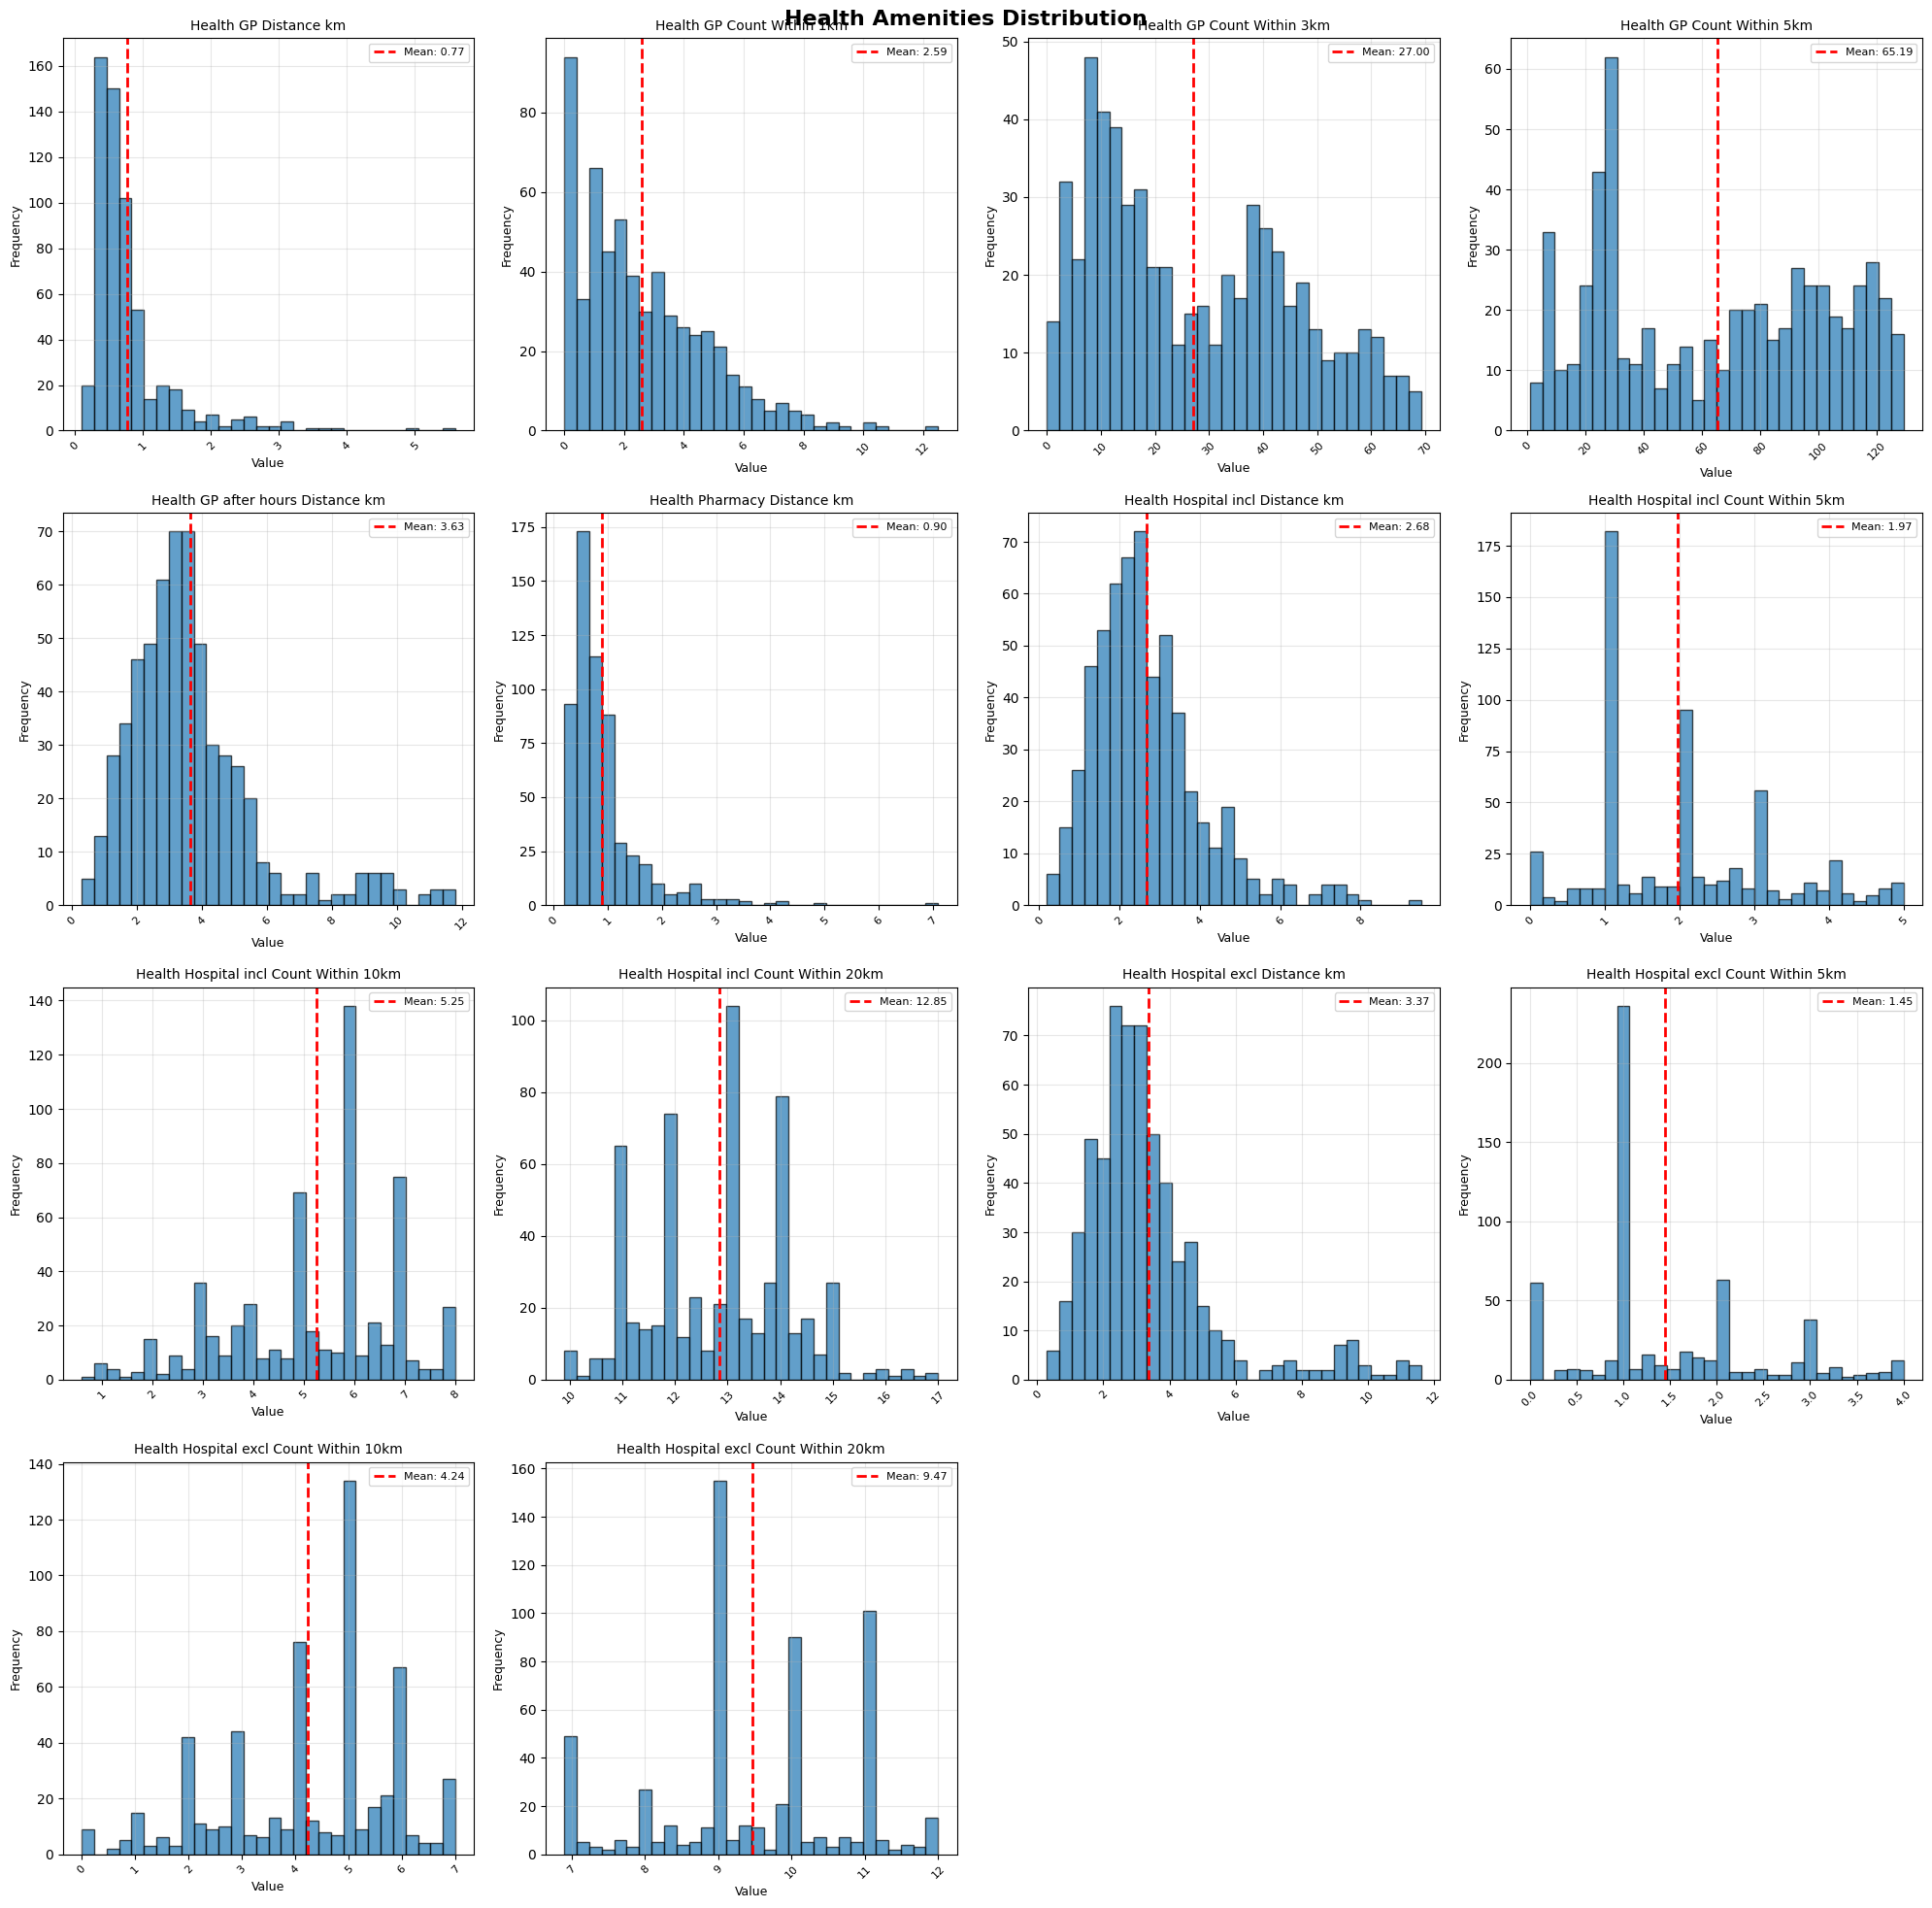

Plotting Retail category (8 columns)...


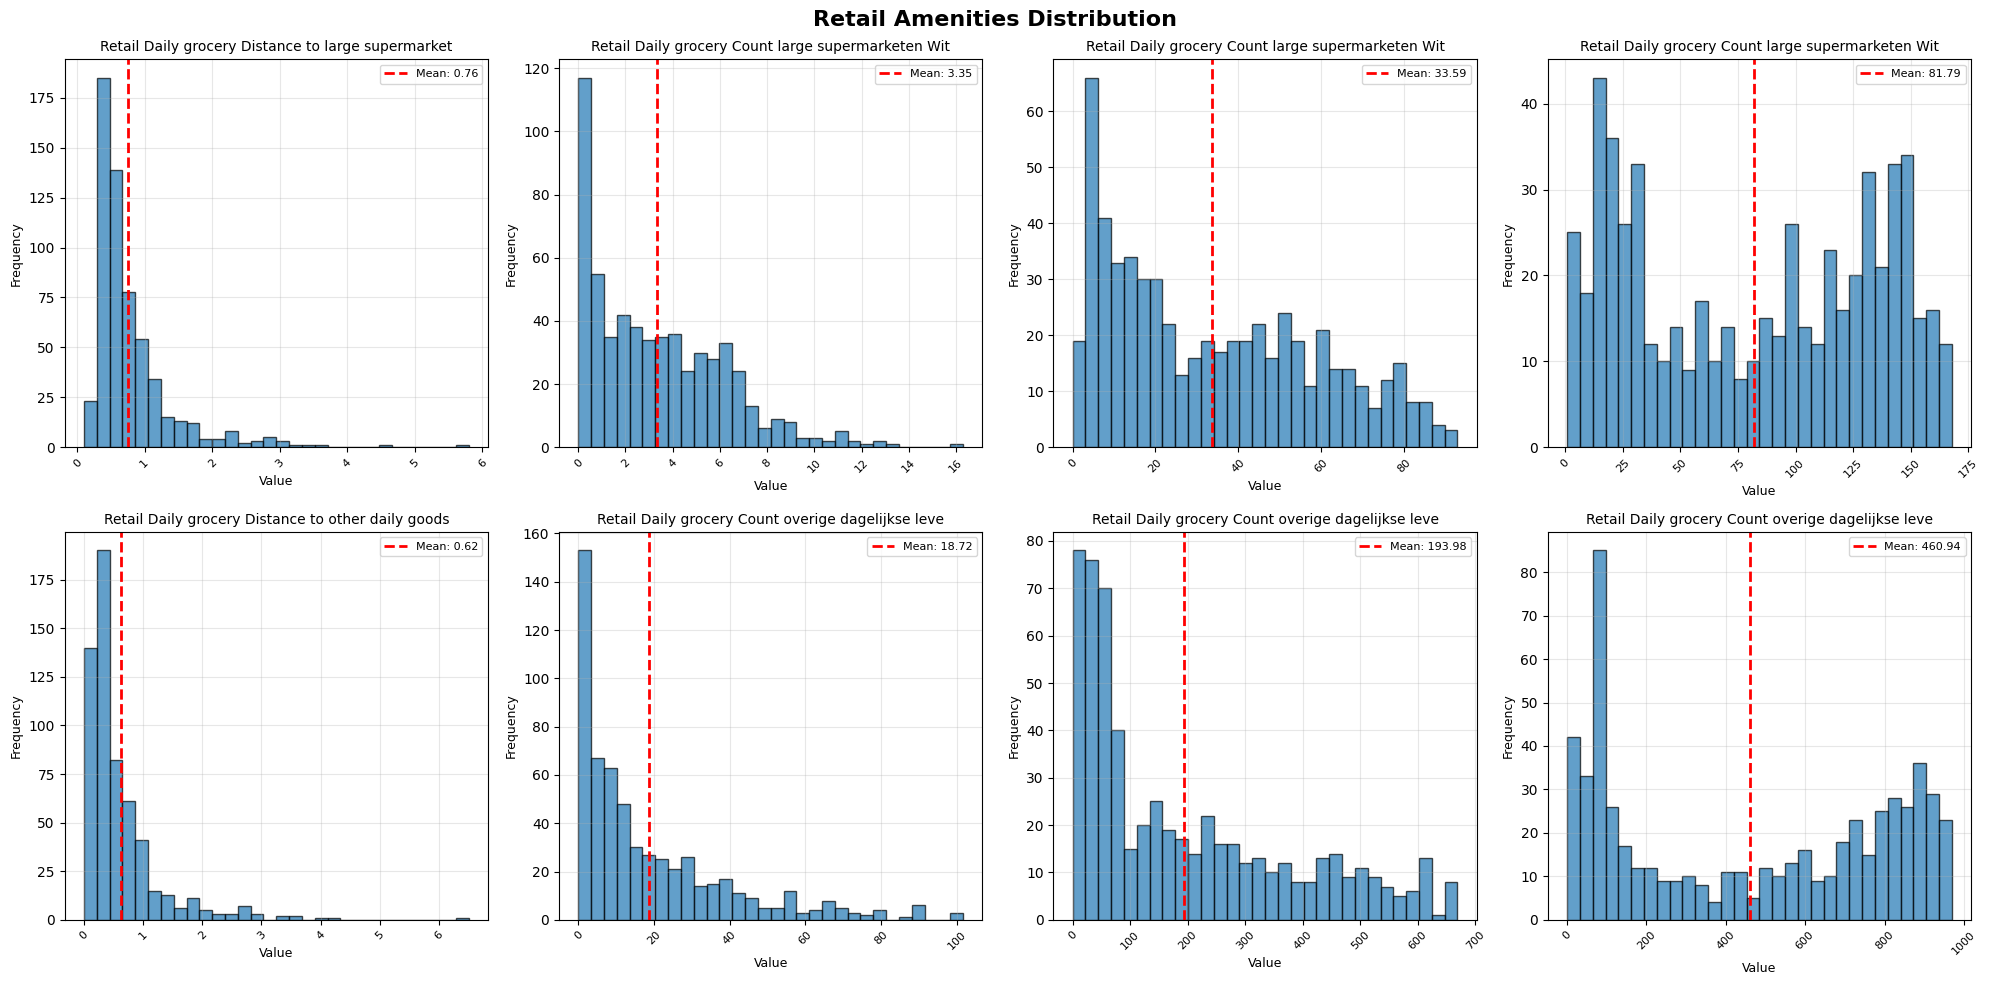

Plotting Hospitality category (12 columns)...


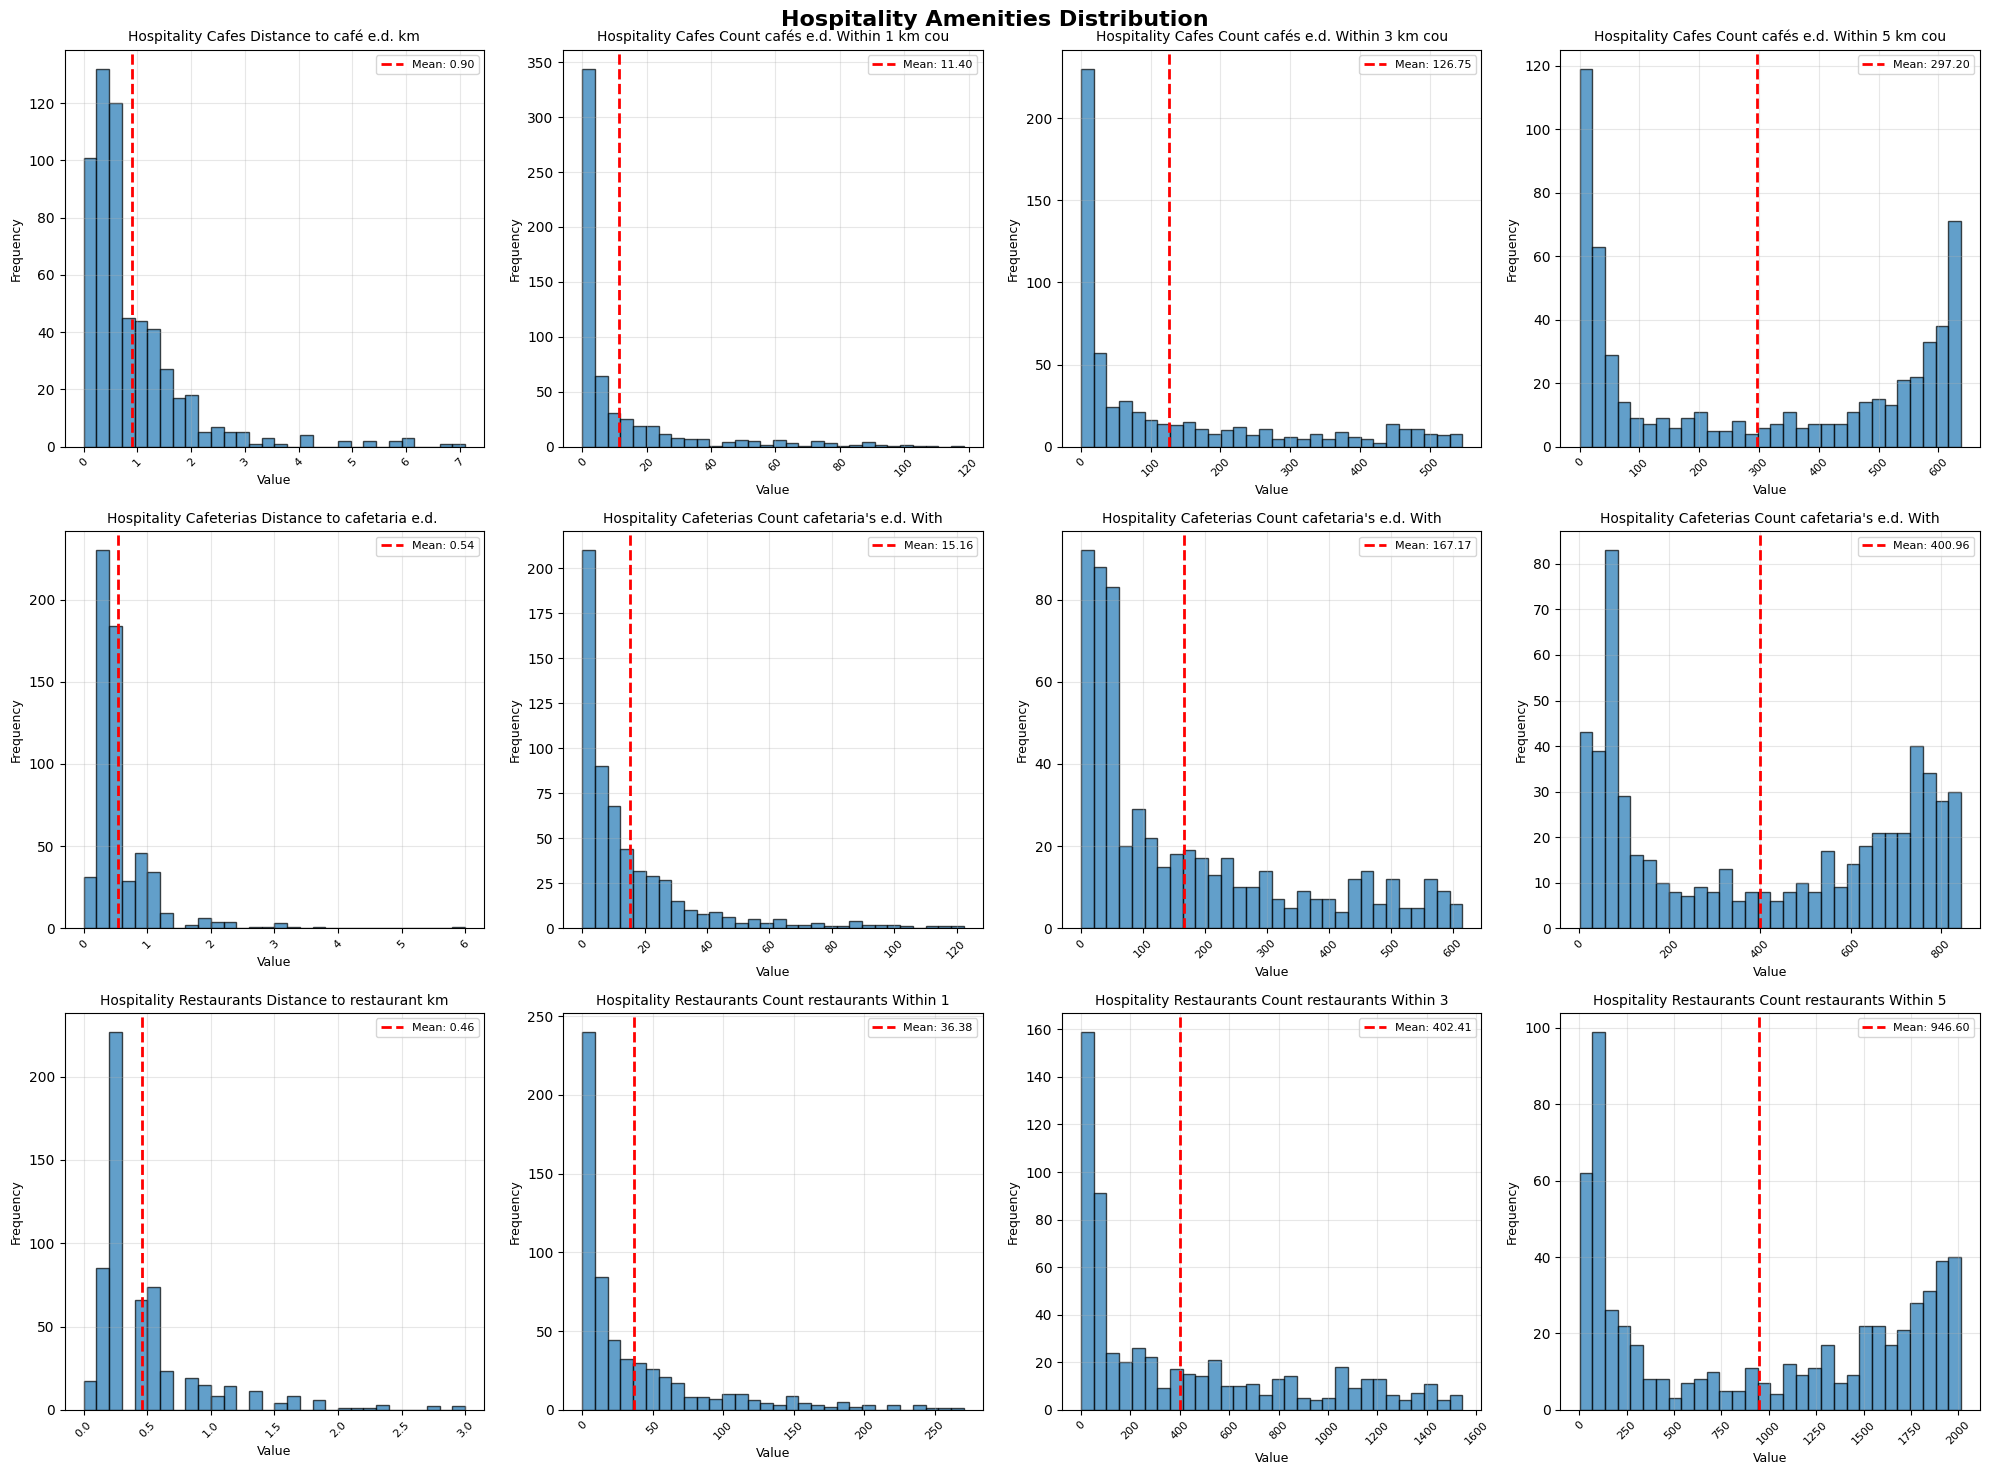

Plotting Traffic_Transport category (3 columns)...


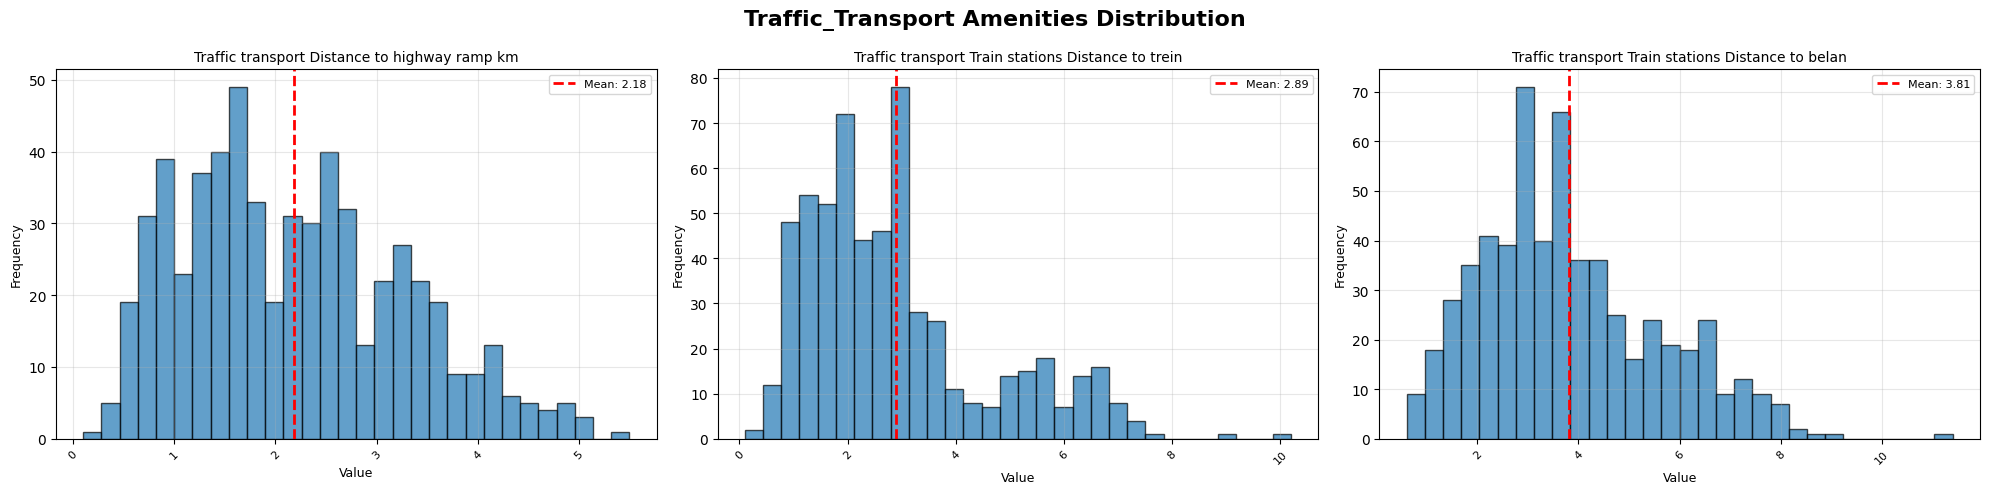

Plotting Leisure_Culture category (22 columns)...


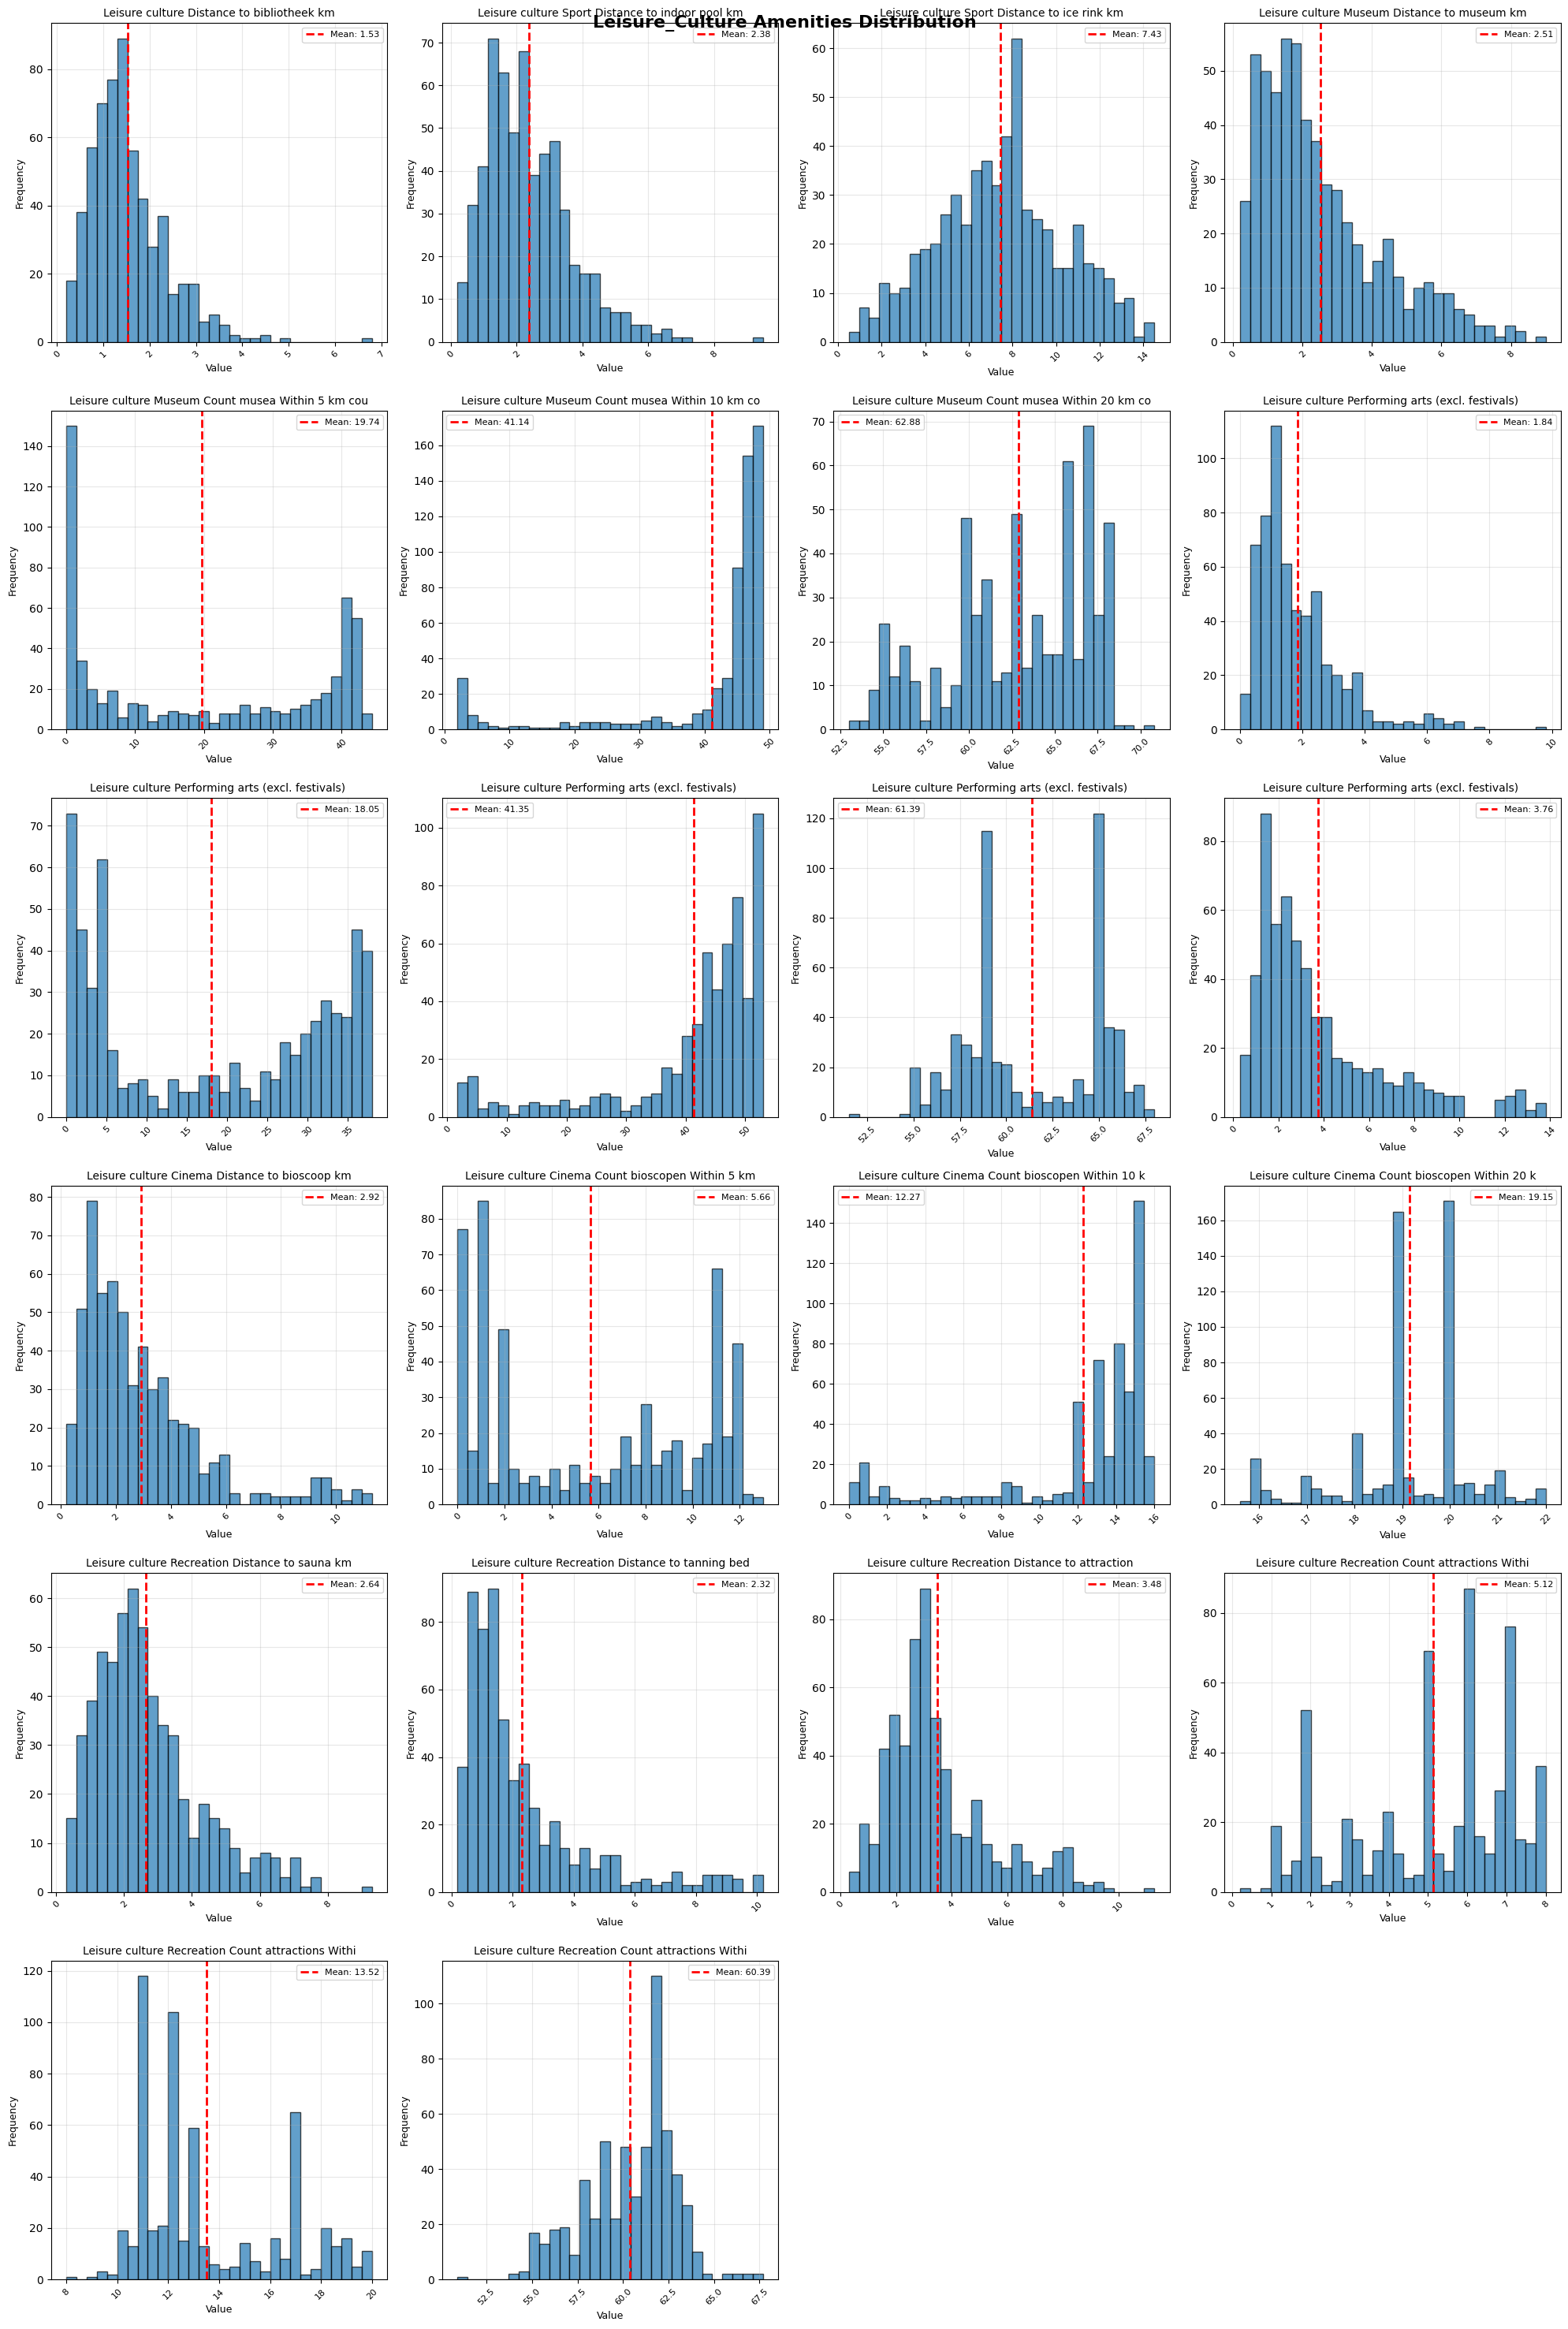

In [75]:
# amenities distribution - grouped by category and displayed in notebook with means
import matplotlib.pyplot as plt
import numpy as np

# Get numeric columns only (exclude area_name, municipality_name, region_type)
numeric_cols = amenities.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Group columns by category prefix
categories = {
    'Health': [col for col in numeric_cols if col.startswith('Health')],
    'Retail': [col for col in numeric_cols if col.startswith('Retail')],
    'Hospitality': [col for col in numeric_cols if col.startswith('Hospitality')],
    'Traffic_Transport': [col for col in numeric_cols if col.startswith('Traffic')],
    'Leisure_Culture': [col for col in numeric_cols if col.startswith('Leisure')],
    'Other': [col for col in numeric_cols if not any(col.startswith(cat) for cat in ['Health', 'Retail', 'Hospitality', 'Traffic', 'Leisure'])]
}

# Plot each category
for category, cols in categories.items():
    if len(cols) == 0:
        continue
    
    print(f"Plotting {category} category ({len(cols)} columns)...")
    
    # Calculate grid size (max 4 columns per row)
    n_cols = min(4, len(cols))
    n_rows = int(np.ceil(len(cols) / n_cols))
    
    # Create figure with appropriate size
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    fig.suptitle(f'{category} Amenities Distribution', fontsize=16, fontweight='bold')
    
    # Flatten axes if needed
    if n_rows == 1:
        axes = axes.reshape(1, -1) if n_cols > 1 else [axes]
    axes = axes.flatten()
    
    # Plot each column
    for idx, col in enumerate(cols):
        ax = axes[idx]
        amenities[col].hist(bins=30, ax=ax, edgecolor='black', alpha=0.7)
        
        # Calculate and plot mean
        mean_val = amenities[col].mean()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        
        ax.set_title(col.replace('_', ' ')[:50], fontsize=10, wrap=True)
        ax.set_xlabel('Value', fontsize=9)
        ax.set_ylabel('Frequency', fontsize=9)
        ax.tick_params(axis='x', rotation=45, labelsize=8)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=8)
    
    # Hide unused subplots
    for idx in range(len(cols), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

^

### Amsterdam means metrics by health facilities, retail stores, hospitality services, traffic & transportation, leasure & cultures
**Health:**
- Distance to GP: 0.77 km
- GP count within 1 km: 2.59
- GP count within 3 km: 27.00
- Distance to after-hours GP: 3.63 km
- Distance to pharmacy: 0.90 km
- Distance to hospital (incl. outpatient clinic): 2.68 km
- Hospital (incl.) count within 5 km: 1.97
- Hospital (incl.) count within 10 km: 5.25
- Hospital (incl.) count within 20 km: 12.85
- Distance to hospital (excl.): 3.37 km
- Hospital (excl.) count within 5 km: 1.45
- Hospital (excl.) count within 10 km: 4.24
- Hospital (excl.) count within 20 km: 9.47

**Retail:**
- Distance to large supermarket: 0.76 km
- Large supermarkets within 1 km: 3.35
- Large supermarkets within 3 km: 33.59
- Large supermarkets within 5 km: 81.79
- Distance to other daily goods: 0.62 km
- Other daily goods within 1 km: 18.72
- Other daily goods within 3 km: 193.98
- Other daily goods within 5 km: 460.94

**Hospitality:**
- Distance to café: 0.90 km
- Cafés within 1 km: 11.40
- Cafés within 3 km: 126.75
- Cafés within 5 km: 297.20
- Distance to cafeteria: 0.54 km
- Cafeterias within 1 km: 15.16
- Cafeterias within 3 km: 167.17
- Cafeterias within 5 km: 400.96
- Distance to restaurant: 0.46 km
- Restaurants within 1 km: 36.38
- Restaurants within 3 km: 402.41
- Restaurants within 5 km: 946.60

**Traffic & Transport:**
- Distance to highway ramp: 2.18 km
- Distance to train station: 2.89 km
- Distance to major transfer station: 3.81 km

**Leisure & Culture:**
- Distance to library: 1.53 km
- Distance to indoor pool: 2.38 km
- Distance to ice rink: 7.43 km
- Distance to museum: 2.51 km
- Museums within 5 km: 19.74
- Museums within 10 km: 41.14
- Museums within 20 km: 62.88
- Distance to performing arts venue: 1.84 km
- Performing arts venues within 5 km: 18.05
- Performing arts venues within 10 km: 41.35
- Performing arts venues within 20 km: 61.39
- Distance to music venue: 3.76 km
- Distance to cinema: 2.92 km
- Cinemas within 5 km: 5.66
- Cinemas within 10 km: 12.27
- Cinemas within 20 km: 19.15
- Distance to sauna: 2.64 km
- Distance to tanning bed: 2.32 km
- Distance to attraction: 3.48 km
- Attractions within 10 km: 5.12
- Attractions within 20 km: 13.52
- Attractions within 50 km: 60.39

In [76]:
'''This saves the graphs as PDF; left here to use if needed'''
# # amenities distribution - grouped by category and saved to PDF
# import matplotlib.pyplot as plt
# from matplotlib.backends.backend_pdf import PdfPages
# import numpy as np
# from datetime import datetime

# # Get numeric columns only (exclude area_name, municipality_name, region_type)
# numeric_cols = amenities.select_dtypes(include=['float64', 'int64']).columns.tolist()

# # Group columns by category prefix
# categories = {
#     'Health': [col for col in numeric_cols if col.startswith('Health')],
#     'Retail': [col for col in numeric_cols if col.startswith('Retail')],
#     'Hospitality': [col for col in numeric_cols if col.startswith('Hospitality')],
#     'Traffic_Transport': [col for col in numeric_cols if col.startswith('Traffic')],
#     'Leisure_Culture': [col for col in numeric_cols if col.startswith('Leisure')],
#     'Other': [col for col in numeric_cols if not any(col.startswith(cat) for cat in ['Health', 'Retail', 'Hospitality', 'Traffic', 'Leisure'])]
# }

# # Create PDF file
# pdf_filename = f'amenities_distributions_{datetime.now().strftime("%Y%m%d_%H%M%S")}.pdf'
# print(f"Creating PDF: {pdf_filename}\n")

# # Open PDF and plot each category
# with PdfPages(pdf_filename) as pdf:
#     for category, cols in categories.items():
#         if len(cols) == 0:
#             continue
        
#         print(f"Plotting {category} category ({len(cols)} columns)...")
        
#         # Calculate grid size (max 4 columns per row)
#         n_cols = min(4, len(cols))
#         n_rows = int(np.ceil(len(cols) / n_cols))
        
#         # Create figure with appropriate size
#         fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
#         fig.suptitle(f'{category} Amenities Distribution', fontsize=16, fontweight='bold')
        
#         # Flatten axes if needed
#         if n_rows == 1:
#             axes = axes.reshape(1, -1) if n_cols > 1 else [axes]
#         axes = axes.flatten()
        
#         # Plot each column
#         for idx, col in enumerate(cols):
#             ax = axes[idx]
#             amenities[col].hist(bins=30, ax=ax, edgecolor='black', alpha=0.7)
#             ax.set_title(col.replace('_', ' ')[:50], fontsize=10, wrap=True)
#             ax.set_xlabel('Value', fontsize=9)
#             ax.set_ylabel('Frequency', fontsize=9)
#             ax.tick_params(axis='x', rotation=45, labelsize=8)
#             ax.grid(True, alpha=0.3)
        
#         # Hide unused subplots
#         for idx in range(len(cols), len(axes)):
#             axes[idx].set_visible(False)
        
#         plt.tight_layout()
        
#         # Save to PDF
#         pdf.savefig(fig, bbox_inches='tight')
#         plt.close(fig)  # Close figure to free memory

# print(f"\nSaved {len([c for c in categories.values() if len(c) > 0])} category pages to PDF")
# print(f"Total: {len(numeric_cols)} numeric columns plotted")
# print(f"PDF saved as: {pdf_filename}")

# # Automatically open the PDF in Preview to avoid SQLite/text editor errors
# import subprocess
# import os
# try:
#     pdf_path = os.path.abspath(pdf_filename)
#     subprocess.run(['open', '-a', 'Preview', pdf_path], check=True)
#     print(f"PDF opened in Preview: {pdf_path}")
# except Exception as e:
#     print(f"  Could not auto-open PDF. Please open manually: {pdf_filename}")
#     print(f"   Error: {e}")



'This saves the graphs as PDF; left here to use if needed'

### Categorize areas into Amsterdam Zuid vs Amsterdam Zuidoost

In [77]:

# Amsterdam Zuidoost (Southeast) - Bijlmer and surrounding areas
zuidoost_keywords = [
    # Letter neighborhoods (Bijlmer)
    'D-buurt', 'E-buurt', 'F-buurt', 'G-buurt', 'H-buurt', 'K-buurt', 'L-buurt',
    # Bijlmer specific areas
    'Bijlmermuseum', 'Ganzenhoef', 'Geerdinkhof', 'Kantershof', 'Grunder', 'Koningshoef',
    'Gooise Kant', 'Kortvoort', 'Kelbergen', 'De Kameleon',
    # Holendrecht and surrounding
    'Holendrecht',
    # Reigersbos
    'Reigersbos',
    # Gein
    'Gein',
    # Other Zuidoost areas
    'Nellestein', 'Venserpolder', 'Amsterdamse Poort', 'Amstel III', 'AMC', 'Hoge Dijk',
    'Hoptille', 'Hakfort', 'Huigenbos', 'Huntum', 'Vogeltjeswei', 'Rechte H-buurt',
    'Gaasperpark', 'Hoofdcentrum-Zuidoost', 'Bullewijk'
]

# Amsterdam Zuid (South) - Museum Quarter, De Pijp, Zuidas, Buitenveldert, etc.
zuid_keywords = [
    # Museum Quarter and surrounding
    'Museumkwartier', 'Concertgebouwbuurt', 'Cornelis Schuytbuurt', 'P.C. Hooftbuurt',
    'Willemspark', 'Valeriusbuurt',
    # De Pijp
    'Oude Pijp', 'Nieuwe Pijp', 'Zuid Pijp', 'Sarphatiparkbuurt', 'Frans Halsbuurt',
    'Gerard Doubuurt', 'Hercules Seghersbuurt', 'Hemonybuurt', 'Cornelis Troostbuurt',
    'Lizzy Ansinghbuurt', 'Van der Helstpleinbuurt', 'Willibrordusbuurt',
    'BurgemeesterTellegenbuurt', 'Burgemeester Tellegenbuurt',
    # Zuidas and business district
    'Zuidas', 'Kop Zuidas', 'RAI', 'VU-kwartier', 'Vivaldi',
    # Buitenveldert
    'Buitenveldert', 'Gelderlandpleinbuurt', 'De Klenckebuurt', 'Amstelpark', 'Zuiderhof',
    # Stadionbuurt and Olympic area
    'Stadionbuurt', 'Olympisch Stadion', 'Marathonbuurt', 'Bertelmanpleinbuurt',
    # Apollobuurt and surrounding
    'Apollobuurt', 'Hiltonbuurt', 'Minervabuurt', 'Beethovenbuurt', 'Diepenbrockbuurt',
    # Scheldebuurt and Rijnbuurt
    'Scheldebuurt', 'Wielingenbuurt', 'Veluwebuurt', 'IJselbuurt', 'Rijnbuurt',
    'Kromme Mijdrechtbuurt', 'Zorgvlied', 'Prinses Irenebuurt',
    # Vondelpark area
    'Vondelparkbuurt', 'Helmersbuurt', 'Cremerbuurt', 'Overtoomse Sluis',
    # Other Zuid areas
    'Diamantbuurt', 'Van Tuyllbuurt', 'IJsbaanpad', 'Duivelseiland', 'Harmoniehofbuurt',
    'Banpleinbuurt', 'Hondecoeterbuurt', 'Johannes Vermeerbuurt',
    # Schinkel area
    'Schinkelbuurt', 'Bedrijventerrein Schinkel', 'Aalsmeerwegbuurt', 'Surinamepleinbuurt',
    'Legmeerpleinbuurt', 'Hoofddorppleinbuurt', 'Westlandgrachtbuurt', 'Westlandgracht',
    'Nieuwe Meer', 'Riekerpolder', 'Riekerhaven', 'Delflandpleinbuurt',
    # Sloten area (southern part of Zuid)
    'Sloten', 'Nieuw-Sloten', 'Dorp Sloten', 'Belgiëplein', 'Sloterweg', 'Park Haagseweg',
    'Schipluidenbuurt', 'Koningin Wilhelminaplein', 'Andreasterrein',
    # Slotervaart (southern part)
    'Slotervaart', 'Medisch Centrum Slotervaart', 'Staalmanbuurt', 'Louis Crispijnbuurt',
    'Jacques Veltmanbuurt', 'Johan Jongkindbuurt', 'Rembrandtpark',
    'Overtoomse Veld', 'Lucas/Andreasziekenhuis', 'Jacob Geelbuurt', 'Emanuel van Meterenbuurt',
    'Oostoever Sloterplas'
]

def categorize_area(area_name):
    """
    Categorize an area name into Amsterdam Zuid, Amsterdam Zuidoost, or Other.
    """
    area_name_str = str(area_name).strip()
    
    # Check for Zuidoost
    for keyword in zuidoost_keywords:
        if keyword.lower() in area_name_str.lower():
            return 'Amsterdam Zuidoost'
    
    # Check for Zuid
    for keyword in zuid_keywords:
        if keyword.lower() in area_name_str.lower():
            return 'Amsterdam Zuid'
    
    return 'Other'

# Apply categorization
amenities['district'] = amenities['area_name'].apply(categorize_area)

# Display results
print("="*70)
print("AREA CATEGORIZATION RESULTS")
print("="*70)
print(f"\nTotal areas: {len(amenities)}")
print(f"\nDistribution by district:")
print(amenities['district'].value_counts())

print(f"\n\nAreas categorized as Amsterdam Zuid ({amenities[amenities['district'] == 'Amsterdam Zuid'].shape[0]}):")
zuid_areas = amenities[amenities['district'] == 'Amsterdam Zuid']['area_name'].sort_values().tolist()
for area in zuid_areas:
    print(f"  - {area}")

print(f"\n\nAreas categorized as Amsterdam Zuidoost ({amenities[amenities['district'] == 'Amsterdam Zuidoost'].shape[0]}):")
zuidoost_areas = amenities[amenities['district'] == 'Amsterdam Zuidoost']['area_name'].sort_values().tolist()
for area in zuidoost_areas:
    print(f"  - {area}")

print(f"\n\nAreas categorized as Other ({amenities[amenities['district'] == 'Other'].shape[0]}):")
other_areas = amenities[amenities['district'] == 'Other']['area_name'].sort_values().tolist()
print(f"  (First 20): {other_areas[:20]}")


AREA CATEGORIZATION RESULTS

Total areas: 587

Distribution by district:
district
Other                 402
Amsterdam Zuid        130
Amsterdam Zuidoost     55
Name: count, dtype: int64


Areas categorized as Amsterdam Zuid (130):
  - Aalsmeerwegbuurt-Oost
  - Aalsmeerwegbuurt-West
  - Amstelpark
  - Andreasterrein
  - Apollobuurt
  - Banpleinbuurt
  - Bedrijventerrein Schinkel
  - Beethovenbuurt
  - Belgiëplein e.o.
  - Bertelmanpleinbuurt
  - Buitenveldert-Oost
  - Buitenveldert-Oost-Midden
  - Buitenveldert-West
  - Buitenveldert-West-Midden
  - Buitenveldert-Zuid-Midden
  - Buitenveldert-Zuidoost
  - Buitenveldert-Zuidwest
  - Burgemeester Tellegenbuurt-Oost
  - BurgemeesterTellegenbuurt-West
  - Concertgebouwbuurt
  - Cornelis Schuytbuurt
  - Cornelis Troostbuurt
  - Cremerbuurt-Oost
  - Cremerbuurt-West
  - De Klenckebuurt
  - Delflandpleinbuurt-Oost
  - Delflandpleinbuurt-West
  - Diamantbuurt
  - Diepenbrockbuurt
  - Dorp Sloten
  - Duivelseiland
  - Emanuel van Meterenbuurt
  

In [78]:
# Comparative analysis of amenities between Amsterdam Zuid and Amsterdam Zuidoost neighborhoods

# Check if required variables exist
if 'amenities' not in globals():
    raise NameError("Error: 'amenities' dataframe not found. Please run Cells 1 and 2 first to load and process the data.")

if 'district' not in amenities.columns:
    raise KeyError("Error: 'district' column not found. Please run Cell 5 first to categorize areas into Amsterdam Zuid and Amsterdam Zuidoost.")

# Select only the rows for Amsterdam Zuid and Amsterdam Zuidoost
amenities_zuid = amenities[amenities['district'] == 'Amsterdam Zuid']
amenities_zuidoost = amenities[amenities['district'] == 'Amsterdam Zuidoost']

print("Comparative Analysis: Amenities in Amsterdam Zuid vs Amsterdam Zuidoost")
print(f"\nNumber of neighborhoods in Amsterdam Zuid: {len(amenities_zuid)}")
print(f"Number of neighborhoods in Amsterdam Zuidoost: {len(amenities_zuidoost)}")


Comparative Analysis: Amenities in Amsterdam Zuid vs Amsterdam Zuidoost

Number of neighborhoods in Amsterdam Zuid: 130
Number of neighborhoods in Amsterdam Zuidoost: 55


In [79]:

# Identify amenity columns (exclude non-numeric if necessary)
cols_to_compare = [col for col in amenities.columns if amenities[col].dtype != 'O' and col not in ['district']]

print("\nSummary statistics for amenity columns (selected columns shown):\n")

import pandas as pd

def comparative_stats(col_list):
    stats = []
    for col in col_list:
        z_mean = amenities_zuid[col].mean()
        zo_mean = amenities_zuidoost[col].mean()
        z_median = amenities_zuid[col].median()
        zo_median = amenities_zuidoost[col].median()
        z_std = amenities_zuid[col].std()
        zo_std = amenities_zuidoost[col].std()
        stats.append({
            'amenity': col,
            'Zuid mean': round(z_mean,2),
            'Zuidoost mean': round(zo_mean,2),
            'Zuid median': round(z_median,2),
            'Zuidoost median': round(zo_median,2),
            'Zuid std': round(z_std,2),
            'Zuidoost std': round(zo_std,2)
        })
    return pd.DataFrame(stats)

# If you want full stats for all numerical amenity columns, uncomment:
full_summary_table = comparative_stats(cols_to_compare)
display(full_summary_table)



Summary statistics for amenity columns (selected columns shown):



,amenity,Zuid mean,Zuidoost mean,Zuid median,Zuidoost median,Zuid std,Zuidoost std
0,Health_GP_Distance_km,0.63,0.71,0.50,0.60,0.36,0.38
1,Health_GP_Count_Within_1km,2.63,1.88,2.10,1.40,1.79,1.48
2,Health_GP_Count_Within_3km,33.24,13.61,34.10,15.60,14.85,5.84
3,Health_GP_Count_Within_5km,90.57,27.21,97.05,27.40,28.28,3.12
4,Health_GP_after_hours_Distance_km,3.38,3.46,3.30,3.60,1.18,1.21
5,Health_Pharmacy_Distance_km,0.70,0.93,0.60,0.90,0.38,0.42
6,Health_Hospital_incl_Distance_km,2.28,3.45,2.30,3.60,0.70,1.20
7,Health_Hospital_incl_Count_Within_5km,3.24,0.91,3.00,1.00,1.07,0.23
8,Health_Hospital_incl_Count_Within_10km,6.63,4.13,6.65,4.00,0.91,1.04
9,Health_Hospital_incl_Count_Within_20km,13.18,10.95,13.25,11.00,0.92,0.32


### Comparision in interested variables

In [80]:
import pandas as pd

# Define the selected amenities grouped by theme
selected_amenities = {
    'Health - GP': [
        'Health_GP_Distance_km',
        'Health_GP_Count_Within_1km',
        'Health_GP_Count_Within_3km'
    ],
    'Health - Hospital': [
        'Health_Hospital_incl_Distance_km',
        'Health_Hospital_incl_Count_Within_5km',
        'Health_Hospital_incl_Count_Within_10km'
    ],
    'Retail - Daily Grocery': [
        'Retail_Daily_grocery_Distance_to_large_supermarket_km',
        'Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count',
        'Retail_Daily_grocery_Count_large_supermarketen_Within_3_km_count',
        'Retail_Daily_grocery_Count_large_supermarketen_Within_5_km_count',
        'Retail_Daily_grocery_Distance_to_other_daily_goods_km'
    ],
    'Traffic & Transport': [
        'Traffic_transport_Distance_to_highway_ramp_km',
        'Traffic_transport_Train_stations_Distance_to_treinstations_totaal_km',
        'Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km'
    ],
    'Leisure & Culture - General': [
        'Leisure_culture_Distance_to_bibliotheek_km',
        'Leisure_culture_Sport_Distance_to_indoor_pool_km',
        'Leisure_culture_Sport_Distance_to_ice_rink_km'
    ],
    'Leisure & Culture - Arts': [
        'Leisure_culture_Museum_Distance_to_museum_km',
        'Leisure_culture_Museum_Count_musea_Within_5_km_count',
        'Leisure_culture_Performing_arts_(excl._festivals)_Count_podiumkunsten_totaal_Within_5_km_count',
        'Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_music_venue_km',
        'Leisure_culture_Cinema_Distance_to_bioscoop_km',
        'Leisure_culture_Cinema_Count_bioscopen_Within_5_km_count'
    ],
    'Leisure & Culture - Recreation': [
        'Leisure_culture_Recreation_Distance_to_sauna_km',
        'Leisure_culture_Recreation_Distance_to_tanning_bed_km',
        'Leisure_culture_Recreation_Distance_to_attraction_km',
        'Leisure_culture_Recreation_Count_attractions_Within_10_km_count',
        'Leisure_culture_Recreation_Count_attractions_Within_20_km_count'
    ]
}

def comparative_stats_grouped(amenity_dict):
    all_stats = []
    
    for theme, cols in amenity_dict.items():
        # Add theme header row
        all_stats.append({
            'amenity': f'═══ {theme} ═══',
            'Zuid mean': '',
            'Zuidoost mean': '',
            'Zuid median': '',
            'Zuidoost median': '',
            'Zuid std': '',
            'Zuidoost std': ''
        })
        
        # Add stats for each amenity
        for col in cols:
            if col in amenities.columns:
                z_mean = amenities_zuid[col].mean()
                zo_mean = amenities_zuidoost[col].mean()
                z_median = amenities_zuid[col].median()
                zo_median = amenities_zuidoost[col].median()
                z_std = amenities_zuid[col].std()
                zo_std = amenities_zuidoost[col].std()
                
                all_stats.append({
                    'amenity': col,
                    'Zuid mean': round(z_mean, 2),
                    'Zuidoost mean': round(zo_mean, 2),
                    'Zuid median': round(z_median, 2),
                    'Zuidoost median': round(zo_median, 2),
                    'Zuid std': round(z_std, 2),
                    'Zuidoost std': round(zo_std, 2)
                })
        
        # Add blank row between themes
        all_stats.append({
            'amenity': '',
            'Zuid mean': '',
            'Zuidoost mean': '',
            'Zuid median': '',
            'Zuidoost median': '',
            'Zuid std': '',
            'Zuidoost std': ''
        })
    
    return pd.DataFrame(all_stats)

# Generate the grouped table
grouped_summary = comparative_stats_grouped(selected_amenities)
display(grouped_summary)

,amenity,Zuid mean,Zuidoost mean,Zuid median,Zuidoost median,Zuid std,Zuidoost std
0,═══ Health - GP ═══,,,,,,
1,Health_GP_Distance_km,0.63,0.71,0.50,0.60,0.36,0.38
2,Health_GP_Count_Within_1km,2.63,1.88,2.10,1.40,1.79,1.48
3,Health_GP_Count_Within_3km,33.24,13.61,34.10,15.60,14.85,5.84
4,,,,,,,
5,═══ Health - Hospital ═══,,,,,,
6,Health_Hospital_incl_Distance_km,2.28,3.45,2.30,3.60,0.70,1.20
7,Health_Hospital_incl_Count_Within_5km,3.24,0.91,3.00,1.00,1.07,0.23
8,Health_Hospital_incl_Count_Within_10km,6.63,4.13,6.65,4.00,0.91,1.04
9,,,,,,,



Displaying comparison plots for 28 amenities



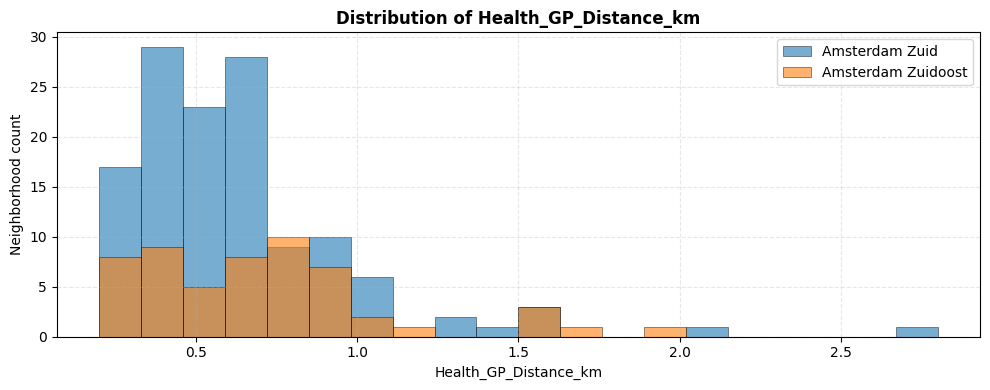

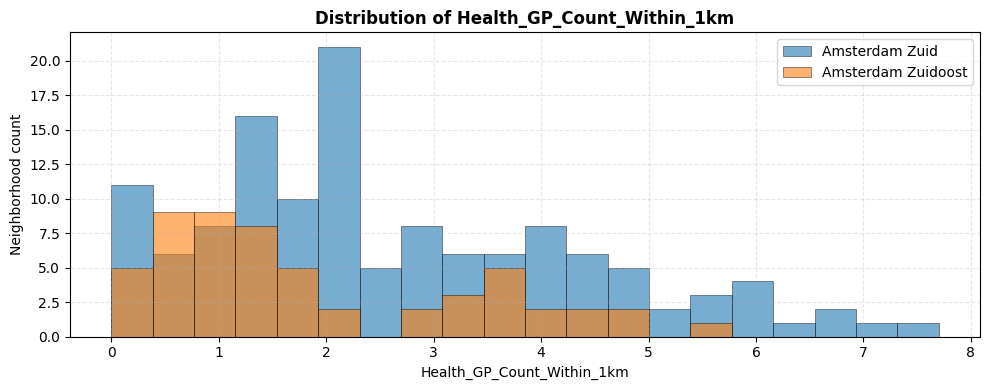

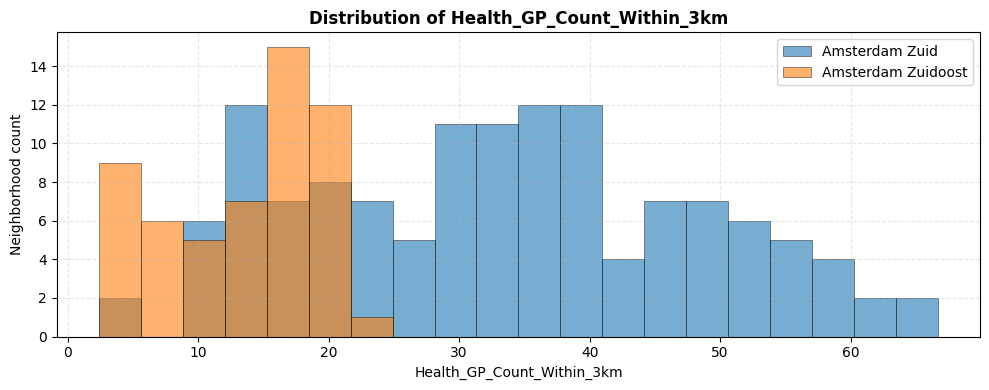

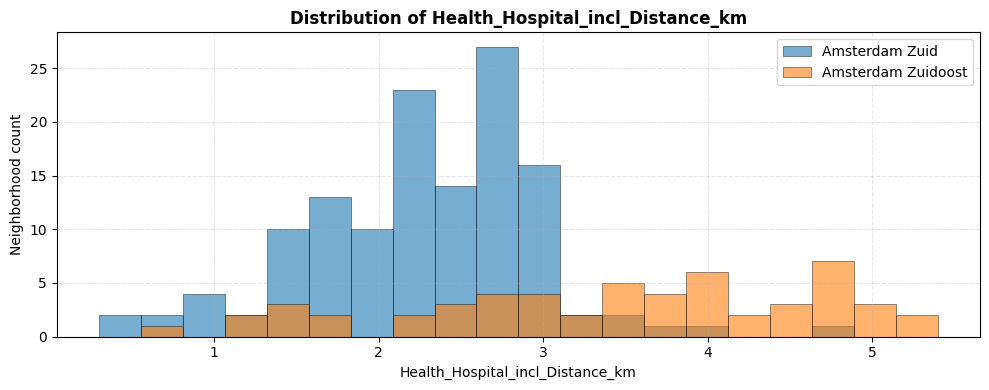

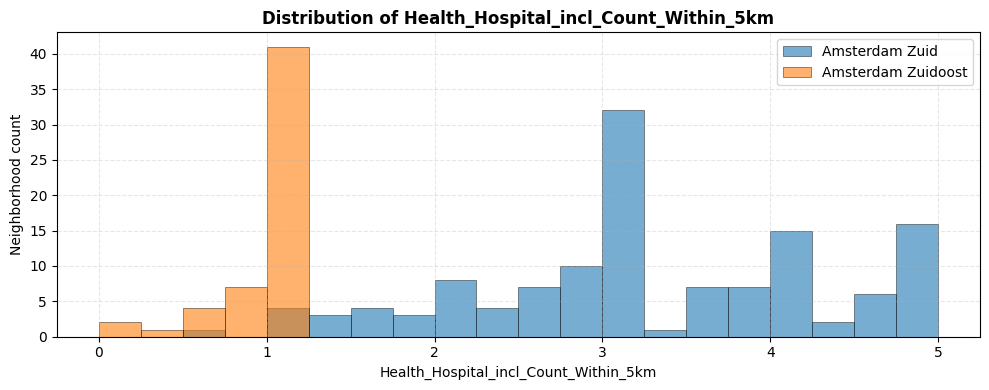

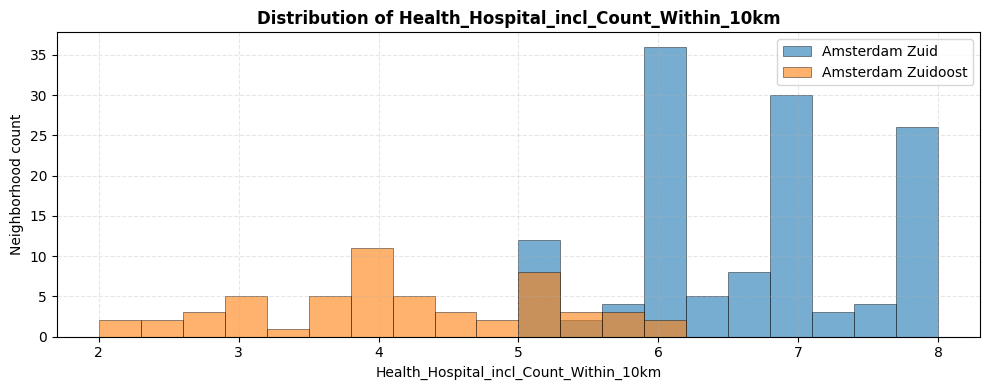

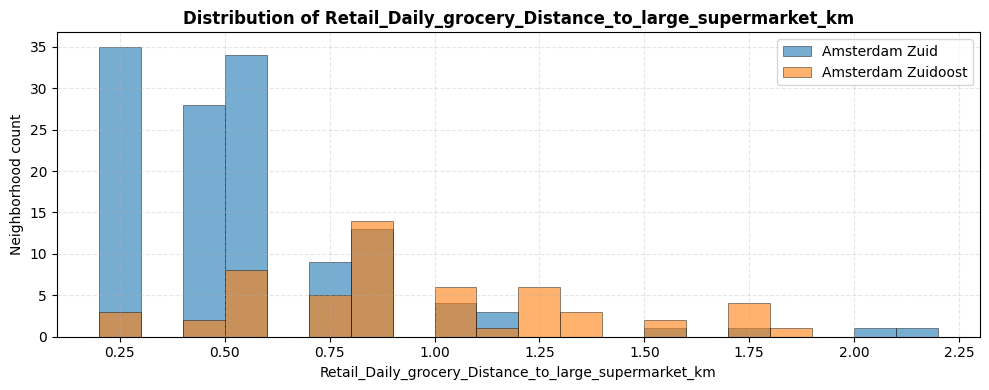

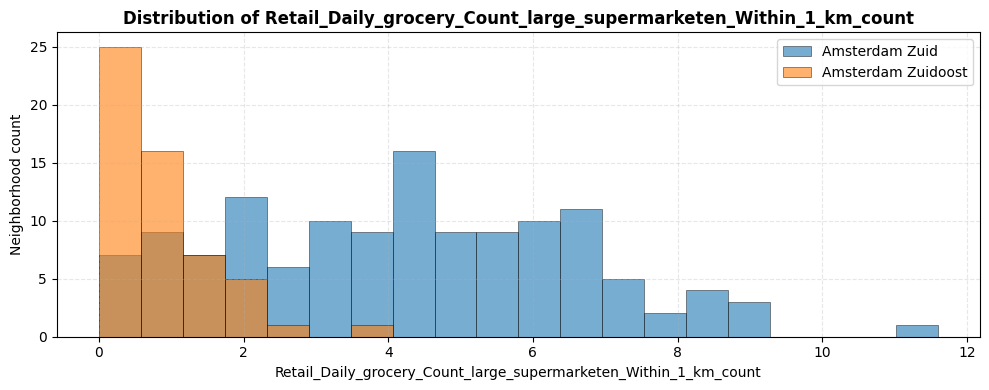

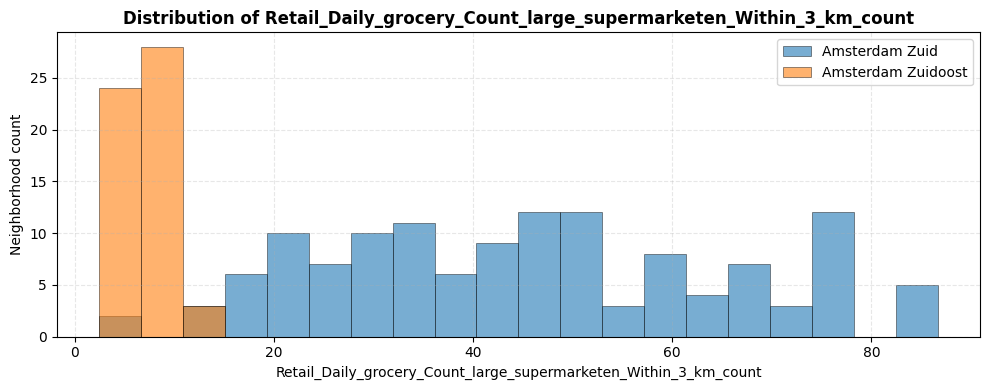

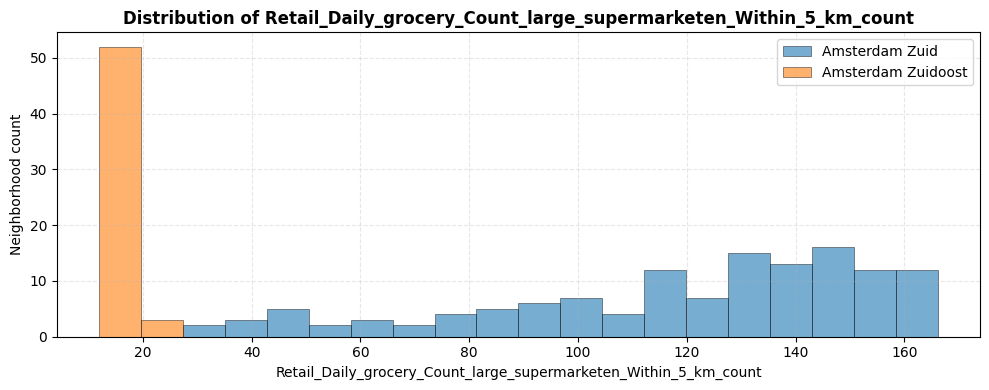

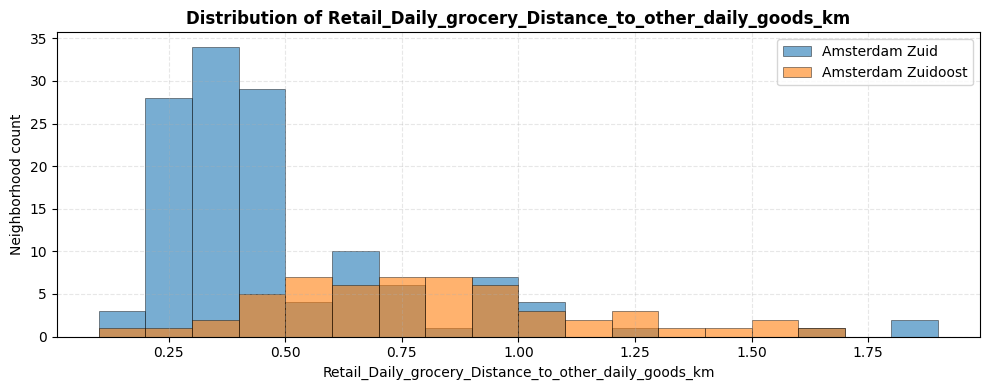

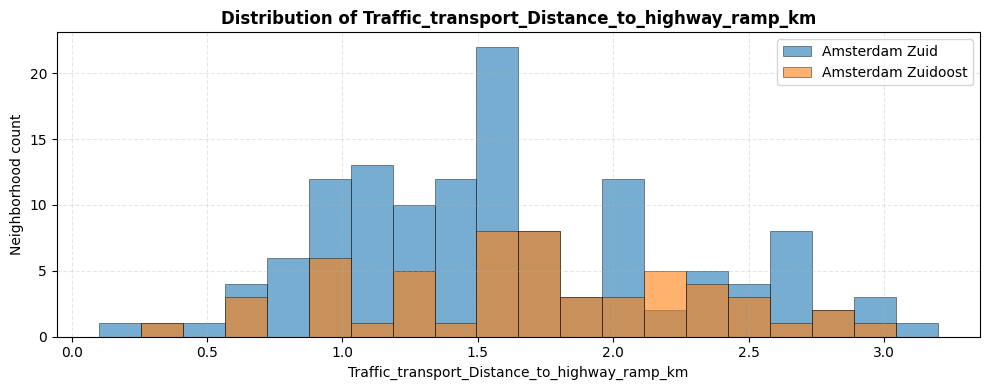

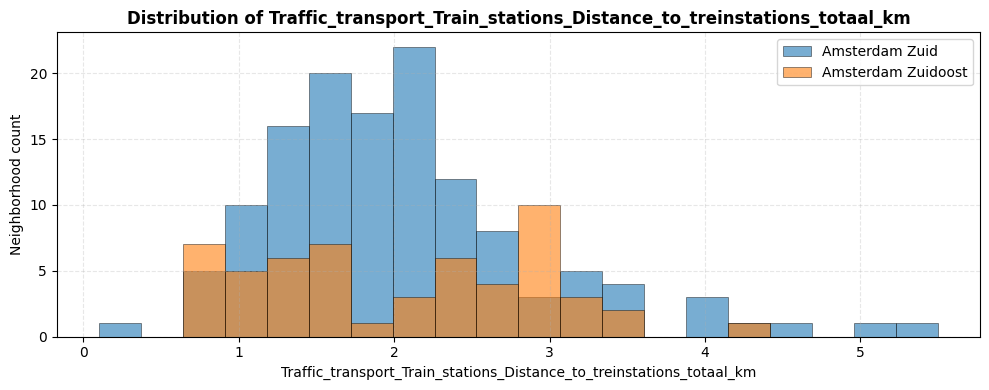

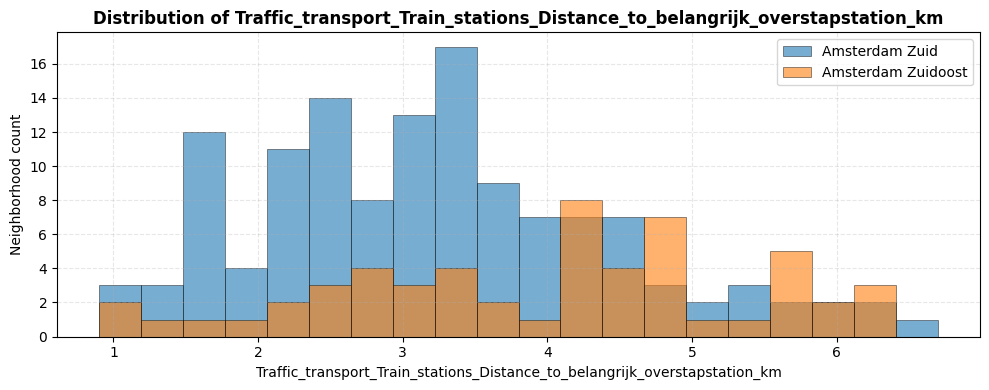

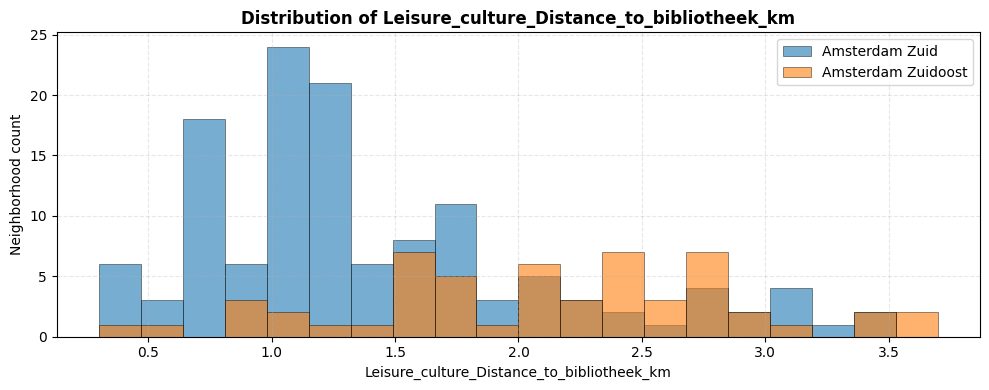

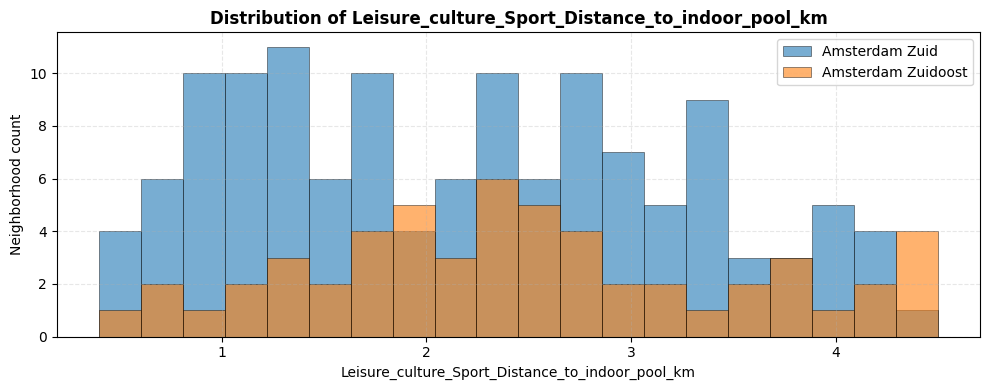

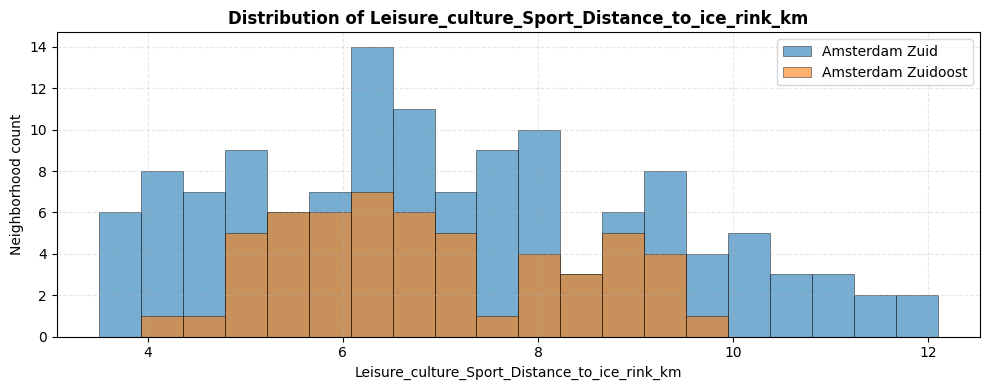

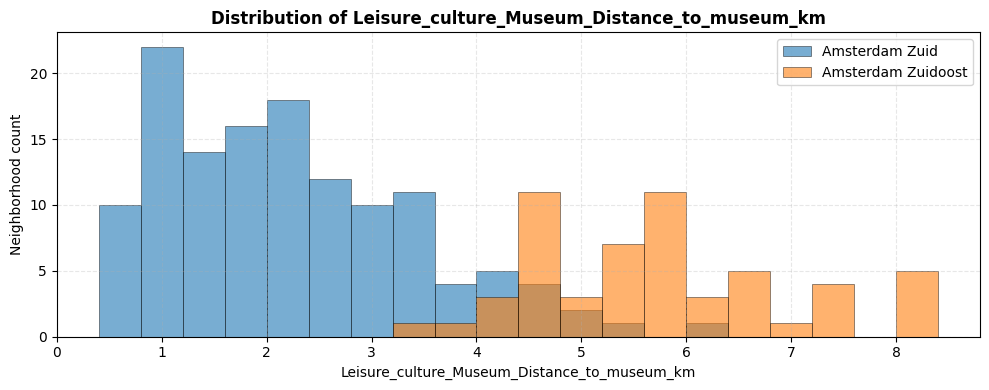

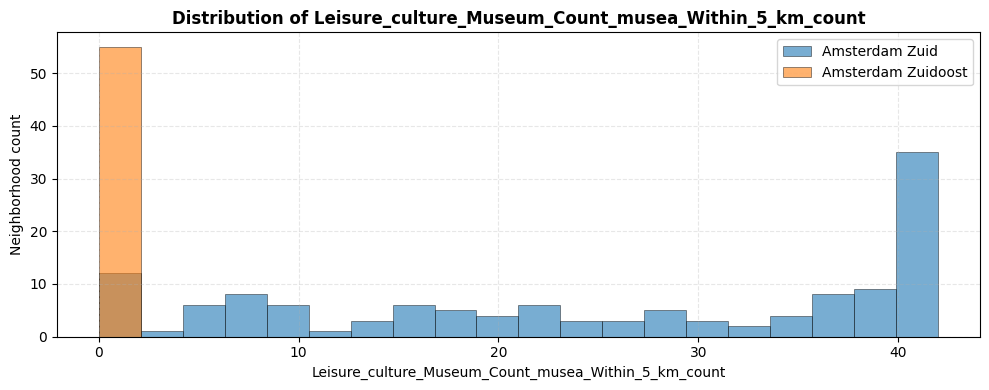

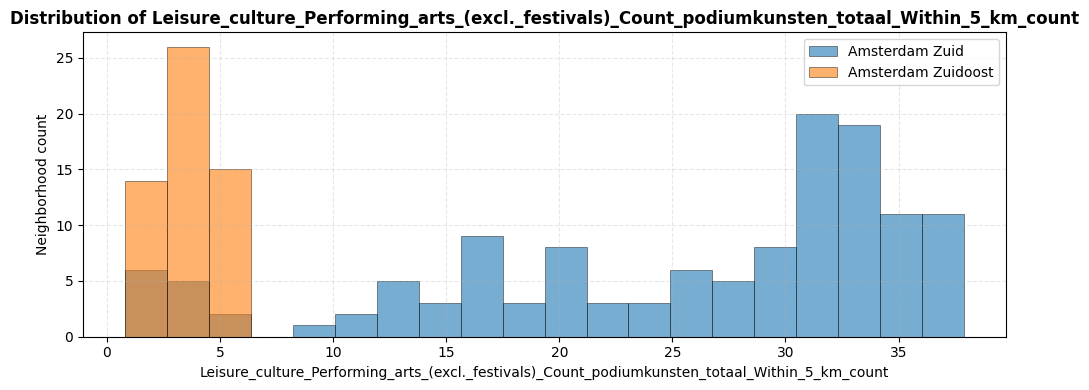

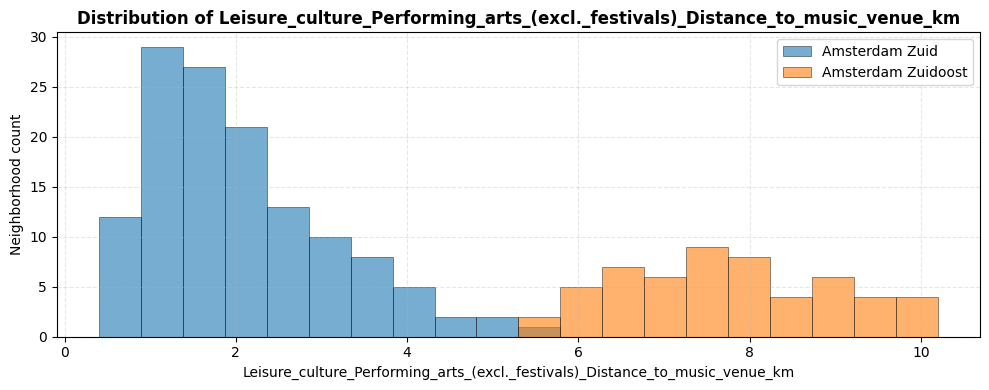

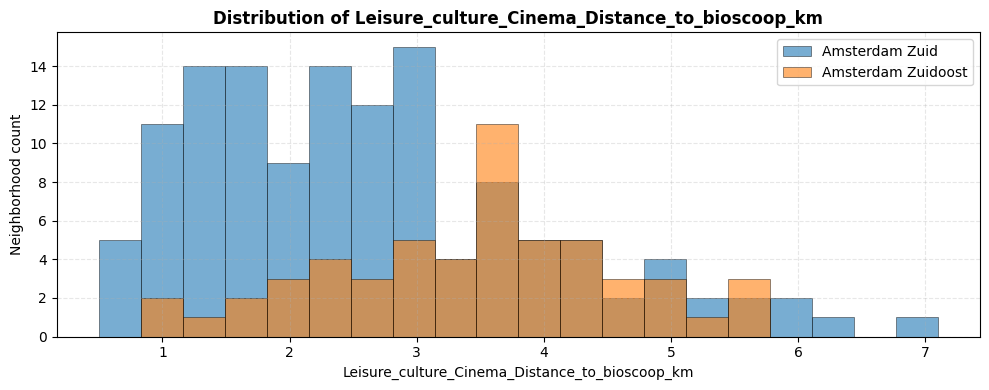

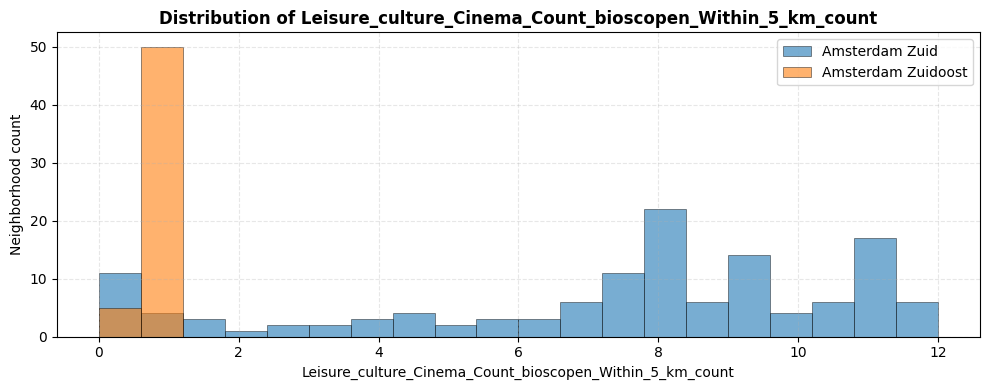

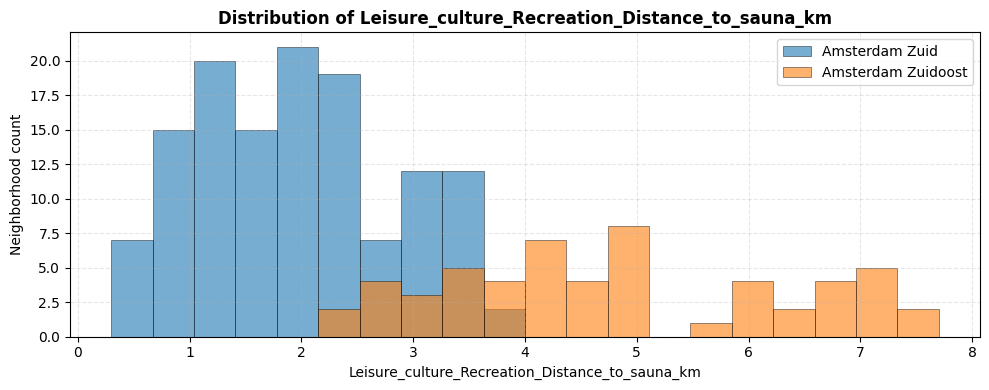

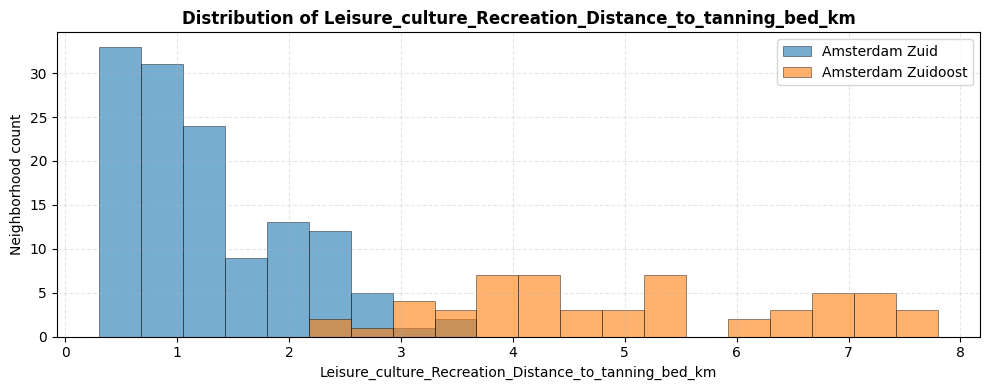

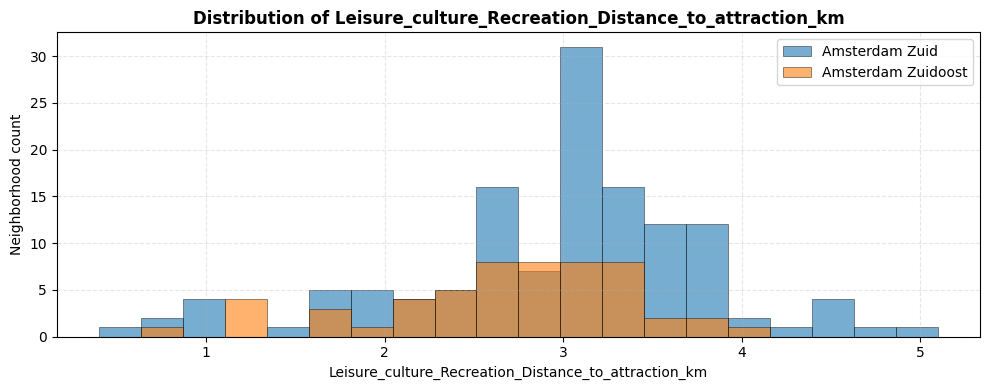

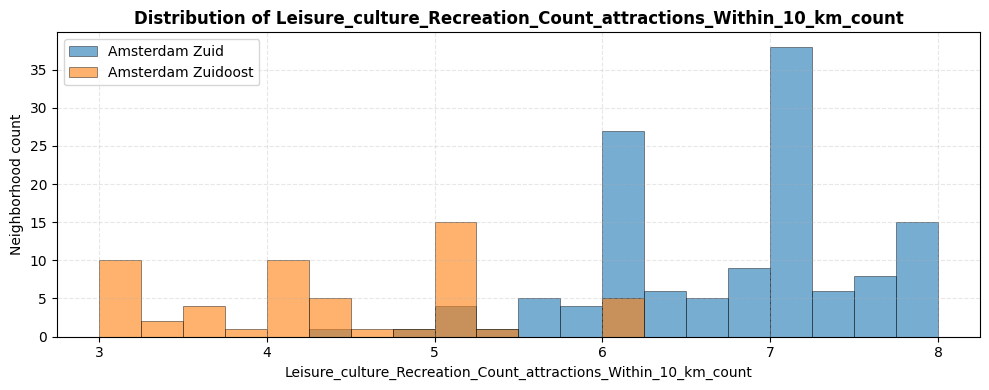

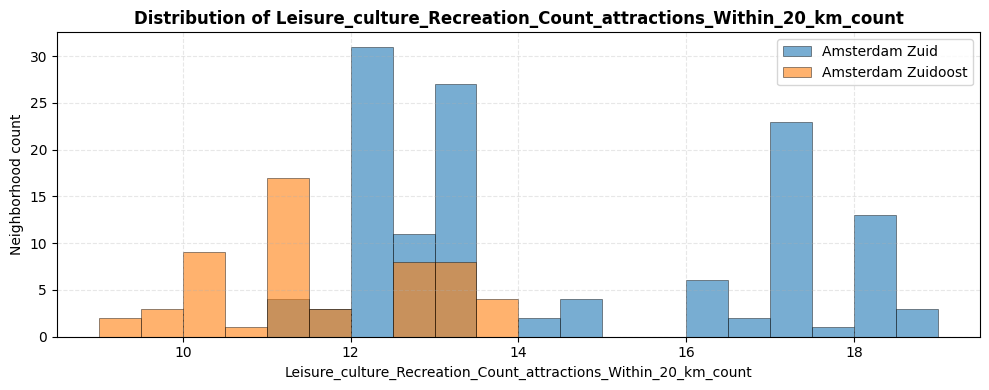

In [81]:
cols_to_compare = [
    # Health - GP
    "Health_GP_Distance_km",
    "Health_GP_Count_Within_1km",
    "Health_GP_Count_Within_3km",

    # Health - Hospital
    "Health_Hospital_incl_Distance_km",
    "Health_Hospital_incl_Count_Within_5km",
    "Health_Hospital_incl_Count_Within_10km",

    # Retail - Daily Grocery
    "Retail_Daily_grocery_Distance_to_large_supermarket_km",
    "Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count",
    "Retail_Daily_grocery_Count_large_supermarketen_Within_3_km_count",
    "Retail_Daily_grocery_Count_large_supermarketen_Within_5_km_count",
    "Retail_Daily_grocery_Distance_to_other_daily_goods_km",

    # Traffic & Transport
    "Traffic_transport_Distance_to_highway_ramp_km",
    "Traffic_transport_Train_stations_Distance_to_treinstations_totaal_km",
    "Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km",

    # Leisure & Culture - General
    "Leisure_culture_Distance_to_bibliotheek_km",
    "Leisure_culture_Sport_Distance_to_indoor_pool_km",
    "Leisure_culture_Sport_Distance_to_ice_rink_km",

    # Leisure & Culture - Arts
    "Leisure_culture_Museum_Distance_to_museum_km",
    "Leisure_culture_Museum_Count_musea_Within_5_km_count",
    "Leisure_culture_Performing_arts_(excl._festivals)_Count_podiumkunsten_totaal_Within_5_km_count",
    "Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_music_venue_km",
    "Leisure_culture_Cinema_Distance_to_bioscoop_km",
    "Leisure_culture_Cinema_Count_bioscopen_Within_5_km_count",

    # Leisure & Culture - Recreation
    "Leisure_culture_Recreation_Distance_to_sauna_km",
    "Leisure_culture_Recreation_Distance_to_tanning_bed_km",
    "Leisure_culture_Recreation_Distance_to_attraction_km",
    "Leisure_culture_Recreation_Count_attractions_Within_10_km_count",
    "Leisure_culture_Recreation_Count_attractions_Within_20_km_count",
]
cols_to_compare = [
    c for c in cols_to_compare
    if c in amenities_zuid.columns and c in amenities_zuidoost.columns
]

print(f"\nDisplaying comparison plots for {len(cols_to_compare)} amenities\n")

for idx, col in enumerate(cols_to_compare):
    fig, ax = plt.subplots(figsize=(10, 4))

    zuid_data = amenities_zuid[col].dropna()
    zuidoost_data = amenities_zuidoost[col].dropna()

    combined_data = pd.concat([zuid_data, zuidoost_data])
    data_min = combined_data.min()
    data_max = combined_data.max()
    data_range = data_max - data_min

    if data_range == 0:
        bins = [data_min - 0.5, data_min + 0.5]
    else:
        is_integer_data = np.allclose(combined_data, combined_data.round(), rtol=1e-10)
        if data_range < 20 and is_integer_data:
            bins = np.arange(data_min, data_max + 2) - 0.5
        else:
            n_bins = min(30, max(15, int(np.ceil(data_range / max(0.1, data_range / 20)))))
            bins = np.linspace(data_min, data_max, n_bins + 1)

    ax.hist(zuid_data, bins=bins, alpha=0.6, label="Amsterdam Zuid",
            edgecolor="black", linewidth=0.5)
    ax.hist(zuidoost_data, bins=bins, alpha=0.6, label="Amsterdam Zuidoost",
            edgecolor="black", linewidth=0.5)

    ax.set_title(f"Distribution of {col}", fontweight="bold")
    ax.set_xlabel(col)
    ax.set_ylabel("Neighborhood count")
    ax.legend()
    ax.grid(True, alpha=0.3, linestyle="--")

    plt.tight_layout()
    plt.show()


Interpretation: ^

#### Full visual comparision between Zuid & Zuidoost

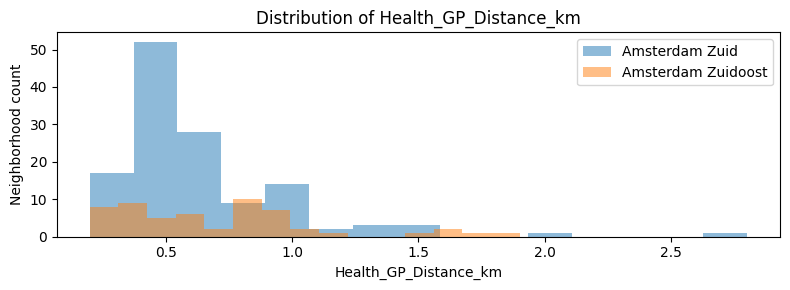

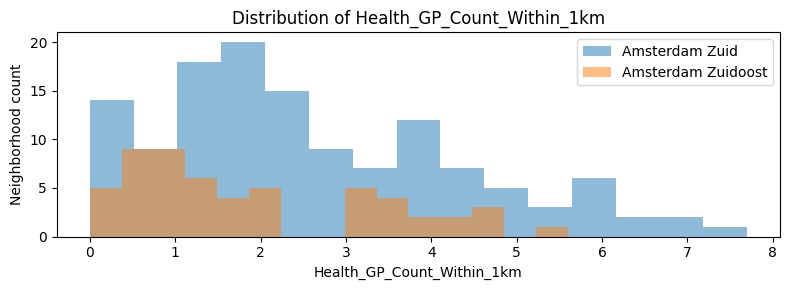

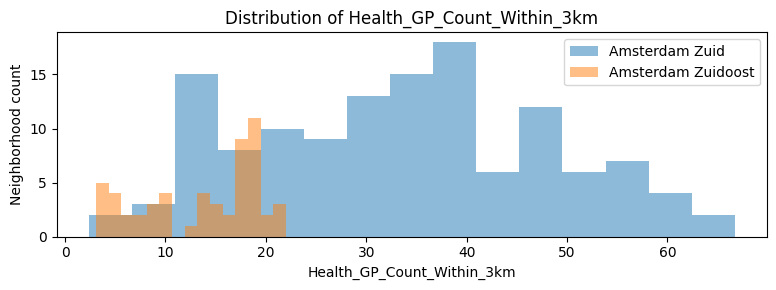

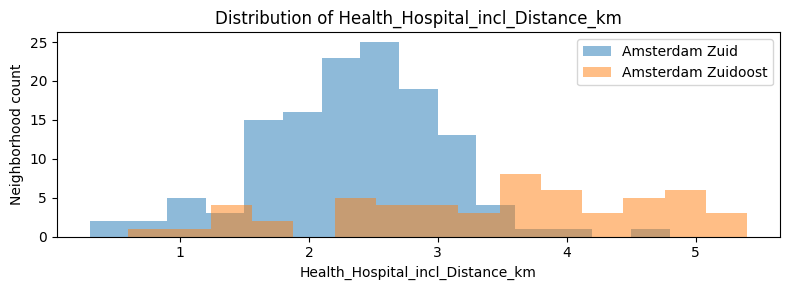

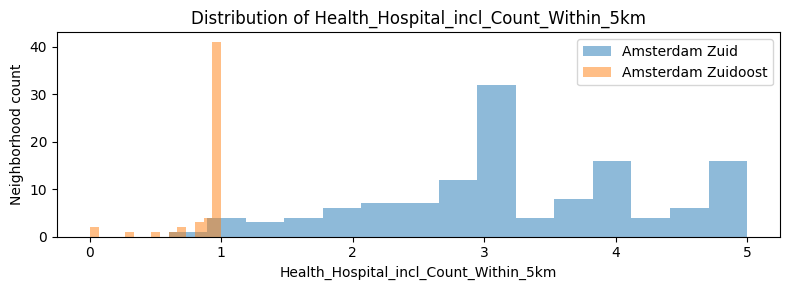

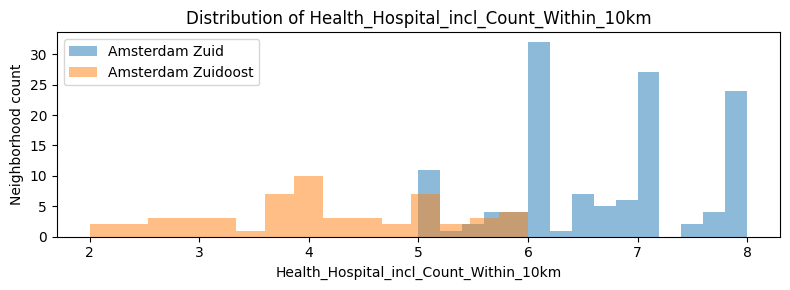


Creating comparison PDF: amenities_comparison_zuid_zuidoost_20260112_164659.pdf

  Processed 10/28 columns...
  Processed 20/28 columns...

 All amenity comparison plots have been exported to 'amenities_comparison_zuid_zuidoost_20260112_164659.pdf'
 Total: 28 comparison plots saved
 PDF opened in Preview: /Users/quynhmai/Documents/AAAHHHH/S3/gp3/1 copy/proximity to amentities/amenities_comparison_zuid_zuidoost_20260112_164659.pdf


In [82]:
for col in cols_to_compare[:6]:  # visualize a few columns
    plt.figure(figsize=(8,3))
    plt.hist(amenities_zuid[col].dropna(), bins=15, alpha=0.5, label='Amsterdam Zuid')
    plt.hist(amenities_zuidoost[col].dropna(), bins=15, alpha=0.5, label='Amsterdam Zuidoost')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Neighborhood count")
    plt.legend()
    plt.tight_layout()
    plt.show()


# Visualize all amenities comparison and export to a PDF
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime
import numpy as np
import pandas as pd

# Create PDF file with timestamp
pdf_filename = f'amenities_comparison_zuid_zuidoost_{datetime.now().strftime("%Y%m%d_%H%M%S")}.pdf'
print(f"\nCreating comparison PDF: {pdf_filename}\n")

# Open PDF and plot each column
with PdfPages(pdf_filename) as pdf:
    for idx, col in enumerate(cols_to_compare):
        # Create figure for each comparison
        fig, ax = plt.subplots(figsize=(10, 4))
        
        # Get data for both districts
        zuid_data = amenities_zuid[col].dropna()
        zuidoost_data = amenities_zuidoost[col].dropna()
        
        # Calculate shared bins based on combined data range for fair comparison
        combined_data = pd.concat([zuid_data, zuidoost_data])
        data_min = combined_data.min()
        data_max = combined_data.max()
        
        # Use adaptive binning: more bins for wider ranges, fewer for narrow ranges
        # But ensure at least 10 bins and at most 30 bins
        data_range = data_max - data_min
        if data_range == 0:
            # If all values are the same, use a simple bin
            bins = [data_min - 0.5, data_min + 0.5]
        else:
            # Calculate appropriate number of bins based on data range
            # For integer-like data (counts), use integer bins
            # For continuous data, use more bins
            is_integer_data = np.allclose(combined_data, combined_data.round(), rtol=1e-10)
            if data_range < 20 and is_integer_data:
                # Integer data with small range - use integer bins
                n_bins = int(data_range) + 1
                bins = np.arange(data_min, data_max + 2) - 0.5  # Center bins on integers
            else:
                # Continuous or large range data - use adaptive binning
                # Use more bins for wider ranges, but cap at 30
                n_bins = min(30, max(15, int(np.ceil(data_range / max(0.1, data_range / 20)))))
                bins = np.linspace(data_min, data_max, n_bins + 1)
        
        # Plot histograms with shared bins
        ax.hist(zuid_data, bins=bins, alpha=0.6, label='Amsterdam Zuid', color='blue', edgecolor='black', linewidth=0.5)
        ax.hist(zuidoost_data, bins=bins, alpha=0.6, label='Amsterdam Zuidoost', color='orange', edgecolor='black', linewidth=0.5)
        
        # Formatting
        ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold', pad=10)
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel("Neighborhood count", fontsize=10)
        ax.legend(loc='upper right', fontsize=9)
        ax.grid(True, alpha=0.3, linestyle='--')
        
        plt.tight_layout()
        
        # Save to PDF
        pdf.savefig(fig, bbox_inches='tight')
        plt.close(fig)  # Close figure to free memory
        
        # Print progress every 10 columns
        if (idx + 1) % 10 == 0:
            print(f"  Processed {idx + 1}/{len(cols_to_compare)} columns...")

print(f"\n All amenity comparison plots have been exported to '{pdf_filename}'")
print(f" Total: {len(cols_to_compare)} comparison plots saved")

# Automatically open the PDF in Preview to avoid SQLite/text editor errors
import subprocess
import os
try:
    pdf_path = os.path.abspath(pdf_filename)
    subprocess.run(['open', '-a', 'Preview', pdf_path], check=True)
    print(f" PDF opened in Preview: {pdf_path}")
except Exception as e:
    print(f"  Could not auto-open PDF. Please open manually: {pdf_filename}")
    print(f"   Error: {e}")



Interpretation: ^

## Reported health CSV

In [83]:
reported_health


,GEBIED_NAAM,18_en_ouder,18_tot_65,65_en_ouder
0,Nederland,69.00,72.00,60.00
1,Gemeente: Amsterdam,66.80,69.60,52.20
2,NaN,NaN,NaN,NaN
3,AMC,48.60,49.80,NaN
4,Aalsmeerwegbuurt Oost,72.60,75.10,55.90
...,...,...,...,...
477,Zuidwestkwadrant Osdorp Noord,56.90,61.80,36.20
478,Zuidwestkwadrant Osdorp Zuid,64.00,65.90,48.10
479,Zunderdorp,76.60,81.70,64.50
480,Zwarte Gouw,NaN,NaN,NaN


In [84]:
print("Original reported health shape:", reported_health.shape)
reported_health.columns


Original reported health shape: (482, 4)


Index(['GEBIED_NAAM', '18_en_ouder', '18_tot_65', '65_en_ouder'], dtype='object')

In [85]:
reported_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GEBIED_NAAM  481 non-null    object 
 1   18_en_ouder  446 non-null    float64
 2   18_tot_65    445 non-null    float64
 3   65_en_ouder  402 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.2+ KB


There are some null values that need to be deal with later in data cleanign

In [86]:
reported_health.describe()

,18_en_ouder,18_tot_65,65_en_ouder
count,446.00,445.00,402.00
mean,68.73,71.21,54.93
std,7.47,7.09,10.59
min,46.00,49.40,30.30
25%,63.52,66.30,46.60
50%,70.00,72.60,55.35
75%,74.50,76.10,63.15
max,86.00,85.90,76.10


Mean reported health
- 18+ : 68.73% reported good health
- 18-65 : 71.21% reported good health
- 65+ : 54.93% reported good health

In [87]:
# display all in GEBIED_NAAM column
print(reported_health['GEBIED_NAAM'].unique())

# display all in GEBIED_NAAM column
print(reported_health['GEBIED_NAAM'].unique())



['Nederland' 'Gemeente: Amsterdam' nan 'AMC' 'Aalsmeerwegbuurt Oost'
 'Aalsmeerwegbuurt West' 'Afrikahaven' 'Alexanderplein e.o.'
 'Alfa-driehoek' 'Amerikahaven' 'Amstel III deel A/B Noord'
 'Amstel III deel A/B Zuid' 'Amstel III deel C/D Noord'
 'Amstel III deel C/D Zuid' 'Amstelglorie' 'Amstelkwartier Noord'
 'Amstelkwartier West' 'Amstelkwartier Zuid' 'Amstelpark'
 'Amstelveldbuurt' 'Amsterdamse Bos' 'Amsterdamse Poort' 'Andreasterrein'
 'Anjeliersbuurt Noord' 'Anjeliersbuurt Zuid' 'Architectenbuurt'
 'BG-terrein e.o.' 'Baanakkerspark Noord' 'Baanakkerspark Zuid'
 'Balboaplein e.o.' 'Banne Noordoost' 'Banne Noordwest' 'Banne Zuidoost'
 'Banne Zuidwest' 'Banpleinbuurt' 'Beatrixpark' 'Bedrijvencentrum Osdorp'
 'Bedrijvencentrum Westerkwartier' 'Bedrijvengebied Cruquiusweg'
 'Bedrijvengebied Veelaan' 'Bedrijvengebied Zeeburgerkade'
 'Bedrijvenpark Lutkemeer' 'Bedrijventerrein Hamerstraat'
 'Bedrijventerrein Landlust' 'Bedrijventerrein Nieuwendammerdijk'
 'Bedrijventerrein Schinkel' 'Be

### Catergorised health report into Zuid & Zuidoost

In [88]:
# Sort the reported health data into neighborhoods zuid and zuidoost
# First, apply the same categorization function used for amenities data

# Amsterdam Zuidoost (Southeast) - Bijlmer and surrounding areas
zuidoost_keywords = [
    # Letter neighborhoods (Bijlmer)
    'D-buurt', 'E-buurt', 'F-buurt', 'G-buurt', 'H-buurt', 'K-buurt', 'L-buurt',
    # Bijlmer specific areas
    'Bijlmermuseum', 'Ganzenhoef', 'Geerdinkhof', 'Kantershof', 'Grunder', 'Koningshoef',
    'Gooise Kant', 'Kortvoort', 'Kelbergen', 'De Kameleon',
    # Holendrecht and surrounding
    'Holendrecht',
    # Reigersbos
    'Reigersbos',
    # Gein
    'Gein',
    # Other Zuidoost areas
    'Nellestein', 'Venserpolder', 'Amsterdamse Poort', 'Amstel III', 'AMC', 'Hoge Dijk',
    'Hoptille', 'Hakfort', 'Huigenbos', 'Huntum', 'Vogeltjeswei', 'Rechte H-buurt',
    'Gaasperpark', 'Hoofdcentrum-Zuidoost', 'Bullewijk'
]

# Amsterdam Zuid (South) - Museum Quarter, De Pijp, Zuidas, Buitenveldert, etc.
zuid_keywords = [
    # Museum Quarter and surrounding
    'Museumkwartier', 'Concertgebouwbuurt', 'Cornelis Schuytbuurt', 'P.C. Hooftbuurt',
    'Willemspark', 'Valeriusbuurt',
    # De Pijp
    'Oude Pijp', 'Nieuwe Pijp', 'Zuid Pijp', 'Sarphatiparkbuurt', 'Frans Halsbuurt',
    'Gerard Doubuurt', 'Hercules Seghersbuurt', 'Hemonybuurt', 'Cornelis Troostbuurt',
    'Lizzy Ansinghbuurt', 'Van der Helstpleinbuurt', 'Willibrordusbuurt',
    'BurgemeesterTellegenbuurt', 'Burgemeester Tellegenbuurt',
    # Zuidas and business district
    'Zuidas', 'Kop Zuidas', 'RAI', 'VU-kwartier', 'Vivaldi',
    # Buitenveldert
    'Buitenveldert', 'Gelderlandpleinbuurt', 'De Klenckebuurt', 'Amstelpark', 'Zuiderhof',
    # Stadionbuurt and Olympic area
    'Stadionbuurt', 'Olympisch Stadion', 'Marathonbuurt', 'Bertelmanpleinbuurt',
    # Apollobuurt and surrounding
    'Apollobuurt', 'Hiltonbuurt', 'Minervabuurt', 'Beethovenbuurt', 'Diepenbrockbuurt',
    # Scheldebuurt and Rijnbuurt
    'Scheldebuurt', 'Wielingenbuurt', 'Veluwebuurt', 'IJselbuurt', 'Rijnbuurt',
    'Kromme Mijdrechtbuurt', 'Zorgvlied', 'Prinses Irenebuurt',
    # Vondelpark area
    'Vondelparkbuurt', 'Helmersbuurt', 'Cremerbuurt', 'Overtoomse Sluis',
    # Other Zuid areas
    'Diamantbuurt', 'Van Tuyllbuurt', 'IJsbaanpad', 'Duivelseiland', 'Harmoniehofbuurt',
    'Banpleinbuurt', 'Hondecoeterbuurt', 'Johannes Vermeerbuurt',
    # Schinkel area
    'Schinkelbuurt', 'Bedrijventerrein Schinkel', 'Aalsmeerwegbuurt', 'Surinamepleinbuurt',
    'Legmeerpleinbuurt', 'Hoofddorppleinbuurt', 'Westlandgrachtbuurt', 'Westlandgracht',
    'Nieuwe Meer', 'Riekerpolder', 'Riekerhaven', 'Delflandpleinbuurt',
    # Sloten area (southern part of Zuid)
    'Sloten', 'Nieuw-Sloten', 'Dorp Sloten', 'Belgiëplein', 'Sloterweg', 'Park Haagseweg',
    'Schipluidenbuurt', 'Koningin Wilhelminaplein', 'Andreasterrein',
    # Slotervaart (southern part)
    'Slotervaart', 'Medisch Centrum Slotervaart', 'Staalmanbuurt', 'Louis Crispijnbuurt',
    'Jacques Veltmanbuurt', 'Johan Jongkindbuurt', 'Rembrandtpark',
    'Overtoomse Veld', 'Lucas/Andreasziekenhuis', 'Jacob Geelbuurt', 'Emanuel van Meterenbuurt',
    'Oostoever Sloterplas'
]

def categorize_area(area_name):
    """
    Categorize an area name into Amsterdam Zuid, Amsterdam Zuidoost, or Other.
    """
    area_name_str = str(area_name).strip()
    
    # Check for Zuidoost
    for keyword in zuidoost_keywords:
        if keyword.lower() in area_name_str.lower():
            return 'Amsterdam Zuidoost'
    
    # Check for Zuid
    for keyword in zuid_keywords:
        if keyword.lower() in area_name_str.lower():
            return 'Amsterdam Zuid'
    
    return 'Other'

# Apply categorization to reported_health data
# Use GEBIED_NAAM column and normalize names (handle spaces vs hyphens)
def normalize_area_name(name):
    """Normalize area name by converting hyphens to spaces for consistent matching"""
    if pd.isna(name):
        return ""
    name_str = str(name).strip()
    # Replace hyphens with spaces for matching (handles both formats)
    return name_str.replace('-', ' ').lower()

# Create a normalized version for matching
reported_health['area_name_normalized'] = reported_health['GEBIED_NAAM'].apply(normalize_area_name)

# Update categorize_area to work with normalized names
def categorize_area_normalized(area_name_normalized):
    """
    Categorize an area name into Amsterdam Zuid, Amsterdam Zuidoost, or Other.
    Works with normalized names (spaces instead of hyphens).
    """
    if not area_name_normalized or area_name_normalized == 'nan':
        return 'Other'
    
    area_name_str = str(area_name_normalized).strip().lower()
    
    # Normalize keywords for matching (convert hyphens to spaces)
    zuidoost_keywords_normalized = [k.replace('-', ' ').lower() for k in zuidoost_keywords]
    zuid_keywords_normalized = [k.replace('-', ' ').lower() for k in zuid_keywords]
    
    # Check for Zuidoost
    for keyword in zuidoost_keywords_normalized:
        if keyword in area_name_str:
            return 'Amsterdam Zuidoost'
    
    # Check for Zuid
    for keyword in zuid_keywords_normalized:
        if keyword in area_name_str:
            return 'Amsterdam Zuid'
    
    return 'Other'

# Apply categorization using normalized names
reported_health['district'] = reported_health['area_name_normalized'].apply(categorize_area_normalized)

# Sort the reported health data into neighborhoods zuid and zuidoost
reported_health_zuid = reported_health[reported_health['district'] == 'Amsterdam Zuid']
reported_health_zuidoost = reported_health[reported_health['district'] == 'Amsterdam Zuidoost']

# Display summary
print("="*70)
print("REPORTED HEALTH DATA CATEGORIZATION")
print("="*70)
print(f"\nTotal areas in reported_health: {len(reported_health)}")
print(f"\nDistribution by district:")
print(reported_health['district'].value_counts())
print(f"\nAmsterdam Zuid: {len(reported_health_zuid)} neighborhoods")
print(f"Amsterdam Zuidoost: {len(reported_health_zuidoost)} neighborhoods")

# Save the reported health data into neighborhoods zuid and zuidoost
reported_health_zuid.to_csv('reported_health_zuid.csv', index=False)
reported_health_zuidoost.to_csv('reported_health_zuidoost.csv', index=False)

print(f"\n Saved reported_health_zuid.csv ({len(reported_health_zuid)} rows)")
print(f" Saved reported_health_zuidoost.csv ({len(reported_health_zuidoost)} rows)")

REPORTED HEALTH DATA CATEGORIZATION

Total areas in reported_health: 482

Distribution by district:
district
Other                 331
Amsterdam Zuid        104
Amsterdam Zuidoost     47
Name: count, dtype: int64

Amsterdam Zuid: 104 neighborhoods
Amsterdam Zuidoost: 47 neighborhoods

 Saved reported_health_zuid.csv (104 rows)
 Saved reported_health_zuidoost.csv (47 rows)


### Compare Zuid & Zuidoost reported health

/var/folders/p0/hrndsk2d7jzbhfc3__sry99r0000gn/T/ipykernel_47950/3317894657.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/p0/hrndsk2d7jzbhfc3__sry99r0000gn/T/ipykernel_47950/3317894657.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/p0/hrndsk2d7jzbhfc3__sry99r0000gn/T/ipykernel_47950/3317894657.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


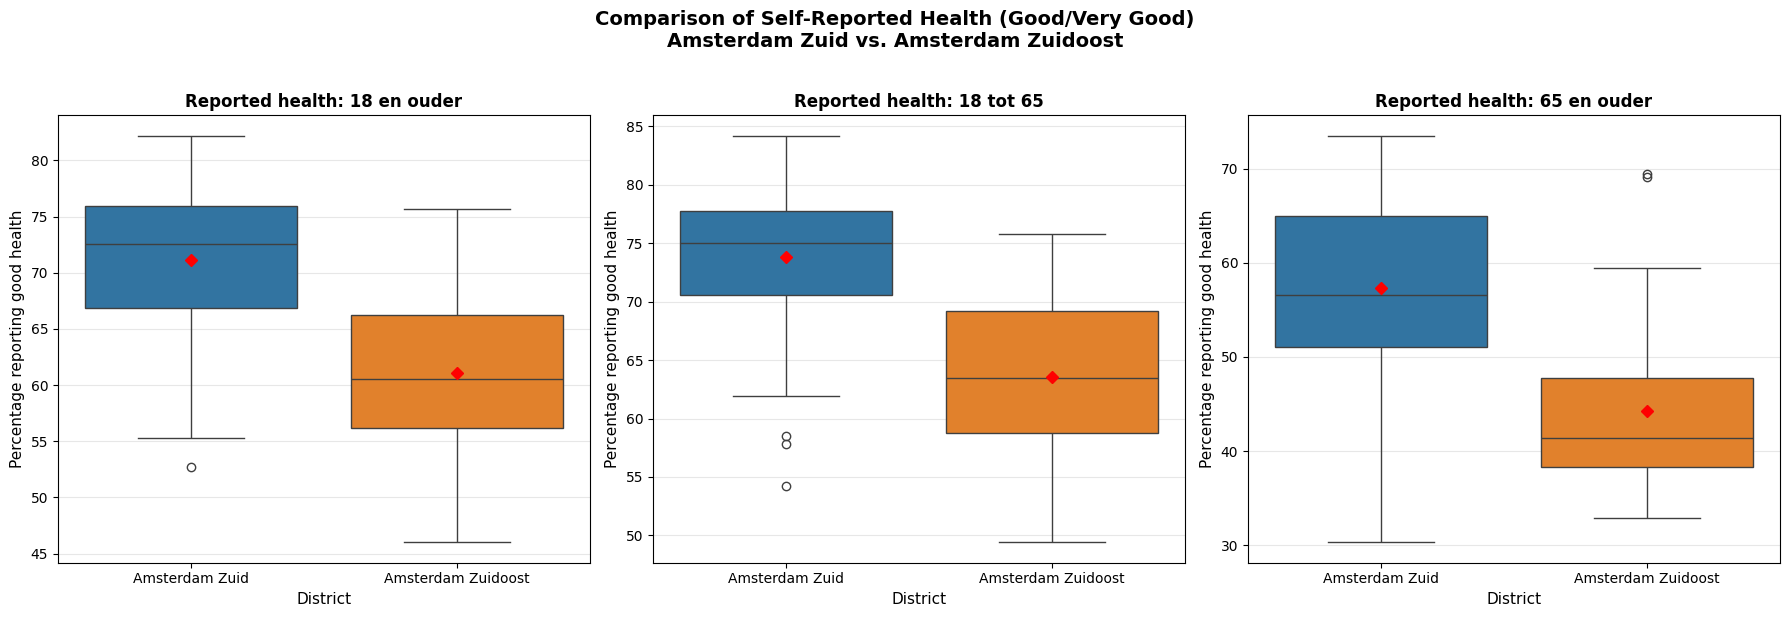

In [89]:
import seaborn as sns
# Compare reported health data between zuid and zuidoost with visualizations

# Identify the columns of interest (reported percentages)
health_cols = ['18_en_ouder', '18_tot_65', '65_en_ouder']

# Prepare data for plotting - combine both districts with district labels
plot_data_list = []
for col in health_cols:
    # Zuid data
    zuid_df = pd.DataFrame({
        'value': reported_health_zuid[col].dropna(),
        'district': 'Amsterdam Zuid',
        'age_group': col.replace('_', ' ')
    })
    # Zuidoost data
    zuidoost_df = pd.DataFrame({
        'value': reported_health_zuidoost[col].dropna(),
        'district': 'Amsterdam Zuidoost',
        'age_group': col.replace('_', ' ')
    })
    plot_data_list.append(pd.concat([zuid_df, zuidoost_df], ignore_index=True))

# Combine all data
plot_data = pd.concat(plot_data_list, ignore_index=True)

# Set up side-by-side boxplots to compare Zuid vs. Zuidoost
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Color palette: blue for Zuid, orange for Zuidoost (matching the amenities plots)
colors = {'Amsterdam Zuid': '#1f77b4', 'Amsterdam Zuidoost': '#ff7f0e'}

for i, col in enumerate(health_cols):
    age_group = col.replace('_', ' ')
    # Filter data for this age group
    age_data = plot_data[plot_data['age_group'] == age_group]
    
    # Create boxplot with colors
    sns.boxplot(
        data=age_data,
        x='district',
        y='value',
        palette=[colors['Amsterdam Zuid'], colors['Amsterdam Zuidoost']],
        showmeans=True,
        meanprops={'marker': 'D', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': 6},
        ax=axes[i]
    )
    
    axes[i].set_xlabel('District', fontsize=11)
    axes[i].set_ylabel('Percentage reporting good health', fontsize=11)
    axes[i].set_title(f'Reported health: {age_group}', fontsize=12, fontweight='bold')
    axes[i].grid(True, alpha=0.3, axis='y')
    
    # Rotate x-axis labels if needed
    axes[i].tick_params(axis='x', rotation=0)

plt.suptitle('Comparison of Self-Reported Health (Good/Very Good)\nAmsterdam Zuid vs. Amsterdam Zuidoost', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


In [90]:
#Summary statistics

print("\nSummary statistics for Amsterdam Zuid:")
print(reported_health_zuid[health_cols].describe())
print("\nSummary statistics for Amsterdam Zuidoost:")
print(reported_health_zuidoost[health_cols].describe())



Summary statistics for Amsterdam Zuid:
       18_en_ouder  18_tot_65  65_en_ouder
count       103.00     102.00        95.00
mean         71.10      73.80        57.32
std           6.25       5.89         9.59
min          52.70      54.20        30.30
25%          66.90      70.60        51.05
50%          72.60      75.05        56.60
75%          75.95      77.78        65.00
max          82.20      84.20        73.50

Summary statistics for Amsterdam Zuidoost:
       18_en_ouder  18_tot_65  65_en_ouder
count        46.00      46.00        38.00
mean         61.10      63.58        44.29
std           7.87       7.15         9.03
min          46.00      49.40        32.90
25%          56.23      58.73        38.32
50%          60.55      63.50        41.35
75%          66.28      69.20        47.80
max          75.70      75.80        69.40


#### T-test for significance for mean reported health between Zuid & Zuidoost

In [91]:
# Compute t-test for '18_en_ouder' between the two districts
reported_health_combined = pd.concat([reported_health_zuid[["district"] + health_cols], reported_health_zuidoost[["district"] + health_cols]])
reported_health_combined.reset_index(drop=True, inplace=True)
reported_health_combined

reported_health_combined.groupby("district")["18_en_ouder"].mean()



district
Amsterdam Zuid       71.10
Amsterdam Zuidoost   61.10
Name: 18_en_ouder, dtype: float64

In [92]:

def t_test_reported_health(age_group):
    import scipy.stats as stats
    t_statistic, p_value = stats.ttest_ind(a = reported_health_combined.loc[reported_health_combined["district"] == "Amsterdam Zuid", age_group], # vector of values for TG
                                          b = reported_health_combined.loc[reported_health_combined["district"] == "Amsterdam Zuidoost", age_group], # vector of values for MG
                                          alternative = 'two-sided',
                                          nan_policy = 'omit')
    
    print(f'Test for age group: {age_group.replace("_", " ")}')
    print(f't-statistic: {t_statistic}')
    print(f'p-value: {p_value}')
    
    # Conclusions
    alpha = 0.05
    if p_value < alpha:
      print(f'p-value of {round(p_value,3)} is lower than the alpha value of {alpha}. \nThe null hypothesis should be rejected. \
    \nThe mean values in two groups are stastically significantly different.\n')
      
    else:
        print(f'p-value of {round(p_value,3)} is higher than alpha value of {alpha}. \nThe null hypothesis should be retained. \
    \nThe mean values in two groups are not stastically significantly different.\n')
        
t_test_reported_health("18_en_ouder")
t_test_reported_health("18_tot_65")
t_test_reported_health("65_en_ouder")

Test for age group: 18 en ouder
t-statistic: 8.30879015461292
p-value: 5.880589820873993e-14
p-value of 0.0 is lower than the alpha value of 0.05. 
The null hypothesis should be rejected.     
The mean values in two groups are stastically significantly different.

Test for age group: 18 tot 65
t-statistic: 9.123292874146196
p-value: 5.386752073440468e-16
p-value of 0.0 is lower than the alpha value of 0.05. 
The null hypothesis should be rejected.     
The mean values in two groups are stastically significantly different.

Test for age group: 65 en ouder
t-statistic: 7.193732690497058
p-value: 4.346930591400765e-11
p-value of 0.0 is lower than the alpha value of 0.05. 
The null hypothesis should be rejected.     
The mean values in two groups are stastically significantly different.



=> There is a statistically significant difference between the reported health in different age groups in Zuid vs. Zuidoost.

In [93]:
amenities

,area_name,municipality_name,region_type,Health_GP_Distance_km,Health_GP_Count_Within_1km,Health_GP_Count_Within_3km,Health_GP_Count_Within_5km,Health_GP_after_hours_Distance_km,Health_Pharmacy_Distance_km,Health_Hospital_incl_Distance_km,...,Leisure_culture_Cinema_Count_bioscopen_Within_5_km_count,Leisure_culture_Cinema_Count_bioscopen_Within_10_km_count,Leisure_culture_Cinema_Count_bioscopen_Within_20_km_count,Leisure_culture_Recreation_Distance_to_sauna_km,Leisure_culture_Recreation_Distance_to_tanning_bed_km,Leisure_culture_Recreation_Distance_to_attraction_km,Leisure_culture_Recreation_Count_attractions_Within_10_km_count,Leisure_culture_Recreation_Count_attractions_Within_20_km_count,Leisure_culture_Recreation_Count_attractions_Within_50_km_count,district
0,Amsterdam,Amsterdam,Gemeente,0.60,3.00,28.00,66.80,3.30,0.70,2.60,...,5.70,12.50,19.10,2.50,2.00,3.20,5.20,13.80,60.50,Other
1,Haarlemmerbuurt,Amsterdam,Wijk,0.50,3.50,30.30,89.00,4.60,0.90,2.00,...,10.90,15.30,20.70,1.50,0.80,3.60,6.10,13.90,61.80,Other
2,Planciusbuurt-Noord,Amsterdam,Buurt,0.80,3.80,28.00,77.80,4.50,0.60,2.40,...,12.00,16.00,20.00,1.90,0.40,4.00,5.20,15.00,61.00,Other
3,Westelijke eilanden,Amsterdam,Buurt,0.90,1.50,26.90,75.60,4.80,0.90,2.40,...,10.60,15.60,19.40,1.90,0.70,4.00,5.20,14.90,61.00,Other
4,Westerdokseiland,Amsterdam,Buurt,0.20,2.00,28.60,93.00,4.50,1.40,2.00,...,10.70,15.30,21.00,1.50,1.30,3.20,6.50,11.00,62.00,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,Gein,Amsterdam,Wijk,0.80,0.70,4.30,22.90,3.60,0.90,3.60,...,0.20,1.20,16.00,6.70,7.00,1.30,3.10,9.50,55.80,Amsterdam Zuidoost
583,Gein 1,Amsterdam,Buurt,0.80,0.60,7.20,24.50,3.20,0.80,3.20,...,0.70,1.70,16.00,6.10,6.40,1.20,3.30,10.40,56.00,Amsterdam Zuidoost
584,Gein 2,Amsterdam,Buurt,0.80,1.00,3.50,21.80,3.60,0.80,3.60,...,0.00,1.00,16.00,7.10,7.40,1.70,3.00,9.50,56.00,Amsterdam Zuidoost
585,Gein 3,Amsterdam,Buurt,1.00,0.50,3.10,22.80,3.80,1.00,3.80,...,0.00,1.00,16.00,6.70,7.00,0.80,3.00,9.00,55.40,Amsterdam Zuidoost


# Merge CSVs

In [94]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from thefuzz import process

amenities['Name_clean'] = amenities['area_name'].str.lower().str.replace(r'[^a-z0-9 ]', '', regex=True).str.strip()
reported_health['Name_clean'] = reported_health['GEBIED_NAAM'].str.lower().str.replace(r'[^a-z0-9 ]', '', regex=True).str.strip()

def best_match(x, choices):
    result = process.extractOne(x, choices)
    if result:
        match, score, _ = result  # ignore the index
        return match if score > 85 else None
    return None


amenities['match'] = amenities['Name_clean'].apply(lambda x: best_match(x, reported_health['Name_clean']))

# Merge based on matched names
merged_df = pd.merge(amenities, reported_health, left_on='match', right_on='Name_clean', how='left')
merged_df = merged_df.dropna()

merged_df.to_csv('merged.csv', index=False) 

In [95]:
merged_df

,area_name,municipality_name,region_type,Health_GP_Distance_km,Health_GP_Count_Within_1km,Health_GP_Count_Within_3km,Health_GP_Count_Within_5km,Health_GP_after_hours_Distance_km,Health_Pharmacy_Distance_km,Health_Hospital_incl_Distance_km,...,district_x,Name_clean_x,match,GEBIED_NAAM,18_en_ouder,18_tot_65,65_en_ouder,area_name_normalized,district_y,Name_clean_y
0,Amsterdam,Amsterdam,Gemeente,0.60,3.00,28.00,66.80,3.30,0.70,2.60,...,Other,amsterdam,gemeente amsterdam,Gemeente: Amsterdam,66.80,69.60,52.20,gemeente: amsterdam,Other,gemeente amsterdam
1,Haarlemmerbuurt,Amsterdam,Wijk,0.50,3.50,30.30,89.00,4.60,0.90,2.00,...,Other,haarlemmerbuurt,haarlemmerbuurt oost,Haarlemmerbuurt Oost,71.50,74.50,59.70,haarlemmerbuurt oost,Other,haarlemmerbuurt oost
2,Planciusbuurt-Noord,Amsterdam,Buurt,0.80,3.80,28.00,77.80,4.50,0.60,2.40,...,Other,planciusbuurtnoord,planciusbuurt noord,Planciusbuurt Noord,67.90,69.30,57.50,planciusbuurt noord,Other,planciusbuurt noord
3,Westelijke eilanden,Amsterdam,Buurt,0.90,1.50,26.90,75.60,4.80,0.90,2.40,...,Other,westelijke eilanden,westelijke eilanden,Westelijke eilanden,70.30,72.90,61.80,westelijke eilanden,Other,westelijke eilanden
4,Westerdokseiland,Amsterdam,Buurt,0.20,2.00,28.60,93.00,4.50,1.40,2.00,...,Other,westerdokseiland,westerdokseiland,Westerdokseiland,71.20,74.30,62.60,westerdokseiland,Other,westerdokseiland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,Gein,Amsterdam,Wijk,0.80,0.70,4.30,22.90,3.60,0.90,3.60,...,Amsterdam Zuidoost,gein,gein noordoost,Gein Noordoost,73.00,74.60,69.10,gein noordoost,Amsterdam Zuidoost,gein noordoost
583,Gein 1,Amsterdam,Buurt,0.80,0.60,7.20,24.50,3.20,0.80,3.20,...,Amsterdam Zuidoost,gein 1,gein noordoost,Gein Noordoost,73.00,74.60,69.10,gein noordoost,Amsterdam Zuidoost,gein noordoost
584,Gein 2,Amsterdam,Buurt,0.80,1.00,3.50,21.80,3.60,0.80,3.60,...,Amsterdam Zuidoost,gein 2,gein noordoost,Gein Noordoost,73.00,74.60,69.10,gein noordoost,Amsterdam Zuidoost,gein noordoost
585,Gein 3,Amsterdam,Buurt,1.00,0.50,3.10,22.80,3.80,1.00,3.80,...,Amsterdam Zuidoost,gein 3,gein noordoost,Gein Noordoost,73.00,74.60,69.10,gein noordoost,Amsterdam Zuidoost,gein noordoost


In [96]:
df = merged_df.drop(columns=['area_name', 'municipality_name', 'region_type', 'Name_clean_x', 'match', 'GEBIED_NAAM', 'area_name_normalized', 'district_y','Name_clean_y'])
df

,Health_GP_Distance_km,Health_GP_Count_Within_1km,Health_GP_Count_Within_3km,Health_GP_Count_Within_5km,Health_GP_after_hours_Distance_km,Health_Pharmacy_Distance_km,Health_Hospital_incl_Distance_km,Health_Hospital_incl_Count_Within_5km,Health_Hospital_incl_Count_Within_10km,Health_Hospital_incl_Count_Within_20km,...,Leisure_culture_Recreation_Distance_to_sauna_km,Leisure_culture_Recreation_Distance_to_tanning_bed_km,Leisure_culture_Recreation_Distance_to_attraction_km,Leisure_culture_Recreation_Count_attractions_Within_10_km_count,Leisure_culture_Recreation_Count_attractions_Within_20_km_count,Leisure_culture_Recreation_Count_attractions_Within_50_km_count,district_x,18_en_ouder,18_tot_65,65_en_ouder
0,0.60,3.00,28.00,66.80,3.30,0.70,2.60,2.00,5.40,12.90,...,2.50,2.00,3.20,5.20,13.80,60.50,Other,66.80,69.60,52.20
1,0.50,3.50,30.30,89.00,4.60,0.90,2.00,2.40,6.00,14.10,...,1.50,0.80,3.60,6.10,13.90,61.80,Other,71.50,74.50,59.70
2,0.80,3.80,28.00,77.80,4.50,0.60,2.40,2.00,6.00,14.70,...,1.90,0.40,4.00,5.20,15.00,61.00,Other,67.90,69.30,57.50
3,0.90,1.50,26.90,75.60,4.80,0.90,2.40,1.90,6.00,14.10,...,1.90,0.70,4.00,5.20,14.90,61.00,Other,70.30,72.90,61.80
4,0.20,2.00,28.60,93.00,4.50,1.40,2.00,2.10,6.00,14.00,...,1.50,1.30,3.20,6.50,11.00,62.00,Other,71.20,74.30,62.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,0.80,0.70,4.30,22.90,3.60,0.90,3.60,1.00,2.60,10.70,...,6.70,7.00,1.30,3.10,9.50,55.80,Amsterdam Zuidoost,73.00,74.60,69.10
583,0.80,0.60,7.20,24.50,3.20,0.80,3.20,1.00,3.10,11.00,...,6.10,6.40,1.20,3.30,10.40,56.00,Amsterdam Zuidoost,73.00,74.60,69.10
584,0.80,1.00,3.50,21.80,3.60,0.80,3.60,1.00,2.50,11.00,...,7.10,7.40,1.70,3.00,9.50,56.00,Amsterdam Zuidoost,73.00,74.60,69.10
585,1.00,0.50,3.10,22.80,3.80,1.00,3.80,1.00,2.50,10.10,...,6.70,7.00,0.80,3.00,9.00,55.40,Amsterdam Zuidoost,73.00,74.60,69.10


# Linear regression

## Variables

In [97]:
regressors_full = [
    "Health_GP_Distance_km",
    "Health_GP_Count_Within_1km",
    "Health_GP_Count_Within_3km", 
    "Health_GP_Count_Within_5km",
    "Health_GP_after_hours_Distance_km",
    "Health_Pharmacy_Distance_km",
    "Health_Hospital_incl_Distance_km",
    "Health_Hospital_incl_Count_Within_5km",
    "Health_Hospital_incl_Count_Within_10km",
    "Health_Hospital_incl_Count_Within_20km",
    "Health_Hospital_excl_Distance_km",
    "Health_Hospital_excl_Count_Within_5km",
    "Health_Hospital_excl_Count_Within_10km",
    "Health_Hospital_excl_Count_Within_20km",
    "Retail_Daily_grocery_Distance_to_large_supermarket_km",
    "Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count",
    "Retail_Daily_grocery_Count_large_supermarketen_Within_3_km_count",
    "Retail_Daily_grocery_Count_large_supermarketen_Within_5_km_count",
    "Retail_Daily_grocery_Distance_to_other_daily_goods_km",
    "Retail_Daily_grocery_Count_overige_dagelijkse_levensmiddelen_Within_1_km_count",
    "Retail_Daily_grocery_Count_overige_dagelijkse_levensmiddelen_Within_3_km_count",
    "Retail_Daily_grocery_Count_overige_dagelijkse_levensmiddelen_Within_5_km_count",
    "Hospitality_Cafes_Distance_to_café_e.d._km",
    "Hospitality_Cafes_Count_cafés_e.d._Within_1_km_count",
    "Hospitality_Cafes_Count_cafés_e.d._Within_3_km_count",
    "Hospitality_Cafes_Count_cafés_e.d._Within_5_km_count",
    "Hospitality_Cafeterias_Count_cafetaria's_e.d._Within_1_km_count",
    "Hospitality_Cafeterias_Count_cafetaria's_e.d._Within_3_km_count",
    "Hospitality_Cafeterias_Count_cafetaria's_e.d._Within_5_km_count",
    "Hospitality_Restaurants_Distance_to_restaurant_km",
    "Hospitality_Restaurants_Count_restaurants_Within_1_km_count",
    "Hospitality_Restaurants_Count_restaurants_Within_3_km_count",
    "Hospitality_Restaurants_Count_restaurants_Within_5_km_count",
    "Traffic_transport_Distance_to_highway_ramp_km",
    "Traffic_transport_Train_stations_Distance_to_treinstations_totaal_km",
    "Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km",
    "Leisure_culture_Distance_to_bibliotheek_km",
    "Leisure_culture_Sport_Distance_to_indoor_pool_km",
    "Leisure_culture_Sport_Distance_to_ice_rink_km",
    "Leisure_culture_Museum_Distance_to_museum_km",
    "Leisure_culture_Museum_Count_musea_Within_5_km_count",
    "Leisure_culture_Museum_Count_musea_Within_10_km_count",
    "Leisure_culture_Museum_Count_musea_Within_20_km_count",
    "Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_podiumkunsten_totaal_km",
    "Leisure_culture_Performing_arts_(excl._festivals)_Count_podiumkunsten_totaal_Within_5_km_count",
    "Leisure_culture_Performing_arts_(excl._festivals)_Count_podiumkunsten_totaal_Within_10_km_count",
    "Leisure_culture_Performing_arts_(excl._festivals)_Count_podiumkunsten_totaal_Within_20_km_count",
    "Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_music_venue_km",
    "Leisure_culture_Cinema_Distance_to_bioscoop_km",
    "Leisure_culture_Cinema_Count_bioscopen_Within_5_km_count",
    "Leisure_culture_Cinema_Count_bioscopen_Within_10_km_count",
    "Leisure_culture_Cinema_Count_bioscopen_Within_20_km_count",
    "Leisure_culture_Recreation_Distance_to_sauna_km",
    "Leisure_culture_Recreation_Distance_to_tanning_bed_km",
    "Leisure_culture_Recreation_Distance_to_attraction_km",
    "Leisure_culture_Recreation_Count_attractions_Within_10_km_count",
    "Leisure_culture_Recreation_Count_attractions_Within_20_km_count",
    "Leisure_culture_Recreation_Count_attractions_Within_50_km_count",
]

# One-hot encode district name
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, dtype=int)
district_encoder_one_hot = encoder.fit_transform(df[['district_x']])
district_encoder_categories = encoder.get_feature_names_out(['district_x'])
district_encoder_one_hot = pd.DataFrame(district_encoder_one_hot, columns=district_encoder_categories, index=df.index)

## Full model

In [98]:
X_full = pd.concat([merged_df[regressors_full], district_encoder_one_hot], axis=1)

In [99]:
import statsmodels.api as sm

X_full = pd.concat([merged_df[regressors_full], district_encoder_one_hot], axis=1)

# Add constant for intercept
X_full_with_const = sm.add_constant(X_full)

# Define target variable
y = merged_df['18_en_ouder']

# Convert everything to float
X_full_with_const = X_full_with_const.astype(float)
y = y.astype(float)

df_full_with_district = pd.DataFrame.join(y, X_full_with_const)
df_full_with_district

,18_en_ouder,const,Health_GP_Distance_km,Health_GP_Count_Within_1km,Health_GP_Count_Within_3km,Health_GP_Count_Within_5km,Health_GP_after_hours_Distance_km,Health_Pharmacy_Distance_km,Health_Hospital_incl_Distance_km,Health_Hospital_incl_Count_Within_5km,...,Leisure_culture_Cinema_Count_bioscopen_Within_20_km_count,Leisure_culture_Recreation_Distance_to_sauna_km,Leisure_culture_Recreation_Distance_to_tanning_bed_km,Leisure_culture_Recreation_Distance_to_attraction_km,Leisure_culture_Recreation_Count_attractions_Within_10_km_count,Leisure_culture_Recreation_Count_attractions_Within_20_km_count,Leisure_culture_Recreation_Count_attractions_Within_50_km_count,district_x_Amsterdam Zuid,district_x_Amsterdam Zuidoost,district_x_Other
0,66.80,1.00,0.60,3.00,28.00,66.80,3.30,0.70,2.60,2.00,...,19.10,2.50,2.00,3.20,5.20,13.80,60.50,0.00,0.00,1.00
1,71.50,1.00,0.50,3.50,30.30,89.00,4.60,0.90,2.00,2.40,...,20.70,1.50,0.80,3.60,6.10,13.90,61.80,0.00,0.00,1.00
2,67.90,1.00,0.80,3.80,28.00,77.80,4.50,0.60,2.40,2.00,...,20.00,1.90,0.40,4.00,5.20,15.00,61.00,0.00,0.00,1.00
3,70.30,1.00,0.90,1.50,26.90,75.60,4.80,0.90,2.40,1.90,...,19.40,1.90,0.70,4.00,5.20,14.90,61.00,0.00,0.00,1.00
4,71.20,1.00,0.20,2.00,28.60,93.00,4.50,1.40,2.00,2.10,...,21.00,1.50,1.30,3.20,6.50,11.00,62.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,73.00,1.00,0.80,0.70,4.30,22.90,3.60,0.90,3.60,1.00,...,16.00,6.70,7.00,1.30,3.10,9.50,55.80,0.00,1.00,0.00
583,73.00,1.00,0.80,0.60,7.20,24.50,3.20,0.80,3.20,1.00,...,16.00,6.10,6.40,1.20,3.30,10.40,56.00,0.00,1.00,0.00
584,73.00,1.00,0.80,1.00,3.50,21.80,3.60,0.80,3.60,1.00,...,16.00,7.10,7.40,1.70,3.00,9.50,56.00,0.00,1.00,0.00
585,73.00,1.00,1.00,0.50,3.10,22.80,3.80,1.00,3.80,1.00,...,16.00,6.70,7.00,0.80,3.00,9.00,55.40,0.00,1.00,0.00


## Distance only model

In [100]:
regressors_distance = [
    "Health_GP_Distance_km",
    "Health_GP_after_hours_Distance_km",
    "Health_Pharmacy_Distance_km",
    "Health_Hospital_incl_Distance_km",
    "Health_Hospital_excl_Distance_km",
    "Retail_Daily_grocery_Distance_to_large_supermarket_km",
    "Retail_Daily_grocery_Distance_to_other_daily_goods_km",
    "Hospitality_Cafes_Distance_to_café_e.d._km",
    "Hospitality_Restaurants_Distance_to_restaurant_km",
    "Traffic_transport_Distance_to_highway_ramp_km",
    "Traffic_transport_Train_stations_Distance_to_treinstations_totaal_km",
    "Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km",
    "Leisure_culture_Distance_to_bibliotheek_km",
    "Leisure_culture_Sport_Distance_to_indoor_pool_km",
    "Leisure_culture_Sport_Distance_to_ice_rink_km",
    "Leisure_culture_Museum_Distance_to_museum_km",
    "Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_podiumkunsten_totaal_km",
    "Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_music_venue_km",
    "Leisure_culture_Cinema_Distance_to_bioscoop_km",
    "Leisure_culture_Recreation_Distance_to_sauna_km",
    "Leisure_culture_Recreation_Distance_to_tanning_bed_km",
    "Leisure_culture_Recreation_Distance_to_attraction_km",
]

In [101]:
X_distance = pd.concat([merged_df[regressors_distance]], axis=1)

In [102]:
import statsmodels.api as sm

X_distance = pd.concat([merged_df[regressors_distance]], axis=1)

# Add constant for intercept
X_distance_with_const = sm.add_constant(X_distance)

# Define target variable
y = merged_df['18_en_ouder']

# Convert everything to float
X_distance_with_const = X_distance_with_const.astype(float)
y = y.astype(float)

df_distance = pd.DataFrame.join(y, X_distance_with_const)
df_distance

,18_en_ouder,const,Health_GP_Distance_km,Health_GP_after_hours_Distance_km,Health_Pharmacy_Distance_km,Health_Hospital_incl_Distance_km,Health_Hospital_excl_Distance_km,Retail_Daily_grocery_Distance_to_large_supermarket_km,Retail_Daily_grocery_Distance_to_other_daily_goods_km,Hospitality_Cafes_Distance_to_café_e.d._km,...,Leisure_culture_Distance_to_bibliotheek_km,Leisure_culture_Sport_Distance_to_indoor_pool_km,Leisure_culture_Sport_Distance_to_ice_rink_km,Leisure_culture_Museum_Distance_to_museum_km,Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_podiumkunsten_totaal_km,Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_music_venue_km,Leisure_culture_Cinema_Distance_to_bioscoop_km,Leisure_culture_Recreation_Distance_to_sauna_km,Leisure_culture_Recreation_Distance_to_tanning_bed_km,Leisure_culture_Recreation_Distance_to_attraction_km
0,66.80,1.00,0.60,3.30,0.70,2.60,3.10,0.60,0.50,0.80,...,1.40,2.30,7.40,2.50,1.70,3.50,2.80,2.50,2.00,3.20
1,71.50,1.00,0.50,4.60,0.90,2.00,4.60,0.40,0.30,0.30,...,1.30,1.40,6.90,1.30,0.70,2.60,0.90,1.50,0.80,3.60
2,67.90,1.00,0.80,4.50,0.60,2.40,4.50,0.30,0.40,0.40,...,0.90,1.10,7.30,1.40,0.40,2.70,0.50,1.90,0.40,4.00
3,70.30,1.00,0.90,4.80,0.90,2.40,4.80,0.60,0.50,0.50,...,1.10,1.40,7.30,1.60,0.60,2.90,0.80,1.90,0.70,4.00
4,71.20,1.00,0.20,4.50,1.40,2.00,4.50,0.70,0.60,0.40,...,1.70,1.80,6.50,1.40,0.90,2.80,1.40,1.50,1.30,3.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,73.00,1.00,0.80,3.60,0.90,3.60,3.60,1.00,0.90,1.90,...,2.10,4.10,8.70,8.00,4.00,9.70,5.40,6.70,7.00,1.30
583,73.00,1.00,0.80,3.20,0.80,3.20,3.20,0.90,0.80,1.90,...,2.50,3.60,8.00,7.30,3.50,9.10,5.00,6.10,6.40,1.20
584,73.00,1.00,0.80,3.60,0.80,3.60,3.60,0.90,0.80,1.60,...,1.60,4.30,9.10,8.20,4.20,10.10,5.50,7.10,7.40,1.70
585,73.00,1.00,1.00,3.80,1.00,3.80,3.80,1.10,1.00,2.40,...,2.60,4.20,8.60,8.00,4.10,9.70,5.60,6.70,7.00,0.80


## Distance grouped model

In [103]:
import pandas as pd

# Example: your existing df is called df

categories = {
    "Health": [
        'Health_GP_Distance_km',
        'Health_GP_after_hours_Distance_km',
        'Health_Pharmacy_Distance_km',
        'Health_Hospital_incl_Distance_km',
        'Health_Hospital_excl_Distance_km'
    ],
    "Retail": [
        'Retail_Daily_grocery_Distance_to_large_supermarket_km',
        'Retail_Daily_grocery_Distance_to_other_daily_goods_km'
    ],
    "Hospitality": [
        'Hospitality_Cafes_Distance_to_café_e.d._km',
        'Hospitality_Restaurants_Distance_to_restaurant_km'
    ],
    "Traffic_transport": [
        'Traffic_transport_Distance_to_highway_ramp_km',
        'Traffic_transport_Train_stations_Distance_to_treinstations_totaal_km',
        'Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km'
    ],
    "Leisure_culture": [
        'Leisure_culture_Distance_to_bibliotheek_km',
        'Leisure_culture_Sport_Distance_to_indoor_pool_km',
        'Leisure_culture_Sport_Distance_to_ice_rink_km',
        'Leisure_culture_Museum_Distance_to_museum_km',
        'Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_podiumkunsten_totaal_km',
        'Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_music_venue_km',
        'Leisure_culture_Cinema_Distance_to_bioscoop_km',
        'Leisure_culture_Recreation_Distance_to_sauna_km',
        'Leisure_culture_Recreation_Distance_to_tanning_bed_km',
        'Leisure_culture_Recreation_Distance_to_attraction_km'
    ]
}

X_grouped = pd.DataFrame()

# compute means for each category
for cat, cols in categories.items():
    X_grouped[cat + "_mean"] = df_distance[cols].mean(axis=1)

In [104]:
import statsmodels.api as sm

# Add constant for intercept
X_grouped_with_const = sm.add_constant(X_grouped)

# Define target variable
y = merged_df['18_en_ouder']

# Convert everything to float
X_grouped_with_const = X_grouped_with_const.astype(float)
y = y.astype(float)

df_grouped_with_const = pd.DataFrame.join(y, X_grouped_with_const)
df_grouped_with_const

,18_en_ouder,const,Health_mean,Retail_mean,Hospitality_mean,Traffic_transport_mean,Leisure_culture_mean
0,66.80,1.00,2.06,0.55,0.60,3.00,2.93
1,71.50,1.00,2.52,0.35,0.20,2.27,2.10
2,67.90,1.00,2.56,0.35,0.25,2.43,2.06
3,70.30,1.00,2.76,0.55,0.35,2.47,2.23
4,71.20,1.00,2.52,0.65,0.25,2.13,2.25
...,...,...,...,...,...,...,...
582,73.00,1.00,2.50,0.95,1.45,3.87,5.70
583,73.00,1.00,2.24,0.85,1.40,3.33,5.27
584,73.00,1.00,2.48,0.85,1.25,4.03,5.92
585,73.00,1.00,2.68,1.05,1.75,3.93,5.73


In [105]:
regressors_distance

['Health_GP_Distance_km',
 'Health_GP_after_hours_Distance_km',
 'Health_Pharmacy_Distance_km',
 'Health_Hospital_incl_Distance_km',
 'Health_Hospital_excl_Distance_km',
 'Retail_Daily_grocery_Distance_to_large_supermarket_km',
 'Retail_Daily_grocery_Distance_to_other_daily_goods_km',
 'Hospitality_Cafes_Distance_to_café_e.d._km',
 'Hospitality_Restaurants_Distance_to_restaurant_km',
 'Traffic_transport_Distance_to_highway_ramp_km',
 'Traffic_transport_Train_stations_Distance_to_treinstations_totaal_km',
 'Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km',
 'Leisure_culture_Distance_to_bibliotheek_km',
 'Leisure_culture_Sport_Distance_to_indoor_pool_km',
 'Leisure_culture_Sport_Distance_to_ice_rink_km',
 'Leisure_culture_Museum_Distance_to_museum_km',
 'Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_podiumkunsten_totaal_km',
 'Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_music_venue_km',
 'Leisure_culture_Cinema_Distance_to_bios

## Selected variables model
These predictors were chosen because^

In [106]:
regressors_selected = [
    "Health_GP_Distance_km",
    "Health_Hospital_incl_Distance_km",
    "Retail_Daily_grocery_Distance_to_large_supermarket_km",
    "Hospitality_Cafes_Distance_to_café_e.d._km",
    "Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km",
    "Leisure_culture_Sport_Distance_to_indoor_pool_km"]

X_selected_with_district = pd.concat([merged_df[regressors_selected]], axis=1)

In [107]:
import statsmodels.api as sm

# Add constant for intercept
X_selected_with_const = sm.add_constant(X_selected_with_district)

# Define target variable
y = merged_df['18_en_ouder']

# Convert everything to float
X_selected_with_const = X_selected_with_const.astype(float)
y = y.astype(float)

df_selected_with_const = pd.DataFrame.join(y, X_selected_with_const)
df_selected_with_const

,18_en_ouder,const,Health_GP_Distance_km,Health_Hospital_incl_Distance_km,Retail_Daily_grocery_Distance_to_large_supermarket_km,Hospitality_Cafes_Distance_to_café_e.d._km,Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km,Leisure_culture_Sport_Distance_to_indoor_pool_km
0,66.80,1.00,0.60,2.60,0.60,0.80,3.90,2.30
1,71.50,1.00,0.50,2.00,0.40,0.30,1.70,1.40
2,67.90,1.00,0.80,2.40,0.30,0.40,2.20,1.10
3,70.30,1.00,0.90,2.40,0.60,0.50,2.10,1.40
4,71.20,1.00,0.20,2.00,0.70,0.40,1.30,1.80
...,...,...,...,...,...,...,...,...
582,73.00,1.00,0.80,3.60,1.00,1.90,6.10,4.10
583,73.00,1.00,0.80,3.20,0.90,1.90,5.60,3.60
584,73.00,1.00,0.80,3.60,0.90,1.60,6.30,4.30
585,73.00,1.00,1.00,3.80,1.10,2.40,6.20,4.20


## District model

In [108]:
X_district = district_encoder_one_hot

In [109]:
import statsmodels.api as sm

# Add constant for intercept
X_district_with_const = sm.add_constant(X_district)

# Define target variable
y = merged_df['18_en_ouder']

# Convert everything to float
X_district_with_const = X_district_with_const.astype(float)
y = y.astype(float)

df_district_with_const = pd.DataFrame.join(y, X_district_with_const)
df_district_with_const

,18_en_ouder,const,district_x_Amsterdam Zuid,district_x_Amsterdam Zuidoost,district_x_Other
0,66.80,1.00,0.00,0.00,1.00
1,71.50,1.00,0.00,0.00,1.00
2,67.90,1.00,0.00,0.00,1.00
3,70.30,1.00,0.00,0.00,1.00
4,71.20,1.00,0.00,0.00,1.00
...,...,...,...,...,...
582,73.00,1.00,0.00,1.00,0.00
583,73.00,1.00,0.00,1.00,0.00
584,73.00,1.00,0.00,1.00,0.00
585,73.00,1.00,0.00,1.00,0.00


## Multicolinearity

### Full model
There is high multicolinearity in the full model, so the model will not be used for OLS analysis bbut only as one model to compare with when training.

In [110]:
regressors_full

['Health_GP_Distance_km',
 'Health_GP_Count_Within_1km',
 'Health_GP_Count_Within_3km',
 'Health_GP_Count_Within_5km',
 'Health_GP_after_hours_Distance_km',
 'Health_Pharmacy_Distance_km',
 'Health_Hospital_incl_Distance_km',
 'Health_Hospital_incl_Count_Within_5km',
 'Health_Hospital_incl_Count_Within_10km',
 'Health_Hospital_incl_Count_Within_20km',
 'Health_Hospital_excl_Distance_km',
 'Health_Hospital_excl_Count_Within_5km',
 'Health_Hospital_excl_Count_Within_10km',
 'Health_Hospital_excl_Count_Within_20km',
 'Retail_Daily_grocery_Distance_to_large_supermarket_km',
 'Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count',
 'Retail_Daily_grocery_Count_large_supermarketen_Within_3_km_count',
 'Retail_Daily_grocery_Count_large_supermarketen_Within_5_km_count',
 'Retail_Daily_grocery_Distance_to_other_daily_goods_km',
 'Retail_Daily_grocery_Count_overige_dagelijkse_levensmiddelen_Within_1_km_count',
 'Retail_Daily_grocery_Count_overige_dagelijkse_levensmiddelen_Within_3_km_

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Calculate VIF for each regressor
# Note: We use X (without constant) for VIF calculation
vif_data = pd.DataFrame()
vif_data["Variable"] = df[regressors_full].columns
X = df[regressors_full]
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort by VIF in descending order
vif_data = vif_data.sort_values('VIF', ascending=False)

# Display results
print("\nNumber of variables with VIF > 10:", sum(abs(vif_data.VIF) > 10))
display(vif_data[abs(vif_data.VIF) > 10])



Number of variables with VIF > 10: 57


,Variable,VIF
46,Leisure_culture_Performing_arts_(excl._festivals)_Count_podiumkunsten_totaal_Within_20_km_count,16012.68
32,Hospitality_Restaurants_Count_restaurants_Within_5_km_count,11608.36
21,Retail_Daily_grocery_Count_overige_dagelijkse_levensmiddelen_Within_5_km_count,10454.87
28,Hospitality_Cafeterias_Count_cafetaria's_e.d._Within_5_km_count,10252.92
42,Leisure_culture_Museum_Count_musea_Within_20_km_count,6130.51
51,Leisure_culture_Cinema_Count_bioscopen_Within_20_km_count,5780.31
25,Hospitality_Cafes_Count_cafés_e.d._Within_5_km_count,5240.51
8,Health_Hospital_incl_Count_Within_10km,4915.00
57,Leisure_culture_Recreation_Count_attractions_Within_50_km_count,4554.95
12,Health_Hospital_excl_Count_Within_10km,3711.51


### Distance only model

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Calculate VIF for each regressor
# Note: We use X (without constant) for VIF calculation
vif_data = pd.DataFrame()
vif_data["Variable"] = df[regressors_distance].columns
X = pd.concat([df[regressors_distance]], axis=1)
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort by VIF in descending order
vif_data = vif_data.sort_values('VIF', ascending=False)

# Display results
print("\nNumber of variables with VIF > 10:", sum(abs(vif_data.VIF) > 10))
vif_data[abs(vif_data.VIF) > 10]


Number of variables with VIF > 10: 20


,Variable,VIF
4,Health_Hospital_excl_Distance_km,59.02
1,Health_GP_after_hours_Distance_km,56.25
11,Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km,45.88
17,Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_music_venue_km,33.28
3,Health_Hospital_incl_Distance_km,28.41
18,Leisure_culture_Cinema_Distance_to_bioscoop_km,26.71
15,Leisure_culture_Museum_Distance_to_museum_km,24.73
21,Leisure_culture_Recreation_Distance_to_attraction_km,22.66
13,Leisure_culture_Sport_Distance_to_indoor_pool_km,20.97
2,Health_Pharmacy_Distance_km,19.97


### Distance grouped model

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Calculate VIF for each regressor
# Note: We use X (without constant) for VIF calculation
vif_data = pd.DataFrame()
vif_data["Variable"] = df_grouped_with_const[X_grouped.columns].columns
X = pd.concat([df_grouped_with_const[X_grouped.columns]], axis=1)
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort by VIF in descending order
vif_data = vif_data.sort_values('VIF', ascending=False)

# Display results
print("\nNumber of variables with VIF > 10:", sum(abs(vif_data.VIF) > 10))
vif_data[abs(vif_data.VIF) > 10]


Number of variables with VIF > 10: 2


,Variable,VIF
4,Leisure_culture_mean,17.99
0,Health_mean,12.28


In [114]:
X_grouped

,Health_mean,Retail_mean,Hospitality_mean,Traffic_transport_mean,Leisure_culture_mean
0,2.06,0.55,0.60,3.00,2.93
1,2.52,0.35,0.20,2.27,2.10
2,2.56,0.35,0.25,2.43,2.06
3,2.76,0.55,0.35,2.47,2.23
4,2.52,0.65,0.25,2.13,2.25
...,...,...,...,...,...
582,2.50,0.95,1.45,3.87,5.70
583,2.24,0.85,1.40,3.33,5.27
584,2.48,0.85,1.25,4.03,5.92
585,2.68,1.05,1.75,3.93,5.73


### Selected var model

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Calculate VIF for each regressor
# Note: We use X (without constant) for VIF calculation
vif_data = pd.DataFrame()
vif_data["Variable"] = df_selected_with_const[regressors_selected].columns
X = pd.concat([df_selected_with_const[regressors_selected]], axis=1)
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort by VIF in descending order
vif_data = vif_data.sort_values('VIF', ascending=False)

# Display results
print("\nNumber of variables with VIF > 10:", sum(abs(vif_data.VIF) > 10))
vif_data[abs(vif_data.VIF) > 10]


Number of variables with VIF > 10: 1


,Variable,VIF
2,Retail_Daily_grocery_Distance_to_large_supermarket_km,10.10


In [116]:
regressors_selected

['Health_GP_Distance_km',
 'Health_Hospital_incl_Distance_km',
 'Retail_Daily_grocery_Distance_to_large_supermarket_km',
 'Hospitality_Cafes_Distance_to_café_e.d._km',
 'Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km',
 'Leisure_culture_Sport_Distance_to_indoor_pool_km']

Out of all the models, the full models have the most multicolinearity, so it is ruled out for OLS

# Models

## Model 1: Full
High multicolinearity so the coefficients are unreliable

In [117]:
model_full = sm.OLS(y, X_full_with_const).fit()

## Model 2: Distance only model
R-squared: 0.302
Adj. R-squared: 0.264
AIC: 2815.
BIC: 2909.

In [159]:
model_distance = sm.OLS(y, X_distance_with_const).fit()

## Model 3: Grouped model
R-squared: 0.153
Adj. R-squared: 0.143
AIC: 2864.

(Low r_squared, the predictors does not really explain y)

In [119]:
model_grouped = sm.OLS(y, X_grouped_with_const).fit()
print(model_grouped.summary())

                            OLS Regression Results                            
Dep. Variable:            18_en_ouder   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     15.40
Date:                Mon, 12 Jan 2026   Prob (F-statistic):           6.29e-14
Time:                        16:47:04   Log-Likelihood:                -1426.1
No. Observations:                 432   AIC:                             2864.
Df Residuals:                     426   BIC:                             2889.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     70

## Model 4: Selected variables model

In [120]:
model_selected = sm.OLS(y, X_selected_with_const).fit()
print(model_selected.summary())

                            OLS Regression Results                            
Dep. Variable:            18_en_ouder   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     11.09
Date:                Mon, 12 Jan 2026   Prob (F-statistic):           1.70e-11
Time:                        16:47:04   Log-Likelihood:                -1430.6
No. Observations:                 432   AIC:                             2875.
Df Residuals:                     425   BIC:                             2904.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

## Compare

In [121]:
models = {
    "Model 1: Full": model_full,
    "Model 2: Distance": model_distance,
    "Model 3: Grouped": model_grouped,
    "Model 4: Selected variables ": model_selected
}

comparison_table = pd.DataFrame({
    name: {
        "R_squared": m.rsquared,
        "Adj_R_squared": m.rsquared_adj,
        "AIC": m.aic
    }
    for name, m in models.items()
}).T

comparison_table


,R_squared,Adj_R_squared,AIC
Model 1: Full,0.45,0.36,2790.57
Model 2: Distance,0.30,0.26,2814.98
Model 3: Grouped,0.15,0.14,2864.23
Model 4: Selected variables,0.14,0.12,2875.19


Full model has lowest AIC (keep in mind for ML optimsing later)

Next lower AIC is distance model (model 2), with second highest R square

# Model Training

## Bootstraping for variable certainty

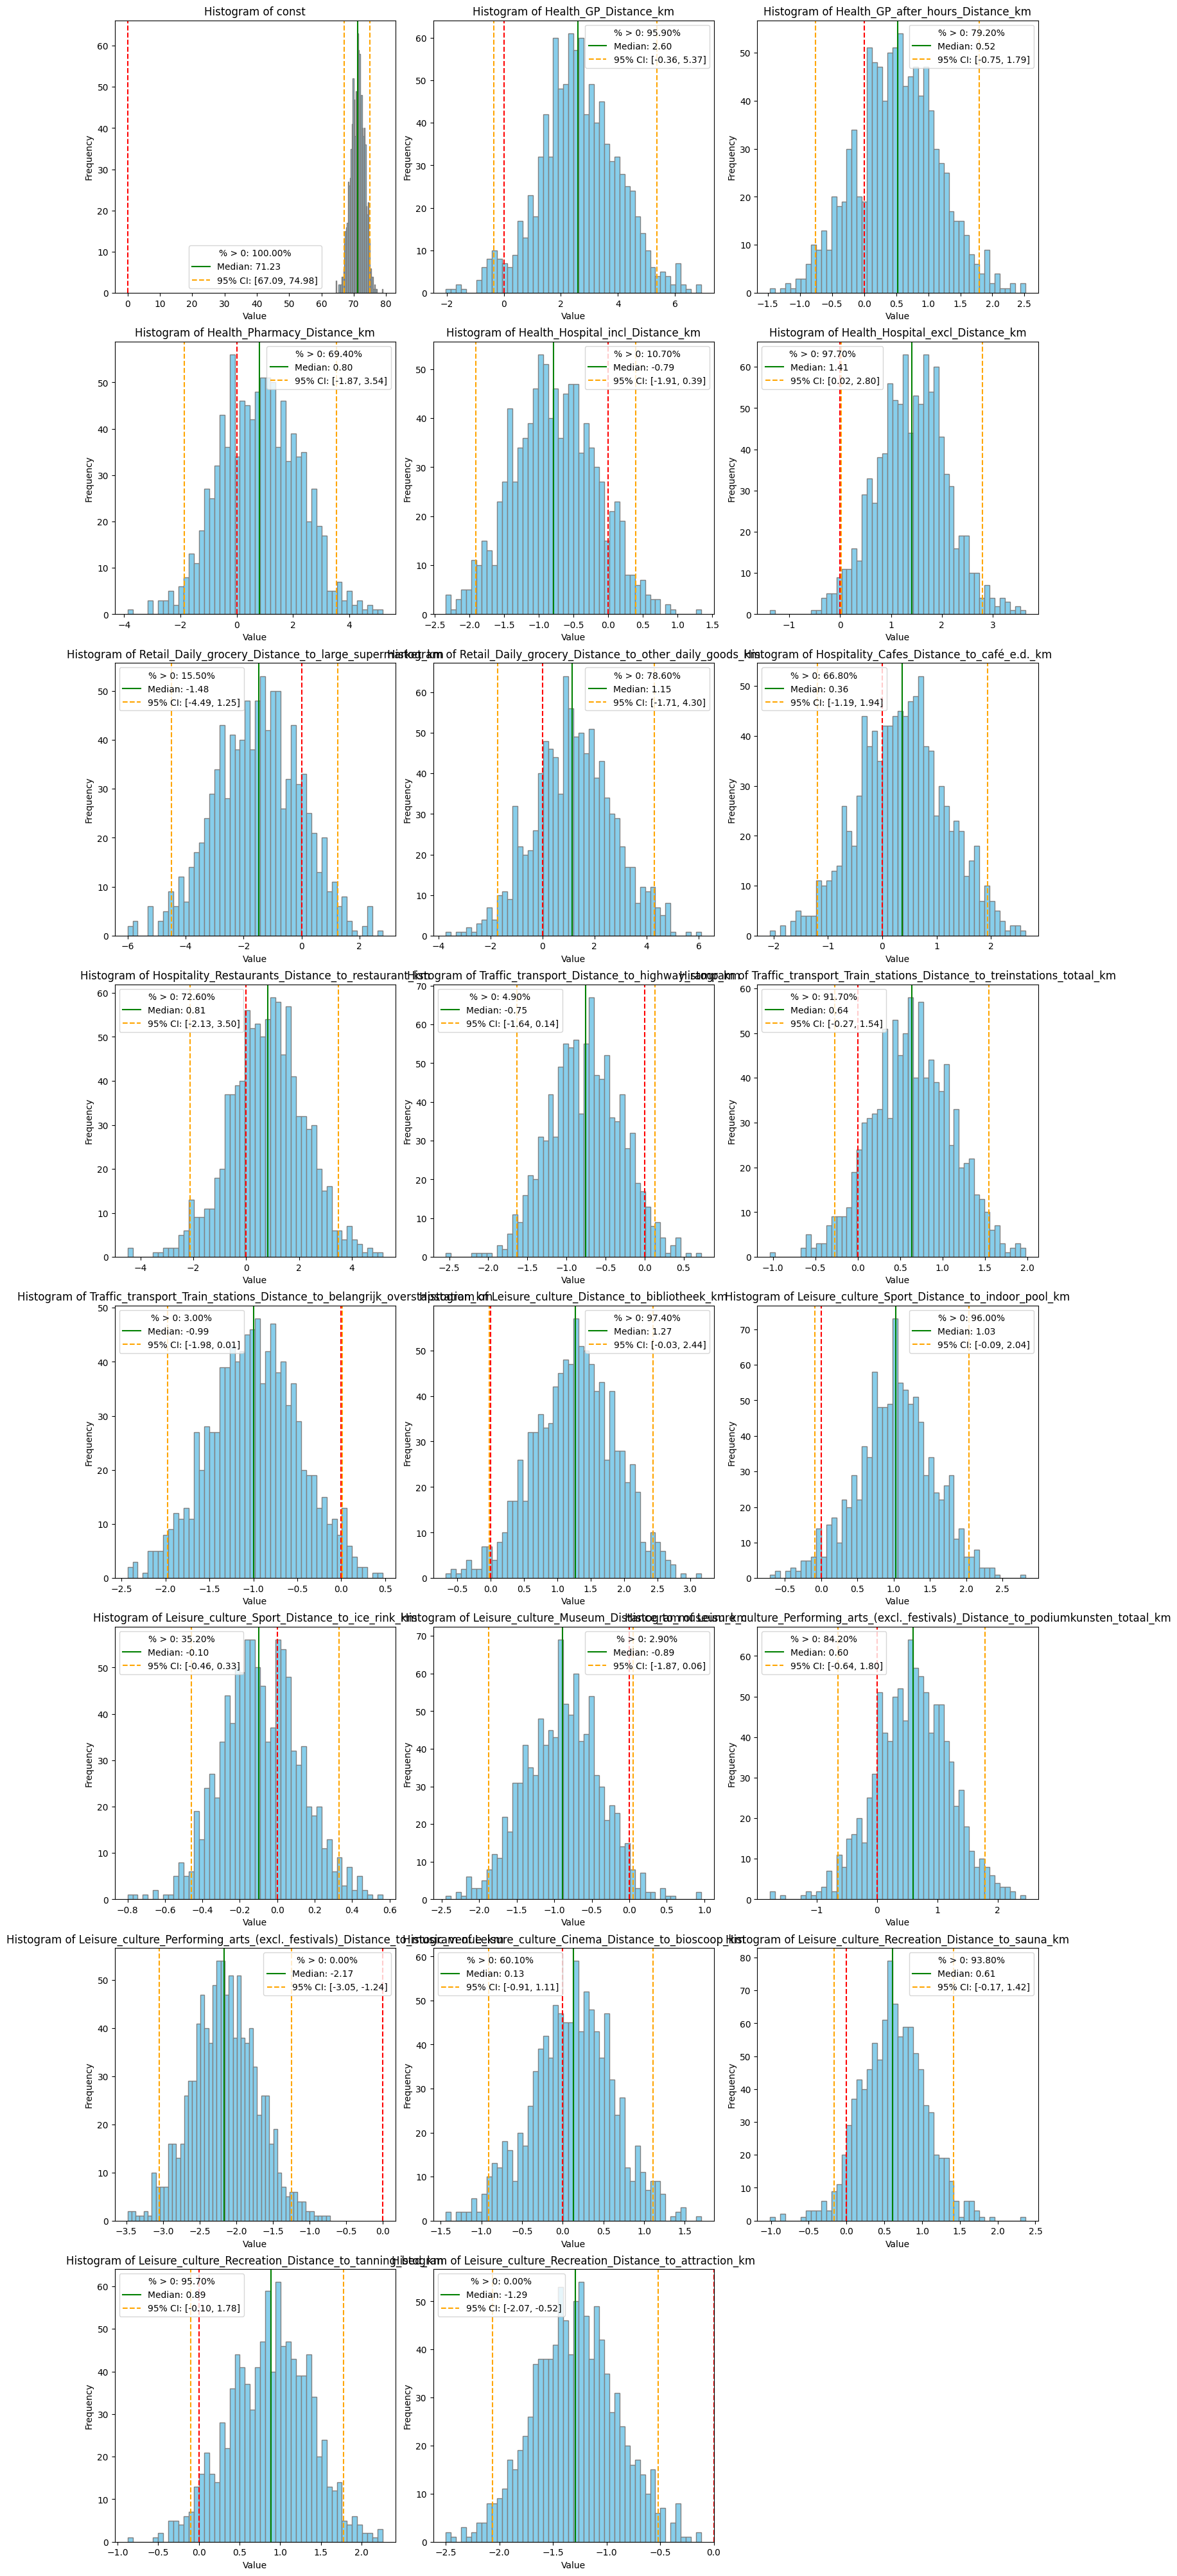

In [122]:
import matplotlib.pyplot as plt
import numpy as np

#. Your solution here ...
np.random.seed(42)
n_simulations = 1000

coef_estimates = model_distance.params
coef_cov = model_distance.cov_params()
coeff_samples = np.random.multivariate_normal(coef_estimates, coef_cov, size=n_simulations)

# Get parameter names 
parameter_names = getattr(model_distance.model, 'exog_names', [f'Param_{i}' for i in range(len(coef_estimates))])

n_params = len(parameter_names)

# Rows + Columns
n_cols = min(3, n_params)
n_rows = (n_params + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5), constrained_layout=True)
axes_flat = axes.flatten()

for i, name in enumerate(parameter_names):

    mean_val = np.mean(coeff_samples[:, i])
    median_val = np.median(coeff_samples[:, i])
    ci_lower, ci_upper = np.percentile(coeff_samples[:, i], [2.5, 97.5])
    percent_positive = (np.sum(coeff_samples[:, i] > 0) / n_simulations) * 100

    ax = axes_flat[i]
    ax.hist(coeff_samples[:, i], bins=50, color='skyblue', edgecolor='gray')
    ax.axvline(x=median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
    ax.axvline(x=ci_lower, color='orange', linestyle='--', label=f'95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]')
    ax.axvline(x=ci_upper, color='orange', linestyle='--')
    ax.axvline(x=0, color='red', linestyle='--')
    ax.set_title(f'Histogram of {name}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend(title=f'% > 0: {percent_positive:.2f}%')

# Hide unused subplots
for j in range(i + 1, len(axes_flat)):
    axes_flat[j].set_visible(False)

plt.show()


Strong Variables (Health_Hospital_excl_Distance_km, Leisure_culture_Distance_to_bibliotheek_km, Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km, Leisure_culture_Performing_arts_(excl._festivals)_Distance_to_music_venue_km, Leisure_culture_Recreation_Distance_to_attraction_km, )


Moderate Variables(Health_GP_after_hours_Distance_km, Traffic_transport_Distance_to_highway_ramp_km, Traffic_transport_Train_stations_Distance_to_treinstations_totaal_km, Leisure_culture_Museum_Distance_to_museum_km, Leisure_culture_Sport_Distance_to_indoor_pool_km, Leisure_culture_Recreation_Distance_to_sauna_km, Leisure_culture_Recreation_Distance_to_tanning_bed_km)

## Split into train, valid, and test dataset

In [123]:
df = pd.concat([df_full_with_district, df_grouped_with_const[X_grouped.columns]], axis=1)
# Obtain the list of all ids (indices) in the dataframe

ids = df.index.tolist()  

# Shuffle the ids
np.random.seed(42)  # For reproducibility
np.random.shuffle(ids)

# Calculate split sizes
total_size = len(ids)
train_size = int(total_size * 0.5)
validation_size = int(total_size * 0.25)
# The remaining 25% will be for the test set

# Split the ids into train, validation, and test sets
train_ids = ids[:train_size]
validation_ids = ids[train_size:train_size + validation_size]
test_ids = test_ids = ids[train_size + validation_size:]

# Create the actual splits
train_set = df.loc[train_ids]
validation_set = df.loc[validation_ids]
test_set = df.loc[test_ids]


# Training set
train_X = train_set.drop(columns=["18_en_ouder"])
train_y = train_set["18_en_ouder"] 
# Add constant term
train_X_full = sm.add_constant(train_X)

# Validation set
valid_X = validation_set.drop(columns=["18_en_ouder"])
valid_y = validation_set["18_en_ouder"]

valid_X_full = sm.add_constant(valid_X)

test_X = test_set.drop(columns=["18_en_ouder"])
test_y = test_set["18_en_ouder"]

test_X_full = sm.add_constant(test_X)



## Train model

In [124]:
def fit_predict_evaluate(train_X, train_y, valid_X, valid_y, credibility_pct=95, n_sims=1000):
    
    rng = np.random.default_rng(42)  # For reproducibility
    
    # Fit the model
    model = sm.OLS(train_y, train_X).fit()

    W_hat = model.params
    cov_matrix = model.cov_params()
    residual_std = np.sqrt(model.scale)  # standard deviation of residuals

    # Simulate W from the posterior distribution
    simulated_W = rng.multivariate_normal(W_hat, cov_matrix, size=n_sims)

    # Calculate simulated mu for the validation set
    simulated_mus = simulated_W @ valid_X.T  # shape: (n_sims, n_valid)

    # Simulate y based on simulated mu and residual standard error
    simulated_ys = simulated_mus + rng.normal(0, residual_std, size=simulated_mus.shape)

    # Calculate prediction summaries
    simulated_y_median = np.median(simulated_ys, axis=0)

    lower = np.percentile(simulated_ys, (100 - credibility_pct) / 2, axis=0)
    upper = np.percentile(simulated_ys, 100 - (100 - credibility_pct) / 2, axis=0)
    prediction_intervals = np.vstack([lower, upper])  # shape: (2, n_validation)

    # Calculate metrics
    bias = np.mean(simulated_y_median - valid_y)
    rmse = np.sqrt(np.mean((simulated_y_median - valid_y) ** 2))
    correlation = np.corrcoef(simulated_y_median, valid_y)[0, 1]
    coverage = np.mean((valid_y.values >= lower) & (valid_y.values <= upper))

    # Return results as a dictionary
    results = {
        'bias': bias,
        'rmse': rmse,
        'correlation': correlation,
        'coverage': coverage,       
        'predictions': simulated_y_median,
        'prediction_intervals': prediction_intervals,
        'model': model  # Store model for inspection
    }

    return results



In [125]:

# Define different model specifications


model_specs = {
    'Intercept-Only': ['const'],
    'Model-1-Full': ['const'] + regressors_full,
    'Model-2-Distance': ['const'] + regressors_distance,
    'Model-3-Grouped': ['const'] + X_grouped.columns.tolist(),
    'Model-4-Selected': ['const'] + regressors_selected,
    'Model-5-District-Only': ['const'] + district_encoder_one_hot.columns.tolist(),
}

# Train all models
scores_dict = {}
model_results = {}

for model_name, features in model_specs.items():
    print(f"Training {model_name} ({len(features)-1} features)...")
    
    # Check if all features exist in the dataset
    missing_features = [f for f in features if f not in train_X_full.columns]
    if missing_features:
        print(f"  Warning: Missing features {missing_features}, skipping...")
        continue
    
    # Select features for train and validation
    X_train_subset = train_X_full[features]
    X_valid_subset = valid_X_full[features]
    
    # Fit and evaluate
    try:
        results = fit_predict_evaluate(X_train_subset, train_y, X_valid_subset, valid_y, credibility_pct=95)
        scores_dict[model_name] = results
        model_results[model_name] = results['model']
        print(f"  ✓ RMSE: {results['rmse']:.3f}, R²: {results['model'].rsquared:.3f}")
    except Exception as e:
        print(f"  ✗ Error: {e}")

print("\nAll models have been trained!")

# Summarize scalar metrics only
def summarize(d):
    return {k: d[k] for k in ['bias','rmse','correlation','coverage']}

scores = pd.DataFrame({name: summarize(results) for name, results in scores_dict.items()}).T

# Add additional model statistics
scores['R²'] = [model_results[name].rsquared for name in scores.index]
scores['Adj_R²'] = [model_results[name].rsquared_adj for name in scores.index]
scores['AIC'] = [model_results[name].aic for name in scores.index]
scores['BIC'] = [model_results[name].bic for name in scores.index]
scores['N_features'] = [len(model_specs[name])-1 for name in scores.index]  # -1 for const

scores.round(3)


Training Intercept-Only (0 features)...
  ✓ RMSE: 7.096, R²: 0.000
Training Model-1-Full (58 features)...
  ✓ RMSE: 6.413, R²: 0.494
Training Model-2-Distance (22 features)...
  ✓ RMSE: 6.206, R²: 0.306
Training Model-3-Grouped (5 features)...
  ✓ RMSE: 6.452, R²: 0.145
Training Model-4-Selected (6 features)...
  ✓ RMSE: 6.869, R²: 0.145
Training Model-5-District-Only (3 features)...
  ✓ RMSE: 6.581, R²: 0.143

All models have been trained!


,bias,rmse,correlation,coverage,R²,Adj_R²,AIC,BIC,N_features
Intercept-Only,0.07,7.10,-0.10,0.98,0.00,0.00,1469.56,1472.93,0
Model-1-Full,0.16,6.41,0.51,0.94,0.49,0.31,1438.58,1637.72,58
Model-2-Distance,0.04,6.21,0.48,0.97,0.31,0.23,1434.62,1512.25,22
Model-3-Grouped,-0.42,6.45,0.41,0.98,0.14,0.12,1445.81,1466.06,5
Model-4-Selected,-0.05,6.87,0.27,0.95,0.14,0.12,1447.79,1471.42,6
Model-5-District-Only,0.70,6.58,0.38,0.96,0.14,0.14,1440.27,1450.39,3


In [126]:
scores.round(3).sort_values("rmse")

,bias,rmse,correlation,coverage,R²,Adj_R²,AIC,BIC,N_features
Model-2-Distance,0.04,6.21,0.48,0.97,0.31,0.23,1434.62,1512.25,22
Model-1-Full,0.16,6.41,0.51,0.94,0.49,0.31,1438.58,1637.72,58
Model-3-Grouped,-0.42,6.45,0.41,0.98,0.14,0.12,1445.81,1466.06,5
Model-5-District-Only,0.70,6.58,0.38,0.96,0.14,0.14,1440.27,1450.39,3
Model-4-Selected,-0.05,6.87,0.27,0.95,0.14,0.12,1447.79,1471.42,6
Intercept-Only,0.07,7.10,-0.10,0.98,0.00,0.00,1469.56,1472.93,0


In [127]:
# Determining the best of each metric
print("BEST OF EACH METRIC")
print(f"Lowest RMSE: {scores['rmse'].idxmin()} ({scores['rmse'].min():.3f})")
print(f"Lowest AIC: {scores['AIC'].idxmin()} ({scores['AIC'].min():.3f})")
print(f"Highest Correlation: {scores['correlation'].idxmax()} ({scores['correlation'].max():.3f})")
print(f"Closest to Unbiased: {scores['bias'].abs().idxmin()} ({scores.loc[scores['bias'].abs().idxmin(), 'bias']:.3f})")
print(f"Coverage nearest 95%: {(scores['coverage']-0.95).abs().idxmin()} ({scores.loc[(scores['coverage']-0.95).abs().idxmin(), 'coverage']:.1%})")

BEST OF EACH METRIC
Lowest RMSE: Model-2-Distance (6.206)
Lowest AIC: Model-2-Distance (1434.621)
Highest Correlation: Model-1-Full (0.510)
Closest to Unbiased: Model-2-Distance (0.042)
Coverage nearest 95%: Model-4-Selected (95.4%)


Models 1, 2, and 3 has lowest RMSE; I want to add district into those 3 models to see if it improves the model

The models with district seems to perform better than the ones without, indicating that location/neighbourhood is an important predictor of health.

However, since this analysis focuses on amenities, the final models will not include district names. As such, Model 2 will be selected as it as the lowest RMSE (6.206), AIC (1434.621), and is closest to unbiased (0.042).

# Test performance

## Full model (56 regressors)

In [150]:
df_final = pd.concat([df["18_en_ouder"], df["const"], df[regressors_full]], axis=1).copy()

# Obtain the list of all ids (indices) in the dataframe
ids = df_final.index.tolist()  

# Shuffle the ids
np.random.seed(42)  # For reproducibility
np.random.shuffle(ids)

# Calculate split sizes
total_size = len(ids)
train_size = int(total_size * 0.5)
validation_size = int(total_size * 0.25)
# The remaining 25% will be for the test set

# Split the ids into train, validation, and test sets
train_ids = ids[:train_size]
validation_ids = ids[train_size:train_size + validation_size]
test_ids = test_ids = ids[train_size + validation_size:]

# Create the actual splits
train_set = df_final.loc[train_ids]
validation_set = df_final.loc[validation_ids]
test_set = df_final.loc[test_ids]


# Training set
train_X = train_set.drop(columns=["18_en_ouder"])
train_y = train_set["18_en_ouder"] 
# Add constant term
train_X_full = sm.add_constant(train_X)

# Validation set
valid_X = validation_set.drop(columns=["18_en_ouder"])
valid_y = validation_set["18_en_ouder"]

valid_X_full = sm.add_constant(valid_X)

test_X = test_set.drop(columns=["18_en_ouder"])
test_y = test_set["18_en_ouder"]

test_X_full = sm.add_constant(test_X)

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


NUM_SIMULATIONS = 1000
rng = np.random.default_rng(42)

# Fit model on TRAINING SET
model = sm.OLS(train_y, train_X).fit()

W_hat = model.params
cov_matrix = model.cov_params()
residual_std = np.sqrt(model.mse_resid)


# Posterior sampling of coefficients
simulated_W = rng.multivariate_normal(W_hat, cov_matrix, size=NUM_SIMULATIONS)


# Posterior predictive y on TEST SET
simulated_mus = simulated_W @ test_X.T
simulated_ys = simulated_mus + rng.normal(0, residual_std, simulated_mus.shape)

# Convert to numpy
simulated_ys = np.asarray(simulated_ys)
y_true = np.asarray(test_y)

# Compute posterior predictive median + intervals
median_preds = np.median(simulated_ys, axis=0)
lower_bounds = np.percentile(simulated_ys, 2.5, axis=0)
upper_bounds = np.percentile(simulated_ys, 97.5, axis=0)

# Metrics using MEDIAN predictions
correlation = np.corrcoef(median_preds, y_true)[0, 1]
rmse = np.sqrt(mean_squared_error(y_true, median_preds))
bias = np.mean(median_preds - y_true)
coverage = np.mean((y_true >= lower_bounds) & (y_true <= upper_bounds))

#PRINT METRICS
available_cols = [col for col in train_X_full.columns if col in train_X_full.columns]
print(f"Using {len(available_cols)} predictors: {available_cols}")

print(f"\nModel trained on {len(train_X)} observations")
print(f"Number of parameters: {len(W_hat)}")
print(f"Training R²: {model.rsquared:.4f}")


print(f"Correlation: {correlation:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"Bias: {bias:.3f}")
print(f"Coverage: {coverage:.2%}")





Using 59 predictors: ['const', 'Health_GP_Distance_km', 'Health_GP_Count_Within_1km', 'Health_GP_Count_Within_3km', 'Health_GP_Count_Within_5km', 'Health_GP_after_hours_Distance_km', 'Health_Pharmacy_Distance_km', 'Health_Hospital_incl_Distance_km', 'Health_Hospital_incl_Count_Within_5km', 'Health_Hospital_incl_Count_Within_10km', 'Health_Hospital_incl_Count_Within_20km', 'Health_Hospital_excl_Distance_km', 'Health_Hospital_excl_Count_Within_5km', 'Health_Hospital_excl_Count_Within_10km', 'Health_Hospital_excl_Count_Within_20km', 'Retail_Daily_grocery_Distance_to_large_supermarket_km', 'Retail_Daily_grocery_Count_large_supermarketen_Within_1_km_count', 'Retail_Daily_grocery_Count_large_supermarketen_Within_3_km_count', 'Retail_Daily_grocery_Count_large_supermarketen_Within_5_km_count', 'Retail_Daily_grocery_Distance_to_other_daily_goods_km', 'Retail_Daily_grocery_Count_overige_dagelijkse_levensmiddelen_Within_1_km_count', 'Retail_Daily_grocery_Count_overige_dagelijkse_levensmiddelen_Wi

## Distance-only model (23 regressors)


In [ ]:
df_final = pd.concat([df["18_en_ouder"], df["const"], df[regressors_distance]], axis=1).copy()

# Obtain the list of all ids (indices) in the dataframe
ids = df_final.index.tolist()  

# Shuffle the ids
np.random.seed(42)  # For reproducibility
np.random.shuffle(ids)

# Calculate split sizes
total_size = len(ids)
train_size = int(total_size * 0.5)
validation_size = int(total_size * 0.25)
# The remaining 25% will be for the test set

# Split the ids into train, validation, and test sets
train_ids = ids[:train_size]
validation_ids = ids[train_size:train_size + validation_size]
test_ids = test_ids = ids[train_size + validation_size:]

# Create the actual splits
train_set = df_final.loc[train_ids]
validation_set = df_final.loc[validation_ids]
test_set = df_final.loc[test_ids]


# Training set
train_X = train_set.drop(columns=["18_en_ouder"])
train_y = train_set["18_en_ouder"] 
# Add constant term
train_X_full = sm.add_constant(train_X)

# Validation set
valid_X = validation_set.drop(columns=["18_en_ouder"])
valid_y = validation_set["18_en_ouder"]

valid_X_full = sm.add_constant(valid_X)

test_X = test_set.drop(columns=["18_en_ouder"])
test_y = test_set["18_en_ouder"]

test_X_full = sm.add_constant(test_X)

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


NUM_SIMULATIONS = 1000
rng = np.random.default_rng(42)

# Fit model on TRAINING SET
model = sm.OLS(train_y, train_X).fit()

W_hat = model.params
cov_matrix = model.cov_params()
residual_std = np.sqrt(model.mse_resid)


# Posterior sampling of coefficients
simulated_W = rng.multivariate_normal(W_hat, cov_matrix, size=NUM_SIMULATIONS)


# Posterior predictive y on TEST SET
simulated_mus = simulated_W @ test_X.T
simulated_ys = simulated_mus + rng.normal(0, residual_std, simulated_mus.shape)

# Convert to numpy
simulated_ys = np.asarray(simulated_ys)
y_true = np.asarray(test_y)

# Compute posterior predictive median + intervals
median_preds = np.median(simulated_ys, axis=0)
lower_bounds = np.percentile(simulated_ys, 2.5, axis=0)
upper_bounds = np.percentile(simulated_ys, 97.5, axis=0)

# Metrics using MEDIAN predictions
correlation = np.corrcoef(median_preds, y_true)[0, 1]
rmse = np.sqrt(mean_squared_error(y_true, median_preds))
bias = np.mean(median_preds - y_true)
coverage = np.mean((y_true >= lower_bounds) & (y_true <= upper_bounds))

#PRINT METRICS
available_cols = [col for col in train_X_full.columns if col in train_X_full.columns]
print(f"Using {len(available_cols)} predictors: {available_cols}")

print(f"\nModel trained on {len(train_X)} observations")
print(f"Number of parameters: {len(W_hat)}")
print(f"Training R²: {model.rsquared:.4f}")


print(f"Correlation: {correlation:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"Bias: {bias:.3f}")
print(f"Coverage: {coverage:.2%}")





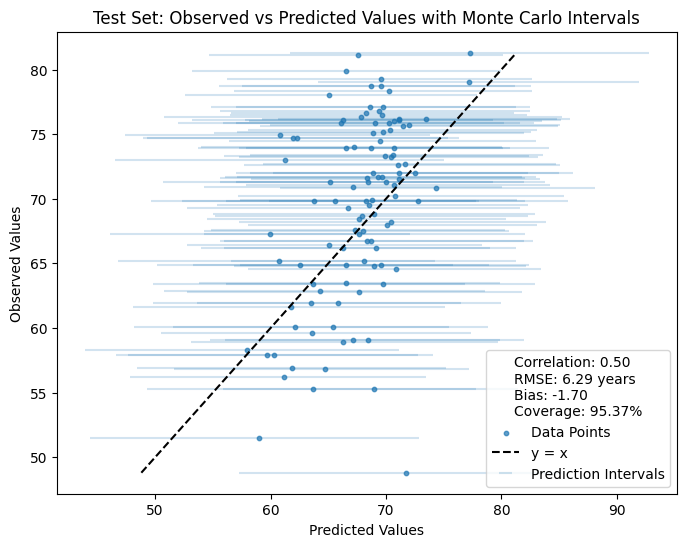

In [148]:
# Plot Observed vs Predicted 
min_val = min(y_true.min(), median_preds.min())
max_val = max(y_true.max(), median_preds.max())

plt.figure(figsize=(8, 6))

# Scatter of median predictions vs observed
plt.scatter(median_preds, y_true, s=10, alpha=0.7, label='Data Points')

# Horizontal error bars (x-direction)
plt.errorbar(
    median_preds,
    y_true,
    xerr=[median_preds - lower_bounds, upper_bounds - median_preds],
    fmt='none',
    alpha=0.2,
    label='Prediction Intervals'
)

# Diagonal line y=x
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='y = x')

# Legend with metrics block
legend_text = (
    f'Correlation: {correlation:.2f}\n'
    f'RMSE: {rmse:.2f} years\n'
    f'Bias: {bias:.2f}\n'
    f'Coverage: {coverage:.2%}'

)

plt.legend(title=legend_text, loc='lower right')

plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')
plt.title('Test Set: Observed vs Predicted Values with Monte Carlo Intervals')
plt.show()

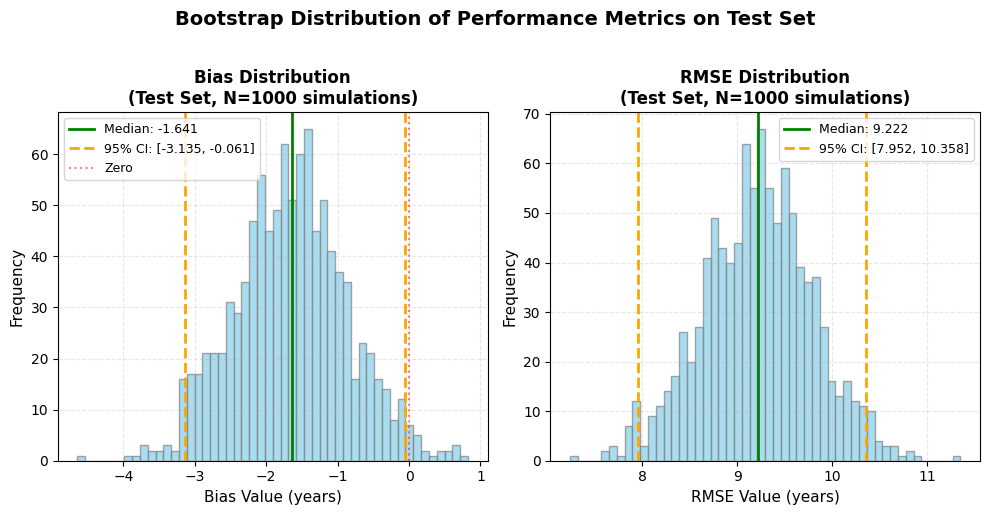

In [143]:
# Purpose: Quantify how uncertain we are about the model's performance metrics through bootstrap simulation of coefficient uncertainty.")
# Calculate metric distributions (already have simulated_ys from Part A)
# simulated_ys shape: (NUM_SIMULATIONS, n_test_observations)

# For each simulation, calculate performance metrics
bias_distribution = simulated_ys.mean(axis=1) - test_y.values.mean()
rmse_distribution = np.sqrt(((simulated_ys - test_y.values)**2).mean(axis=1))
correlation_distribution = np.array([
    np.corrcoef(simulated_ys[i, :], test_y.values)[0, 1]
    for i in range(NUM_SIMULATIONS)
])

# Combine into dictionary
metrics = {
    'Bias': bias_distribution,
    'RMSE': rmse_distribution,
}

metric_names = ['Bias', 'RMSE']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for ax, name in zip(axes, metric_names):
    data = metrics[name]
    median_val = np.median(data)
    confidence_interval = np.percentile(data, [2.5, 97.5])
    
    # Histogram
    ax.hist(data, bins=50, color='skyblue', edgecolor='gray', alpha=0.7)
    
    # Median line
    ax.axvline(median_val, color='green', linestyle='-', linewidth=2,
               label=f'Median: {median_val:.3f}')
    
    # Confidence interval lines
    ax.axvline(confidence_interval[0], color='orange', linestyle='--', linewidth=2)
    ax.axvline(confidence_interval[1], color='orange', linestyle='--', linewidth=2,
               label=f'95% CI: [{confidence_interval[0]:.3f}, {confidence_interval[1]:.3f}]')
    
    # Add vertical line at zero for Bias
    if name == 'Bias':
        ax.axvline(0, color='red', linestyle=':', linewidth=1.5, alpha=0.5, label='Zero')
    
    # Formatting
    ax.set_title(f'{name} Distribution\n(Test Set, N={NUM_SIMULATIONS} simulations)', 
                 fontsize=12, fontweight='bold')
    ax.set_xlabel(f'{name} Value' + (' (years)' if name in ['Bias', 'RMSE'] else ''), 
                  fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.legend(fontsize=9, loc='best')
    ax.grid(True, alpha=0.3, linestyle='--')

plt.suptitle('Bootstrap Distribution of Performance Metrics on Test Set', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [145]:
df

,18_en_ouder,const,Health_GP_Distance_km,Health_GP_Count_Within_1km,Health_GP_Count_Within_3km,Health_GP_Count_Within_5km,Health_GP_after_hours_Distance_km,Health_Pharmacy_Distance_km,Health_Hospital_incl_Distance_km,Health_Hospital_incl_Count_Within_5km,...,Leisure_culture_Recreation_Count_attractions_Within_20_km_count,Leisure_culture_Recreation_Count_attractions_Within_50_km_count,district_x_Amsterdam Zuid,district_x_Amsterdam Zuidoost,district_x_Other,Health_mean,Retail_mean,Hospitality_mean,Traffic_transport_mean,Leisure_culture_mean
0,66.80,1.00,0.60,3.00,28.00,66.80,3.30,0.70,2.60,2.00,...,13.80,60.50,0.00,0.00,1.00,2.06,0.55,0.60,3.00,2.93
1,71.50,1.00,0.50,3.50,30.30,89.00,4.60,0.90,2.00,2.40,...,13.90,61.80,0.00,0.00,1.00,2.52,0.35,0.20,2.27,2.10
2,67.90,1.00,0.80,3.80,28.00,77.80,4.50,0.60,2.40,2.00,...,15.00,61.00,0.00,0.00,1.00,2.56,0.35,0.25,2.43,2.06
3,70.30,1.00,0.90,1.50,26.90,75.60,4.80,0.90,2.40,1.90,...,14.90,61.00,0.00,0.00,1.00,2.76,0.55,0.35,2.47,2.23
4,71.20,1.00,0.20,2.00,28.60,93.00,4.50,1.40,2.00,2.10,...,11.00,62.00,0.00,0.00,1.00,2.52,0.65,0.25,2.13,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,73.00,1.00,0.80,0.70,4.30,22.90,3.60,0.90,3.60,1.00,...,9.50,55.80,0.00,1.00,0.00,2.50,0.95,1.45,3.87,5.70
583,73.00,1.00,0.80,0.60,7.20,24.50,3.20,0.80,3.20,1.00,...,10.40,56.00,0.00,1.00,0.00,2.24,0.85,1.40,3.33,5.27
584,73.00,1.00,0.80,1.00,3.50,21.80,3.60,0.80,3.60,1.00,...,9.50,56.00,0.00,1.00,0.00,2.48,0.85,1.25,4.03,5.92
585,73.00,1.00,1.00,0.50,3.10,22.80,3.80,1.00,3.80,1.00,...,9.00,55.40,0.00,1.00,0.00,2.68,1.05,1.75,3.93,5.73


## Grouped model (6 predictors)

In [151]:
df_final = pd.concat([df["18_en_ouder"], df["const"], X_grouped], axis=1).copy()

# Obtain the list of all ids (indices) in the dataframe
ids = df_final.index.tolist()  

# Shuffle the ids
np.random.seed(42)  # For reproducibility
np.random.shuffle(ids)

# Calculate split sizes
total_size = len(ids)
train_size = int(total_size * 0.5)
validation_size = int(total_size * 0.25)
# The remaining 25% will be for the test set

# Split the ids into train, validation, and test sets
train_ids = ids[:train_size]
validation_ids = ids[train_size:train_size + validation_size]
test_ids = test_ids = ids[train_size + validation_size:]

# Create the actual splits
train_set = df_final.loc[train_ids]
validation_set = df_final.loc[validation_ids]
test_set = df_final.loc[test_ids]


# Training set
train_X = train_set.drop(columns=["18_en_ouder"])
train_y = train_set["18_en_ouder"] 
# Add constant term
train_X_full = sm.add_constant(train_X)

# Validation set
valid_X = validation_set.drop(columns=["18_en_ouder"])
valid_y = validation_set["18_en_ouder"]

valid_X_full = sm.add_constant(valid_X)

test_X = test_set.drop(columns=["18_en_ouder"])
test_y = test_set["18_en_ouder"]

test_X_full = sm.add_constant(test_X)

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


NUM_SIMULATIONS = 1000
rng = np.random.default_rng(42)

# Fit model on TRAINING SET
model = sm.OLS(train_y, train_X).fit()

W_hat = model.params
cov_matrix = model.cov_params()
residual_std = np.sqrt(model.mse_resid)


# Posterior sampling of coefficients
simulated_W = rng.multivariate_normal(W_hat, cov_matrix, size=NUM_SIMULATIONS)


# Posterior predictive y on TEST SET
simulated_mus = simulated_W @ test_X.T
simulated_ys = simulated_mus + rng.normal(0, residual_std, simulated_mus.shape)

# Convert to numpy
simulated_ys = np.asarray(simulated_ys)
y_true = np.asarray(test_y)

# Compute posterior predictive median + intervals
median_preds = np.median(simulated_ys, axis=0)
lower_bounds = np.percentile(simulated_ys, 2.5, axis=0)
upper_bounds = np.percentile(simulated_ys, 97.5, axis=0)

# Metrics using MEDIAN predictions
correlation = np.corrcoef(median_preds, y_true)[0, 1]
rmse = np.sqrt(mean_squared_error(y_true, median_preds))
bias = np.mean(median_preds - y_true)
coverage = np.mean((y_true >= lower_bounds) & (y_true <= upper_bounds))

#PRINT METRICS
available_cols = [col for col in train_X_full.columns if col in train_X_full.columns]
print(f"Using {len(available_cols)} predictors: {available_cols}")

print(f"\nModel trained on {len(train_X)} observations")
print(f"Number of parameters: {len(W_hat)}")
print(f"Training R²: {model.rsquared:.4f}")


print(f"Correlation: {correlation:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"Bias: {bias:.3f}")
print(f"Coverage: {coverage:.2%}")





Using 6 predictors: ['const', 'Health_mean', 'Retail_mean', 'Hospitality_mean', 'Traffic_transport_mean', 'Leisure_culture_mean']

Model trained on 216 observations
Number of parameters: 6
Training R²: 0.1446
Correlation: 0.389
RMSE: 6.572
Bias: -1.243
Coverage: 97.22%


## Selected model (7 predictors)

In [152]:
df_final = pd.concat([df["18_en_ouder"], df["const"], df[regressors_selected]], axis=1).copy()

# Obtain the list of all ids (indices) in the dataframe
ids = df_final.index.tolist()  

# Shuffle the ids
np.random.seed(42)  # For reproducibility
np.random.shuffle(ids)

# Calculate split sizes
total_size = len(ids)
train_size = int(total_size * 0.5)
validation_size = int(total_size * 0.25)
# The remaining 25% will be for the test set

# Split the ids into train, validation, and test sets
train_ids = ids[:train_size]
validation_ids = ids[train_size:train_size + validation_size]
test_ids = test_ids = ids[train_size + validation_size:]

# Create the actual splits
train_set = df_final.loc[train_ids]
validation_set = df_final.loc[validation_ids]
test_set = df_final.loc[test_ids]


# Training set
train_X = train_set.drop(columns=["18_en_ouder"])
train_y = train_set["18_en_ouder"] 
# Add constant term
train_X_full = sm.add_constant(train_X)

# Validation set
valid_X = validation_set.drop(columns=["18_en_ouder"])
valid_y = validation_set["18_en_ouder"]

valid_X_full = sm.add_constant(valid_X)

test_X = test_set.drop(columns=["18_en_ouder"])
test_y = test_set["18_en_ouder"]

test_X_full = sm.add_constant(test_X)

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


NUM_SIMULATIONS = 1000
rng = np.random.default_rng(42)

# Fit model on TRAINING SET
model = sm.OLS(train_y, train_X).fit()

W_hat = model.params
cov_matrix = model.cov_params()
residual_std = np.sqrt(model.mse_resid)


# Posterior sampling of coefficients
simulated_W = rng.multivariate_normal(W_hat, cov_matrix, size=NUM_SIMULATIONS)


# Posterior predictive y on TEST SET
simulated_mus = simulated_W @ test_X.T
simulated_ys = simulated_mus + rng.normal(0, residual_std, simulated_mus.shape)

# Convert to numpy
simulated_ys = np.asarray(simulated_ys)
y_true = np.asarray(test_y)

# Compute posterior predictive median + intervals
median_preds = np.median(simulated_ys, axis=0)
lower_bounds = np.percentile(simulated_ys, 2.5, axis=0)
upper_bounds = np.percentile(simulated_ys, 97.5, axis=0)

# Metrics using MEDIAN predictions
correlation = np.corrcoef(median_preds, y_true)[0, 1]
rmse = np.sqrt(mean_squared_error(y_true, median_preds))
bias = np.mean(median_preds - y_true)
coverage = np.mean((y_true >= lower_bounds) & (y_true <= upper_bounds))

#PRINT METRICS
available_cols = [col for col in train_X_full.columns if col in train_X_full.columns]
print(f"Using {len(available_cols)} predictors: {available_cols}")

print(f"\nModel trained on {len(train_X)} observations")
print(f"Number of parameters: {len(W_hat)}")
print(f"Training R²: {model.rsquared:.4f}")


print(f"Correlation: {correlation:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"Bias: {bias:.3f}")
print(f"Coverage: {coverage:.2%}")





Using 7 predictors: ['const', 'Health_GP_Distance_km', 'Health_Hospital_incl_Distance_km', 'Retail_Daily_grocery_Distance_to_large_supermarket_km', 'Hospitality_Cafes_Distance_to_café_e.d._km', 'Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km', 'Leisure_culture_Sport_Distance_to_indoor_pool_km']

Model trained on 216 observations
Number of parameters: 7
Training R²: 0.1447
Correlation: 0.430
RMSE: 6.449
Bias: -1.232
Coverage: 98.15%


In [158]:
regressors_selected

['Health_GP_Distance_km',
 'Health_Hospital_incl_Distance_km',
 'Retail_Daily_grocery_Distance_to_large_supermarket_km',
 'Hospitality_Cafes_Distance_to_café_e.d._km',
 'Traffic_transport_Train_stations_Distance_to_belangrijk_overstapstation_km',
 'Leisure_culture_Sport_Distance_to_indoor_pool_km']